# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2019.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           205 non-null    float64
 1   Ln_M_stem_kg_m2       205 non-null    float64
 2   Ln_M_stem_bark_kg_m2  205 non-null    float64
 3   Ln_M_crown_kg_m2      205 non-null    float64
 4   Ln_M_foliage_kg_m2    205 non-null    float64
 5   Ln_M_AG_kg_m2         205 non-null    float64
 6   Ln_Cs_wood            205 non-null    float64
 7   Ln_Sr_wood            205 non-null    float64
 8   Ln_Tag_Cs             205 non-null    float64
 9   Ln_Tag_Sr             205 non-null    float64
 10  r2019B01              205 non-null    float64
 11  r2019B02              205 non-null    float64
 12  r2019B03              205 non-null    float64
 13  r2019B04              205 non-null    float64
 14  r2019B05              205 non-null    float64
 15  r2019B06              2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_5047/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            130.0  299.023077  185.204955    2.0  144.0  316.0  451.0   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          130.0  11.784154  7.069419   0.05   5.915  11.96   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.305  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,5.224390,2.071854,-0.042439,0.168537,-0.941463,2.297463,5.995610,7.382927,-0.620000,2.310732,...,0.028895,0.219361,0.131344,0.068068,0.759654,-0.692408,0.526662,-15.737088,-10.490763,0.668847
std,1.125422,1.119577,0.780389,0.583474,0.714443,0.926225,2.084309,2.041062,1.275808,0.951460,...,0.010704,0.049137,0.036023,0.026479,0.091469,0.070703,0.144729,1.547144,1.471517,0.081010
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.015301,0.140309,0.078918,0.035914,0.363395,-0.849155,-0.037478,-22.820204,-16.820473,0.386847
25%,4.930000,1.770000,-0.190000,-0.030000,-1.510000,2.050000,4.100000,5.800000,-1.400000,1.700000,...,0.022685,0.183403,0.102471,0.051182,0.727961,-0.735660,0.470852,-16.494671,-11.364958,0.615553
50%,5.510000,2.410000,0.060000,0.310000,-0.680000,2.570000,6.300000,7.500000,-0.500000,2.400000,...,0.026123,0.199665,0.121704,0.060839,0.771691,-0.693779,0.562326,-15.454248,-10.299303,0.666882
75%,5.980000,2.800000,0.370000,0.530000,-0.360000,2.930000,7.300000,8.700000,0.300000,3.000000,...,0.030628,0.250913,0.153232,0.078586,0.814177,-0.660039,0.626609,-14.760403,-9.547850,0.728737
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.081675,0.423326,0.252487,0.196544,0.914709,-0.389420,0.740912,-12.365163,-5.703308,0.877743


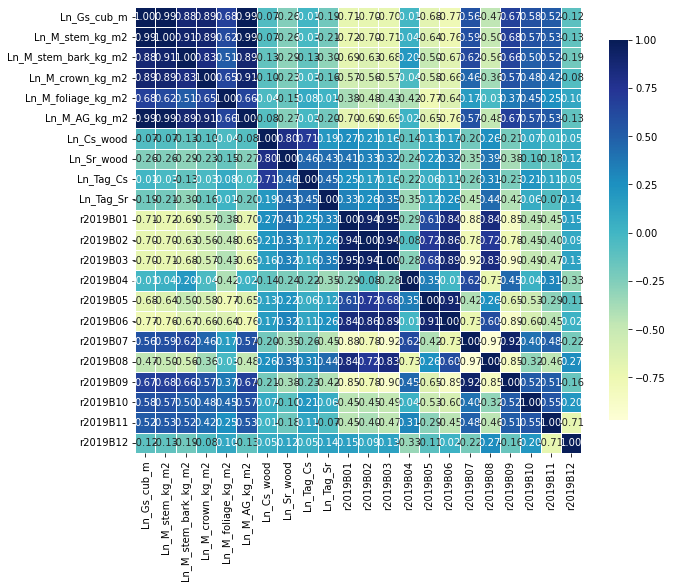

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [16]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2019B01', 'r2019B04', 'r2019B06', 'r2019B10', 'r2019B11'])
y = pd.DataFrame(select, columns= ['Ln_Gs_cub_m'])

In [17]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [18]:
# Columns in "X" data collections
X.head()

,r2019B01,r2019B04,r2019B06,r2019B10,r2019B11
0,0.025483,0.266210,0.081316,-15.396488,-11.262037
1,0.024075,0.183349,0.052144,-16.012156,-9.364664
2,0.022492,0.184066,0.050684,-13.609903,-9.726108
3,0.023742,0.177221,0.052198,-14.321650,-10.457536
4,0.022916,0.183705,0.050437,-13.934375,-11.393335


In [19]:
# Columns in "y" data collections
y.head()

,Ln_Gs_cub_m
0,4.81
1,5.76
2,5.85
3,5.75
4,5.95


# Create first XGBoost model for estimate varibiality of output stats

In [20]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [21]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [22]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [23]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.4409183470400798, 0.5518675804643776, 0.5563180684828339]
    Mean: 0.516
    Std: 0.053

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.75263466 0.79346707 0.84744916]
    Mean: 0.798
    Std: 0.039

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5494843254918637, 0.6293599337690016, 0.5237036117385415]
    Mean: 0.568
    Std: 0.045

 --------------------


# Find optimal hyperparameters for XGBoost model

In [24]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [25]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.555 (std: 0.162)
Parameters: {'colsample_bytree': 0.4326283750000021, 'gamma': 0.0738560294422354, 'learning_rate': 0.06335709818494431, 'max_depth': 3, 'n_estimators': 119, 'subsample': 0.3427079236154398}



In [26]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.23506789, 0.37793765, 0.27472806, ..., 0.13010731, 0.12166839,
       0.25884767]), 'std_fit_time': array([0.06647853, 0.15107068, 0.01909131, ..., 0.00619832, 0.00223312,
       0.00956886]), 'mean_score_time': array([0.00464807, 0.00473213, 0.00460482, ..., 0.00445957, 0.00431404,
       0.00448341]), 'std_score_time': array([8.93903208e-05, 1.21351263e-04, 2.79232843e-05, ...,
       1.76157509e-04, 1.24254431e-04, 5.93167792e-05]), 'param_colsample_bytree': masked_array(data=[0.34367488897867815, 0.12661450491211054,
                   0.3153807358552375, ..., 0.4613377586543883,
                   0.630635436946655, 0.42006199382089016],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.29437027862509646, 0.09919093695756703,
                   0.43985379394610497, ..., 0.1597175474081005,
                   0.43651491331815184, 0.15662590039461594],
  

In [27]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.4326283750000021
Gamma: 0.0738560294422354
Learning_rate: 0.06335709818494431
Max_depth: 3
N_estimators: 119
Subsample: 0.3427079236154398


# Estimation of a basic XGBoost model using Loops

In [28]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [29]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:4.56350	validation_1-rmse:4.59052
[1]	validation_0-rmse:4.29249	validation_1-rmse:4.32178
[2]	validation_0-rmse:4.03786	validation_1-rmse:4.06883
[3]	validation_0-rmse:3.81258	validation_1-rmse:3.85495
[4]	validation_0-rmse:3.59010	validation_1-rmse:3.63559
[5]	validation_0-rmse:3.37383	validation_1-rmse:3.43208
[6]	validation_0-rmse:3.18559	validation_1-rmse:3.25854
[7]	validation_0-rmse:2.99854	validation_1-rmse:3.07760
[8]	validation_0-rmse:2.82954	validation_1-rmse:2.91633
[9]	validation_0-rmse:2.66361	validation_1-rmse:2.74765
[10]	validation_0-rmse:2.50385	validation_1-rmse:2.58677
[11]	validation_0-rmse:2.36445	validation_1-rmse:2.44963
[12]	validation_0-rmse:2.23079	validation_1-rmse:2.31947
[13]	validation_0-rmse:2.11620	validation_1-rmse:2.22320
[14]	validation_0-rmse:1.99936	validation_1-rmse:2.11649


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.88780	validation_1-rmse:2.00711
[16]	validation_0-rmse:1.78589	validation_1-rmse:1.90855
[17]	validation_0-rmse:1.68632	validation_1-rmse:1.80816
[18]	validation_0-rmse:1.60821	validation_1-rmse:1.74563
[19]	validation_0-rmse:1.52899	validation_1-rmse:1.66803
[20]	validation_0-rmse:1.44903	validation_1-rmse:1.58752
[21]	validation_0-rmse:1.37952	validation_1-rmse:1.52689
[22]	validation_0-rmse:1.31428	validation_1-rmse:1.46326
[23]	validation_0-rmse:1.24851	validation_1-rmse:1.40062
[24]	validation_0-rmse:1.19809	validation_1-rmse:1.34795
[25]	validation_0-rmse:1.14828	validation_1-rmse:1.29603
[26]	validation_0-rmse:1.09729	validation_1-rmse:1.24401
[27]	validation_0-rmse:1.04706	validation_1-rmse:1.19556
[28]	validation_0-rmse:1.00379	validation_1-rmse:1.15092
[29]	validation_0-rmse:0.95856	validation_1-rmse:1.10388
[30]	validation_0-rmse:0.92504	validation_1-rmse:1.07634
[31]	validation_0-rmse:0.88796	validation_1-rmse:1.04424
[32]	validation_0-rmse:0.86222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.88078	validation_1-rmse:2.01146
[16]	validation_0-rmse:1.78051	validation_1-rmse:1.90912
[17]	validation_0-rmse:1.68449	validation_1-rmse:1.80449
[18]	validation_0-rmse:1.60734	validation_1-rmse:1.72450
[19]	validation_0-rmse:1.52470	validation_1-rmse:1.64077
[20]	validation_0-rmse:1.44403	validation_1-rmse:1.55319
[21]	validation_0-rmse:1.37141	validation_1-rmse:1.47593
[22]	validation_0-rmse:1.30535	validation_1-rmse:1.40598
[23]	validation_0-rmse:1.25120	validation_1-rmse:1.34645
[24]	validation_0-rmse:1.19748	validation_1-rmse:1.29146
[25]	validation_0-rmse:1.14731	validation_1-rmse:1.23532
[26]	validation_0-rmse:1.10011	validation_1-rmse:1.18488
[27]	validation_0-rmse:1.05173	validation_1-rmse:1.13279
[28]	validation_0-rmse:1.00838	validation_1-rmse:1.08958
[29]	validation_0-rmse:0.96895	validation_1-rmse:1.04567
[30]	validation_0-rmse:0.93085	validation_1-rmse:1.00249
[31]	validation_0-rmse:0.89511	validation_1-rmse:0.95904
[32]	validation_0-rmse:0.86558	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.87212	validation_1-rmse:1.95163
[16]	validation_0-rmse:1.77133	validation_1-rmse:1.84595
[17]	validation_0-rmse:1.68436	validation_1-rmse:1.75713
[18]	validation_0-rmse:1.59910	validation_1-rmse:1.67392
[19]	validation_0-rmse:1.51876	validation_1-rmse:1.59246
[20]	validation_0-rmse:1.43569	validation_1-rmse:1.50861
[21]	validation_0-rmse:1.36237	validation_1-rmse:1.43922
[22]	validation_0-rmse:1.30354	validation_1-rmse:1.38218
[23]	validation_0-rmse:1.24659	validation_1-rmse:1.32250
[24]	validation_0-rmse:1.18509	validation_1-rmse:1.25650
[25]	validation_0-rmse:1.13328	validation_1-rmse:1.20646
[26]	validation_0-rmse:1.08667	validation_1-rmse:1.16866
[27]	validation_0-rmse:1.03779	validation_1-rmse:1.11826
[28]	validation_0-rmse:0.99694	validation_1-rmse:1.07565
[29]	validation_0-rmse:0.95831	validation_1-rmse:1.04059
[30]	validation_0-rmse:0.92033	validation_1-rmse:1.00185
[31]	validation_0-rmse:0.88379	validation_1-rmse:0.96920
[32]	validation_0-rmse:0.85015	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.76537	validation_1-rmse:1.72888
[17]	validation_0-rmse:1.66958	validation_1-rmse:1.63298
[18]	validation_0-rmse:1.58090	validation_1-rmse:1.55542
[19]	validation_0-rmse:1.49843	validation_1-rmse:1.47901
[20]	validation_0-rmse:1.41790	validation_1-rmse:1.40470
[21]	validation_0-rmse:1.34339	validation_1-rmse:1.33905
[22]	validation_0-rmse:1.27364	validation_1-rmse:1.28185
[23]	validation_0-rmse:1.21631	validation_1-rmse:1.23972
[24]	validation_0-rmse:1.15417	validation_1-rmse:1.18689
[25]	validation_0-rmse:1.10396	validation_1-rmse:1.15047
[26]	validation_0-rmse:1.05455	validation_1-rmse:1.11293
[27]	validation_0-rmse:1.01242	validation_1-rmse:1.07698
[28]	validation_0-rmse:0.96210	validation_1-rmse:1.03629
[29]	validation_0-rmse:0.91831	validation_1-rmse:1.00597
[30]	validation_0-rmse:0.88134	validation_1-rmse:0.97939
[31]	validation_0-rmse:0.84587	validation_1-rmse:0.95433
[32]	validation_0-rmse:0.81572	validation_1-rmse:0.93403
[33]	validation_0-rmse:0.78544	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.96338	validation_1-rmse:2.07105
[15]	validation_0-rmse:1.85885	validation_1-rmse:1.96633
[16]	validation_0-rmse:1.75849	validation_1-rmse:1.86669
[17]	validation_0-rmse:1.66149	validation_1-rmse:1.76595
[18]	validation_0-rmse:1.57612	validation_1-rmse:1.68311
[19]	validation_0-rmse:1.49058	validation_1-rmse:1.59479
[20]	validation_0-rmse:1.41483	validation_1-rmse:1.51948
[21]	validation_0-rmse:1.34293	validation_1-rmse:1.44672
[22]	validation_0-rmse:1.28339	validation_1-rmse:1.38612
[23]	validation_0-rmse:1.22079	validation_1-rmse:1.32435
[24]	validation_0-rmse:1.15894	validation_1-rmse:1.25962
[25]	validation_0-rmse:1.10650	validation_1-rmse:1.20946
[26]	validation_0-rmse:1.06093	validation_1-rmse:1.17375
[27]	validation_0-rmse:1.01213	validation_1-rmse:1.12615
[28]	validation_0-rmse:0.97165	validation_1-rmse:1.08802
[29]	validation_0-rmse:0.93276	validation_1-rmse:1.05323
[30]	validation_0-rmse:0.89816	validation_1-rmse:1.02044
[31]	validation_0-rmse:0.86812	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.76711	validation_1-rmse:1.79153
[17]	validation_0-rmse:1.67377	validation_1-rmse:1.70333
[18]	validation_0-rmse:1.58287	validation_1-rmse:1.61281
[19]	validation_0-rmse:1.49626	validation_1-rmse:1.53760
[20]	validation_0-rmse:1.42471	validation_1-rmse:1.46624
[21]	validation_0-rmse:1.35319	validation_1-rmse:1.39351
[22]	validation_0-rmse:1.28329	validation_1-rmse:1.32606
[23]	validation_0-rmse:1.23028	validation_1-rmse:1.27726
[24]	validation_0-rmse:1.17365	validation_1-rmse:1.22492
[25]	validation_0-rmse:1.12142	validation_1-rmse:1.17748
[26]	validation_0-rmse:1.07059	validation_1-rmse:1.12412
[27]	validation_0-rmse:1.02472	validation_1-rmse:1.07155
[28]	validation_0-rmse:0.98153	validation_1-rmse:1.03001
[29]	validation_0-rmse:0.94410	validation_1-rmse:0.99618
[30]	validation_0-rmse:0.90526	validation_1-rmse:0.96453
[31]	validation_0-rmse:0.87703	validation_1-rmse:0.93388
[32]	validation_0-rmse:0.84628	validation_1-rmse:0.91034
[33]	validation_0-rmse:0.81167	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.41220	validation_1-rmse:1.41183
[21]	validation_0-rmse:1.34919	validation_1-rmse:1.34984
[22]	validation_0-rmse:1.27964	validation_1-rmse:1.28450
[23]	validation_0-rmse:1.21516	validation_1-rmse:1.22943
[24]	validation_0-rmse:1.15738	validation_1-rmse:1.18029
[25]	validation_0-rmse:1.10236	validation_1-rmse:1.13522
[26]	validation_0-rmse:1.04832	validation_1-rmse:1.09362
[27]	validation_0-rmse:1.00194	validation_1-rmse:1.05831
[28]	validation_0-rmse:0.95931	validation_1-rmse:1.02523
[29]	validation_0-rmse:0.92296	validation_1-rmse:1.00152
[30]	validation_0-rmse:0.88709	validation_1-rmse:0.97011
[31]	validation_0-rmse:0.85167	validation_1-rmse:0.94850
[32]	validation_0-rmse:0.82615	validation_1-rmse:0.92630
[33]	validation_0-rmse:0.79258	validation_1-rmse:0.90663
[34]	validation_0-rmse:0.76483	validation_1-rmse:0.89218
[35]	validation_0-rmse:0.73876	validation_1-rmse:0.87781
[36]	validation_0-rmse:0.71502	validation_1-rmse:0.86449
[37]	validation_0-rmse:0.69145	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.96547	validation_1-rmse:2.06733
[15]	validation_0-rmse:1.85688	validation_1-rmse:1.95483
[16]	validation_0-rmse:1.75300	validation_1-rmse:1.84711
[17]	validation_0-rmse:1.66306	validation_1-rmse:1.75976
[18]	validation_0-rmse:1.58468	validation_1-rmse:1.69450
[19]	validation_0-rmse:1.49534	validation_1-rmse:1.60688
[20]	validation_0-rmse:1.42099	validation_1-rmse:1.53045
[21]	validation_0-rmse:1.34798	validation_1-rmse:1.45774
[22]	validation_0-rmse:1.27452	validation_1-rmse:1.38699
[23]	validation_0-rmse:1.21587	validation_1-rmse:1.32927
[24]	validation_0-rmse:1.15845	validation_1-rmse:1.27174
[25]	validation_0-rmse:1.10219	validation_1-rmse:1.22002
[26]	validation_0-rmse:1.05009	validation_1-rmse:1.16803
[27]	validation_0-rmse:1.00282	validation_1-rmse:1.12168
[28]	validation_0-rmse:0.95912	validation_1-rmse:1.08078
[29]	validation_0-rmse:0.92082	validation_1-rmse:1.04735
[30]	validation_0-rmse:0.88492	validation_1-rmse:1.01281
[31]	validation_0-rmse:0.85443	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.98751	validation_1-rmse:2.01764
[15]	validation_0-rmse:1.87651	validation_1-rmse:1.93026
[16]	validation_0-rmse:1.77558	validation_1-rmse:1.84208
[17]	validation_0-rmse:1.68516	validation_1-rmse:1.76000
[18]	validation_0-rmse:1.58998	validation_1-rmse:1.67979
[19]	validation_0-rmse:1.50080	validation_1-rmse:1.59894
[20]	validation_0-rmse:1.42859	validation_1-rmse:1.53893
[21]	validation_0-rmse:1.34815	validation_1-rmse:1.46474
[22]	validation_0-rmse:1.28168	validation_1-rmse:1.41332
[23]	validation_0-rmse:1.23013	validation_1-rmse:1.37687
[24]	validation_0-rmse:1.17070	validation_1-rmse:1.33502
[25]	validation_0-rmse:1.12071	validation_1-rmse:1.29985
[26]	validation_0-rmse:1.07007	validation_1-rmse:1.26540
[27]	validation_0-rmse:1.02411	validation_1-rmse:1.23073
[28]	validation_0-rmse:0.98043	validation_1-rmse:1.19226
[29]	validation_0-rmse:0.94000	validation_1-rmse:1.16542
[30]	validation_0-rmse:0.89686	validation_1-rmse:1.13052
[31]	validation_0-rmse:0.86086	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:2.22032	validation_1-rmse:2.40138
[13]	validation_0-rmse:2.09351	validation_1-rmse:2.27384
[14]	validation_0-rmse:1.97707	validation_1-rmse:2.16092
[15]	validation_0-rmse:1.86803	validation_1-rmse:2.05370
[16]	validation_0-rmse:1.76611	validation_1-rmse:1.95653
[17]	validation_0-rmse:1.67234	validation_1-rmse:1.85300
[18]	validation_0-rmse:1.58876	validation_1-rmse:1.76946
[19]	validation_0-rmse:1.50611	validation_1-rmse:1.68644
[20]	validation_0-rmse:1.42763	validation_1-rmse:1.60536
[21]	validation_0-rmse:1.35685	validation_1-rmse:1.53206
[22]	validation_0-rmse:1.29320	validation_1-rmse:1.46481
[23]	validation_0-rmse:1.23770	validation_1-rmse:1.41164
[24]	validation_0-rmse:1.18022	validation_1-rmse:1.35452
[25]	validation_0-rmse:1.12497	validation_1-rmse:1.29946
[26]	validation_0-rmse:1.07403	validation_1-rmse:1.24634
[27]	validation_0-rmse:1.02724	validation_1-rmse:1.19990
[28]	validation_0-rmse:0.98303	validation_1-rmse:1.15868
[29]	validation_0-rmse:0.94630	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.67608	validation_1-rmse:1.61622
[18]	validation_0-rmse:1.59679	validation_1-rmse:1.53829
[19]	validation_0-rmse:1.51669	validation_1-rmse:1.45602
[20]	validation_0-rmse:1.43760	validation_1-rmse:1.37603
[21]	validation_0-rmse:1.36176	validation_1-rmse:1.29798
[22]	validation_0-rmse:1.30108	validation_1-rmse:1.23157
[23]	validation_0-rmse:1.24298	validation_1-rmse:1.17539
[24]	validation_0-rmse:1.18749	validation_1-rmse:1.11938
[25]	validation_0-rmse:1.12940	validation_1-rmse:1.05951
[26]	validation_0-rmse:1.08425	validation_1-rmse:1.01674
[27]	validation_0-rmse:1.03654	validation_1-rmse:0.97117
[28]	validation_0-rmse:0.99058	validation_1-rmse:0.92917
[29]	validation_0-rmse:0.94924	validation_1-rmse:0.89034
[30]	validation_0-rmse:0.91427	validation_1-rmse:0.86107
[31]	validation_0-rmse:0.87920	validation_1-rmse:0.82679
[32]	validation_0-rmse:0.84302	validation_1-rmse:0.79013
[33]	validation_0-rmse:0.81027	validation_1-rmse:0.76204
[34]	validation_0-rmse:0.78565	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.70241	validation_1-rmse:1.70538
[18]	validation_0-rmse:1.61509	validation_1-rmse:1.62219
[19]	validation_0-rmse:1.53349	validation_1-rmse:1.56621
[20]	validation_0-rmse:1.45991	validation_1-rmse:1.50077
[21]	validation_0-rmse:1.37699	validation_1-rmse:1.42187
[22]	validation_0-rmse:1.31069	validation_1-rmse:1.35551
[23]	validation_0-rmse:1.24765	validation_1-rmse:1.28732
[24]	validation_0-rmse:1.18970	validation_1-rmse:1.23698
[25]	validation_0-rmse:1.13415	validation_1-rmse:1.17757
[26]	validation_0-rmse:1.08364	validation_1-rmse:1.13679
[27]	validation_0-rmse:1.03289	validation_1-rmse:1.09144
[28]	validation_0-rmse:0.99459	validation_1-rmse:1.05578
[29]	validation_0-rmse:0.95526	validation_1-rmse:1.01733
[30]	validation_0-rmse:0.92112	validation_1-rmse:0.98084
[31]	validation_0-rmse:0.88610	validation_1-rmse:0.94657
[32]	validation_0-rmse:0.86230	validation_1-rmse:0.91892
[33]	validation_0-rmse:0.83063	validation_1-rmse:0.89304
[34]	validation_0-rmse:0.80940	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:2.02939	validation_1-rmse:1.97844
[15]	validation_0-rmse:1.91765	validation_1-rmse:1.86990
[16]	validation_0-rmse:1.82084	validation_1-rmse:1.77721
[17]	validation_0-rmse:1.72662	validation_1-rmse:1.68823
[18]	validation_0-rmse:1.63333	validation_1-rmse:1.60949
[19]	validation_0-rmse:1.55367	validation_1-rmse:1.53319
[20]	validation_0-rmse:1.47275	validation_1-rmse:1.45290
[21]	validation_0-rmse:1.39853	validation_1-rmse:1.37516
[22]	validation_0-rmse:1.33085	validation_1-rmse:1.31201
[23]	validation_0-rmse:1.25837	validation_1-rmse:1.24620
[24]	validation_0-rmse:1.19957	validation_1-rmse:1.19449
[25]	validation_0-rmse:1.14602	validation_1-rmse:1.15108
[26]	validation_0-rmse:1.09529	validation_1-rmse:1.10450
[27]	validation_0-rmse:1.05028	validation_1-rmse:1.06149
[28]	validation_0-rmse:1.00425	validation_1-rmse:1.02072
[29]	validation_0-rmse:0.96171	validation_1-rmse:0.98826
[30]	validation_0-rmse:0.92367	validation_1-rmse:0.96162
[31]	validation_0-rmse:0.88460	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.11719	validation_1-rmse:1.23874
[26]	validation_0-rmse:1.07378	validation_1-rmse:1.19941
[27]	validation_0-rmse:1.02565	validation_1-rmse:1.15354
[28]	validation_0-rmse:0.97854	validation_1-rmse:1.11080
[29]	validation_0-rmse:0.94297	validation_1-rmse:1.08425
[30]	validation_0-rmse:0.90864	validation_1-rmse:1.04768
[31]	validation_0-rmse:0.87577	validation_1-rmse:1.01680
[32]	validation_0-rmse:0.84335	validation_1-rmse:0.98284
[33]	validation_0-rmse:0.80774	validation_1-rmse:0.94886
[34]	validation_0-rmse:0.78199	validation_1-rmse:0.92900
[35]	validation_0-rmse:0.75629	validation_1-rmse:0.90392
[36]	validation_0-rmse:0.73394	validation_1-rmse:0.88394
[37]	validation_0-rmse:0.70743	validation_1-rmse:0.86227
[38]	validation_0-rmse:0.68701	validation_1-rmse:0.84589
[39]	validation_0-rmse:0.66508	validation_1-rmse:0.82954
[40]	validation_0-rmse:0.64841	validation_1-rmse:0.81893
[41]	validation_0-rmse:0.63160	validation_1-rmse:0.80929
[42]	validation_0-rmse:0.62034	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.40023	validation_1-rmse:1.63269
[21]	validation_0-rmse:1.32757	validation_1-rmse:1.57868
[22]	validation_0-rmse:1.25563	validation_1-rmse:1.52360
[23]	validation_0-rmse:1.19834	validation_1-rmse:1.47627
[24]	validation_0-rmse:1.13980	validation_1-rmse:1.42824
[25]	validation_0-rmse:1.09527	validation_1-rmse:1.39201
[26]	validation_0-rmse:1.04079	validation_1-rmse:1.35573
[27]	validation_0-rmse:0.99453	validation_1-rmse:1.31874
[28]	validation_0-rmse:0.94568	validation_1-rmse:1.27965
[29]	validation_0-rmse:0.90202	validation_1-rmse:1.24645
[30]	validation_0-rmse:0.86107	validation_1-rmse:1.21837
[31]	validation_0-rmse:0.82646	validation_1-rmse:1.19214
[32]	validation_0-rmse:0.79260	validation_1-rmse:1.17376
[33]	validation_0-rmse:0.75997	validation_1-rmse:1.14896
[34]	validation_0-rmse:0.73191	validation_1-rmse:1.12693
[35]	validation_0-rmse:0.70533	validation_1-rmse:1.10744
[36]	validation_0-rmse:0.67911	validation_1-rmse:1.09330
[37]	validation_0-rmse:0.65883	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:1.20896	validation_1-rmse:1.27432
[24]	validation_0-rmse:1.14787	validation_1-rmse:1.22688
[25]	validation_0-rmse:1.09188	validation_1-rmse:1.18464
[26]	validation_0-rmse:1.03940	validation_1-rmse:1.14420
[27]	validation_0-rmse:0.99562	validation_1-rmse:1.10971
[28]	validation_0-rmse:0.95283	validation_1-rmse:1.08110
[29]	validation_0-rmse:0.91720	validation_1-rmse:1.05982
[30]	validation_0-rmse:0.87718	validation_1-rmse:1.03249
[31]	validation_0-rmse:0.84230	validation_1-rmse:1.00983
[32]	validation_0-rmse:0.81416	validation_1-rmse:0.99605
[33]	validation_0-rmse:0.78129	validation_1-rmse:0.98010
[34]	validation_0-rmse:0.75438	validation_1-rmse:0.96880
[35]	validation_0-rmse:0.72412	validation_1-rmse:0.94883
[36]	validation_0-rmse:0.70005	validation_1-rmse:0.94111
[37]	validation_0-rmse:0.67468	validation_1-rmse:0.92805
[38]	validation_0-rmse:0.65649	validation_1-rmse:0.91711
[39]	validation_0-rmse:0.63686	validation_1-rmse:0.91341
[40]	validation_0-rmse:0.61944	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.42103	validation_1-rmse:1.53767
[21]	validation_0-rmse:1.34742	validation_1-rmse:1.46263
[22]	validation_0-rmse:1.28418	validation_1-rmse:1.39939
[23]	validation_0-rmse:1.22570	validation_1-rmse:1.34225
[24]	validation_0-rmse:1.17183	validation_1-rmse:1.28043
[25]	validation_0-rmse:1.11873	validation_1-rmse:1.23022
[26]	validation_0-rmse:1.06914	validation_1-rmse:1.18352
[27]	validation_0-rmse:1.02404	validation_1-rmse:1.13711
[28]	validation_0-rmse:0.97922	validation_1-rmse:1.09341
[29]	validation_0-rmse:0.94290	validation_1-rmse:1.05183
[30]	validation_0-rmse:0.90911	validation_1-rmse:1.02399
[31]	validation_0-rmse:0.87433	validation_1-rmse:0.98446
[32]	validation_0-rmse:0.84552	validation_1-rmse:0.95615
[33]	validation_0-rmse:0.81606	validation_1-rmse:0.92607
[34]	validation_0-rmse:0.78967	validation_1-rmse:0.90204
[35]	validation_0-rmse:0.76773	validation_1-rmse:0.87800
[36]	validation_0-rmse:0.74463	validation_1-rmse:0.85309
[37]	validation_0-rmse:0.72092	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:2.24910	validation_1-rmse:2.20940
[13]	validation_0-rmse:2.12277	validation_1-rmse:2.08043
[14]	validation_0-rmse:2.01164	validation_1-rmse:1.96322
[15]	validation_0-rmse:1.89974	validation_1-rmse:1.85270
[16]	validation_0-rmse:1.79681	validation_1-rmse:1.74932
[17]	validation_0-rmse:1.71226	validation_1-rmse:1.66359
[18]	validation_0-rmse:1.62619	validation_1-rmse:1.57264
[19]	validation_0-rmse:1.54051	validation_1-rmse:1.48622
[20]	validation_0-rmse:1.46124	validation_1-rmse:1.40847
[21]	validation_0-rmse:1.38798	validation_1-rmse:1.33373
[22]	validation_0-rmse:1.32013	validation_1-rmse:1.26718
[23]	validation_0-rmse:1.25957	validation_1-rmse:1.20582
[24]	validation_0-rmse:1.19879	validation_1-rmse:1.14467
[25]	validation_0-rmse:1.14363	validation_1-rmse:1.08907
[26]	validation_0-rmse:1.09224	validation_1-rmse:1.05062
[27]	validation_0-rmse:1.04745	validation_1-rmse:1.00718
[28]	validation_0-rmse:1.00836	validation_1-rmse:0.96762
[29]	validation_0-rmse:0.97282	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:2.08131	validation_1-rmse:2.10927
[14]	validation_0-rmse:1.96626	validation_1-rmse:1.98961
[15]	validation_0-rmse:1.85659	validation_1-rmse:1.87842
[16]	validation_0-rmse:1.75465	validation_1-rmse:1.77756
[17]	validation_0-rmse:1.65527	validation_1-rmse:1.67938
[18]	validation_0-rmse:1.57199	validation_1-rmse:1.59647
[19]	validation_0-rmse:1.49256	validation_1-rmse:1.51767
[20]	validation_0-rmse:1.41482	validation_1-rmse:1.43844
[21]	validation_0-rmse:1.34219	validation_1-rmse:1.36652
[22]	validation_0-rmse:1.27836	validation_1-rmse:1.30790
[23]	validation_0-rmse:1.22164	validation_1-rmse:1.26123
[24]	validation_0-rmse:1.16262	validation_1-rmse:1.19946
[25]	validation_0-rmse:1.11173	validation_1-rmse:1.14702
[26]	validation_0-rmse:1.06881	validation_1-rmse:1.09385
[27]	validation_0-rmse:1.02305	validation_1-rmse:1.05228
[28]	validation_0-rmse:0.98245	validation_1-rmse:1.00540
[29]	validation_0-rmse:0.94458	validation_1-rmse:0.97044
[30]	validation_0-rmse:0.91146	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.68793	validation_1-rmse:1.67382
[18]	validation_0-rmse:1.59812	validation_1-rmse:1.59048
[19]	validation_0-rmse:1.50890	validation_1-rmse:1.50714
[20]	validation_0-rmse:1.43235	validation_1-rmse:1.43253
[21]	validation_0-rmse:1.35813	validation_1-rmse:1.36209
[22]	validation_0-rmse:1.29445	validation_1-rmse:1.30143
[23]	validation_0-rmse:1.23236	validation_1-rmse:1.24501
[24]	validation_0-rmse:1.17300	validation_1-rmse:1.18839
[25]	validation_0-rmse:1.12542	validation_1-rmse:1.13963
[26]	validation_0-rmse:1.07086	validation_1-rmse:1.08967
[27]	validation_0-rmse:1.03129	validation_1-rmse:1.05217
[28]	validation_0-rmse:0.98569	validation_1-rmse:1.01388
[29]	validation_0-rmse:0.94842	validation_1-rmse:0.97541
[30]	validation_0-rmse:0.90870	validation_1-rmse:0.94261
[31]	validation_0-rmse:0.87451	validation_1-rmse:0.91173
[32]	validation_0-rmse:0.84808	validation_1-rmse:0.88877
[33]	validation_0-rmse:0.82002	validation_1-rmse:0.86808
[34]	validation_0-rmse:0.79182	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:2.48265	validation_1-rmse:2.57113
[11]	validation_0-rmse:2.33569	validation_1-rmse:2.43124
[12]	validation_0-rmse:2.19748	validation_1-rmse:2.29154
[13]	validation_0-rmse:2.08015	validation_1-rmse:2.17985
[14]	validation_0-rmse:1.96832	validation_1-rmse:2.07548
[15]	validation_0-rmse:1.86128	validation_1-rmse:1.97090
[16]	validation_0-rmse:1.75701	validation_1-rmse:1.87570
[17]	validation_0-rmse:1.65972	validation_1-rmse:1.77829
[18]	validation_0-rmse:1.56779	validation_1-rmse:1.68587
[19]	validation_0-rmse:1.48876	validation_1-rmse:1.61919
[20]	validation_0-rmse:1.41252	validation_1-rmse:1.54667
[21]	validation_0-rmse:1.34766	validation_1-rmse:1.49042
[22]	validation_0-rmse:1.28158	validation_1-rmse:1.42131
[23]	validation_0-rmse:1.21559	validation_1-rmse:1.35176
[24]	validation_0-rmse:1.16047	validation_1-rmse:1.29747
[25]	validation_0-rmse:1.11181	validation_1-rmse:1.25493
[26]	validation_0-rmse:1.06163	validation_1-rmse:1.20772
[27]	validation_0-rmse:1.01977	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.58889	validation_1-rmse:1.72540
[19]	validation_0-rmse:1.50516	validation_1-rmse:1.63870
[20]	validation_0-rmse:1.43183	validation_1-rmse:1.56146
[21]	validation_0-rmse:1.36721	validation_1-rmse:1.49419
[22]	validation_0-rmse:1.30275	validation_1-rmse:1.42607
[23]	validation_0-rmse:1.24318	validation_1-rmse:1.36929
[24]	validation_0-rmse:1.18341	validation_1-rmse:1.30903
[25]	validation_0-rmse:1.13347	validation_1-rmse:1.25809
[26]	validation_0-rmse:1.08399	validation_1-rmse:1.21158
[27]	validation_0-rmse:1.03659	validation_1-rmse:1.16124
[28]	validation_0-rmse:0.99599	validation_1-rmse:1.12152
[29]	validation_0-rmse:0.95429	validation_1-rmse:1.07665
[30]	validation_0-rmse:0.91705	validation_1-rmse:1.04249
[31]	validation_0-rmse:0.88520	validation_1-rmse:1.02162
[32]	validation_0-rmse:0.85038	validation_1-rmse:0.98681
[33]	validation_0-rmse:0.82268	validation_1-rmse:0.95619
[34]	validation_0-rmse:0.79774	validation_1-rmse:0.93065
[35]	validation_0-rmse:0.77637	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:2.36149	validation_1-rmse:2.39664
[12]	validation_0-rmse:2.22567	validation_1-rmse:2.27035
[13]	validation_0-rmse:2.10090	validation_1-rmse:2.14335
[14]	validation_0-rmse:1.98760	validation_1-rmse:2.03959
[15]	validation_0-rmse:1.87796	validation_1-rmse:1.94143
[16]	validation_0-rmse:1.77338	validation_1-rmse:1.84549
[17]	validation_0-rmse:1.67590	validation_1-rmse:1.75111
[18]	validation_0-rmse:1.59049	validation_1-rmse:1.67313
[19]	validation_0-rmse:1.51222	validation_1-rmse:1.59856
[20]	validation_0-rmse:1.43255	validation_1-rmse:1.52717
[21]	validation_0-rmse:1.35515	validation_1-rmse:1.45935
[22]	validation_0-rmse:1.28850	validation_1-rmse:1.40169
[23]	validation_0-rmse:1.22647	validation_1-rmse:1.34141
[24]	validation_0-rmse:1.16892	validation_1-rmse:1.29768
[25]	validation_0-rmse:1.11482	validation_1-rmse:1.24359
[26]	validation_0-rmse:1.06388	validation_1-rmse:1.19306
[27]	validation_0-rmse:1.01672	validation_1-rmse:1.15343
[28]	validation_0-rmse:0.97597	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.96852	validation_1-rmse:2.17496
[15]	validation_0-rmse:1.86317	validation_1-rmse:2.07065
[16]	validation_0-rmse:1.76362	validation_1-rmse:1.96805
[17]	validation_0-rmse:1.66944	validation_1-rmse:1.88386
[18]	validation_0-rmse:1.59082	validation_1-rmse:1.81984
[19]	validation_0-rmse:1.50929	validation_1-rmse:1.73835
[20]	validation_0-rmse:1.43283	validation_1-rmse:1.66308
[21]	validation_0-rmse:1.36120	validation_1-rmse:1.59232
[22]	validation_0-rmse:1.29345	validation_1-rmse:1.53141
[23]	validation_0-rmse:1.23110	validation_1-rmse:1.47533
[24]	validation_0-rmse:1.17303	validation_1-rmse:1.41958
[25]	validation_0-rmse:1.12551	validation_1-rmse:1.37181
[26]	validation_0-rmse:1.06941	validation_1-rmse:1.31700
[27]	validation_0-rmse:1.02400	validation_1-rmse:1.27828
[28]	validation_0-rmse:0.98224	validation_1-rmse:1.23586
[29]	validation_0-rmse:0.94014	validation_1-rmse:1.19396
[30]	validation_0-rmse:0.90194	validation_1-rmse:1.15934
[31]	validation_0-rmse:0.86643	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.51431	validation_1-rmse:1.50207
[20]	validation_0-rmse:1.43705	validation_1-rmse:1.43690
[21]	validation_0-rmse:1.36388	validation_1-rmse:1.37634
[22]	validation_0-rmse:1.29939	validation_1-rmse:1.33477
[23]	validation_0-rmse:1.24278	validation_1-rmse:1.29147
[24]	validation_0-rmse:1.18327	validation_1-rmse:1.24198
[25]	validation_0-rmse:1.13146	validation_1-rmse:1.21319
[26]	validation_0-rmse:1.07611	validation_1-rmse:1.17210
[27]	validation_0-rmse:1.02891	validation_1-rmse:1.13433
[28]	validation_0-rmse:0.98392	validation_1-rmse:1.09991
[29]	validation_0-rmse:0.94122	validation_1-rmse:1.07068
[30]	validation_0-rmse:0.90364	validation_1-rmse:1.04438
[31]	validation_0-rmse:0.86878	validation_1-rmse:1.02031
[32]	validation_0-rmse:0.83731	validation_1-rmse:1.00316
[33]	validation_0-rmse:0.80695	validation_1-rmse:0.98707
[34]	validation_0-rmse:0.77334	validation_1-rmse:0.97016
[35]	validation_0-rmse:0.74849	validation_1-rmse:0.95181
[36]	validation_0-rmse:0.72765	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:2.22748	validation_1-rmse:2.38974
[13]	validation_0-rmse:2.09494	validation_1-rmse:2.25165
[14]	validation_0-rmse:1.97623	validation_1-rmse:2.13083
[15]	validation_0-rmse:1.87240	validation_1-rmse:2.01608
[16]	validation_0-rmse:1.77524	validation_1-rmse:1.91129
[17]	validation_0-rmse:1.67785	validation_1-rmse:1.80801
[18]	validation_0-rmse:1.58603	validation_1-rmse:1.71097
[19]	validation_0-rmse:1.50003	validation_1-rmse:1.61716
[20]	validation_0-rmse:1.42468	validation_1-rmse:1.52988
[21]	validation_0-rmse:1.35327	validation_1-rmse:1.46231
[22]	validation_0-rmse:1.28925	validation_1-rmse:1.39366
[23]	validation_0-rmse:1.23230	validation_1-rmse:1.34115
[24]	validation_0-rmse:1.17784	validation_1-rmse:1.28650
[25]	validation_0-rmse:1.12399	validation_1-rmse:1.23105
[26]	validation_0-rmse:1.07759	validation_1-rmse:1.18165
[27]	validation_0-rmse:1.02586	validation_1-rmse:1.12793
[28]	validation_0-rmse:0.98084	validation_1-rmse:1.07434
[29]	validation_0-rmse:0.94613	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.91138	validation_1-rmse:0.96693
[31]	validation_0-rmse:0.87830	validation_1-rmse:0.93309
[32]	validation_0-rmse:0.85032	validation_1-rmse:0.90845
[33]	validation_0-rmse:0.81970	validation_1-rmse:0.87899
[34]	validation_0-rmse:0.79629	validation_1-rmse:0.85537
[35]	validation_0-rmse:0.77247	validation_1-rmse:0.82676
[36]	validation_0-rmse:0.74801	validation_1-rmse:0.79921
[37]	validation_0-rmse:0.72684	validation_1-rmse:0.78425
[38]	validation_0-rmse:0.70449	validation_1-rmse:0.77197
[39]	validation_0-rmse:0.68670	validation_1-rmse:0.76011
[40]	validation_0-rmse:0.67262	validation_1-rmse:0.74630
[41]	validation_0-rmse:0.65849	validation_1-rmse:0.72715
[42]	validation_0-rmse:0.64461	validation_1-rmse:0.71329
[43]	validation_0-rmse:0.63473	validation_1-rmse:0.70090
[44]	validation_0-rmse:0.62031	validation_1-rmse:0.68555
[45]	validation_0-rmse:0.61168	validation_1-rmse:0.67851
[46]	validation_0-rmse:0.60024	validation_1-rmse:0.66657
[47]	validation_0-rmse:0.59292	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.92044	validation_1-rmse:0.86406
[31]	validation_0-rmse:0.88660	validation_1-rmse:0.84484
[32]	validation_0-rmse:0.85762	validation_1-rmse:0.82499
[33]	validation_0-rmse:0.82672	validation_1-rmse:0.79678
[34]	validation_0-rmse:0.80609	validation_1-rmse:0.78496
[35]	validation_0-rmse:0.78009	validation_1-rmse:0.76990
[36]	validation_0-rmse:0.75489	validation_1-rmse:0.75437
[37]	validation_0-rmse:0.73556	validation_1-rmse:0.73855
[38]	validation_0-rmse:0.71587	validation_1-rmse:0.73110
[39]	validation_0-rmse:0.69614	validation_1-rmse:0.72462
[40]	validation_0-rmse:0.67891	validation_1-rmse:0.71542
[41]	validation_0-rmse:0.66316	validation_1-rmse:0.71158
[42]	validation_0-rmse:0.64703	validation_1-rmse:0.70670
[43]	validation_0-rmse:0.63832	validation_1-rmse:0.70259
[44]	validation_0-rmse:0.62583	validation_1-rmse:0.70219
[45]	validation_0-rmse:0.61422	validation_1-rmse:0.70272
[46]	validation_0-rmse:0.60532	validation_1-rmse:0.70102
[47]	validation_0-rmse:0.59372	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.81206	validation_1-rmse:0.97583
[33]	validation_0-rmse:0.78289	validation_1-rmse:0.95456
[34]	validation_0-rmse:0.75808	validation_1-rmse:0.93474
[35]	validation_0-rmse:0.73444	validation_1-rmse:0.91745
[36]	validation_0-rmse:0.71109	validation_1-rmse:0.89710
[37]	validation_0-rmse:0.68808	validation_1-rmse:0.88834
[38]	validation_0-rmse:0.67158	validation_1-rmse:0.87185
[39]	validation_0-rmse:0.65261	validation_1-rmse:0.86412
[40]	validation_0-rmse:0.63786	validation_1-rmse:0.85498
[41]	validation_0-rmse:0.62776	validation_1-rmse:0.85990
[42]	validation_0-rmse:0.61145	validation_1-rmse:0.85174
[43]	validation_0-rmse:0.59961	validation_1-rmse:0.84259
[44]	validation_0-rmse:0.58804	validation_1-rmse:0.83674
[45]	validation_0-rmse:0.57719	validation_1-rmse:0.83079
[46]	validation_0-rmse:0.56346	validation_1-rmse:0.82557
[47]	validation_0-rmse:0.55297	validation_1-rmse:0.81632
[48]	validation_0-rmse:0.54530	validation_1-rmse:0.81181
[49]	validation_0-rmse:0.53645	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.78278	validation_1-rmse:1.06234
[34]	validation_0-rmse:0.75239	validation_1-rmse:1.04218
[35]	validation_0-rmse:0.72532	validation_1-rmse:1.02345
[36]	validation_0-rmse:0.70420	validation_1-rmse:1.01313
[37]	validation_0-rmse:0.68116	validation_1-rmse:0.99990
[38]	validation_0-rmse:0.66313	validation_1-rmse:0.99062
[39]	validation_0-rmse:0.64555	validation_1-rmse:0.98580
[40]	validation_0-rmse:0.62534	validation_1-rmse:0.97824
[41]	validation_0-rmse:0.61351	validation_1-rmse:0.97349
[42]	validation_0-rmse:0.59889	validation_1-rmse:0.96747
[43]	validation_0-rmse:0.58262	validation_1-rmse:0.96266
[44]	validation_0-rmse:0.57229	validation_1-rmse:0.95730
[45]	validation_0-rmse:0.56016	validation_1-rmse:0.95192
[46]	validation_0-rmse:0.54975	validation_1-rmse:0.94496
[47]	validation_0-rmse:0.54186	validation_1-rmse:0.94778
[48]	validation_0-rmse:0.53211	validation_1-rmse:0.94179
[49]	validation_0-rmse:0.52466	validation_1-rmse:0.93967
[50]	validation_0-rmse:0.51715	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.96178	validation_1-rmse:0.92984
[30]	validation_0-rmse:0.92227	validation_1-rmse:0.89926
[31]	validation_0-rmse:0.89439	validation_1-rmse:0.88034
[32]	validation_0-rmse:0.85978	validation_1-rmse:0.85412
[33]	validation_0-rmse:0.82804	validation_1-rmse:0.83041
[34]	validation_0-rmse:0.79972	validation_1-rmse:0.81198
[35]	validation_0-rmse:0.77673	validation_1-rmse:0.79917
[36]	validation_0-rmse:0.75219	validation_1-rmse:0.78008
[37]	validation_0-rmse:0.73123	validation_1-rmse:0.76612
[38]	validation_0-rmse:0.71131	validation_1-rmse:0.75263
[39]	validation_0-rmse:0.69494	validation_1-rmse:0.74104
[40]	validation_0-rmse:0.67719	validation_1-rmse:0.73105
[41]	validation_0-rmse:0.66561	validation_1-rmse:0.72720
[42]	validation_0-rmse:0.64978	validation_1-rmse:0.72680
[43]	validation_0-rmse:0.63915	validation_1-rmse:0.72273
[44]	validation_0-rmse:0.62632	validation_1-rmse:0.71626
[45]	validation_0-rmse:0.61375	validation_1-rmse:0.71236
[46]	validation_0-rmse:0.60419	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.78284	validation_1-rmse:0.87777
[35]	validation_0-rmse:0.75914	validation_1-rmse:0.86299
[36]	validation_0-rmse:0.73840	validation_1-rmse:0.85148
[37]	validation_0-rmse:0.71739	validation_1-rmse:0.83430
[38]	validation_0-rmse:0.69899	validation_1-rmse:0.81598
[39]	validation_0-rmse:0.68460	validation_1-rmse:0.80941
[40]	validation_0-rmse:0.66624	validation_1-rmse:0.79481
[41]	validation_0-rmse:0.65328	validation_1-rmse:0.78334
[42]	validation_0-rmse:0.64020	validation_1-rmse:0.77355
[43]	validation_0-rmse:0.62681	validation_1-rmse:0.76233
[44]	validation_0-rmse:0.61514	validation_1-rmse:0.75460
[45]	validation_0-rmse:0.60040	validation_1-rmse:0.74435
[46]	validation_0-rmse:0.59447	validation_1-rmse:0.73762
[47]	validation_0-rmse:0.58643	validation_1-rmse:0.73140
[48]	validation_0-rmse:0.57656	validation_1-rmse:0.73030
[49]	validation_0-rmse:0.56938	validation_1-rmse:0.72542
[50]	validation_0-rmse:0.56364	validation_1-rmse:0.71623
[51]	validation_0-rmse:0.55778	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.86471	validation_1-rmse:1.07658
[31]	validation_0-rmse:0.82845	validation_1-rmse:1.05657
[32]	validation_0-rmse:0.79255	validation_1-rmse:1.04683
[33]	validation_0-rmse:0.76399	validation_1-rmse:1.03362
[34]	validation_0-rmse:0.73597	validation_1-rmse:1.02365
[35]	validation_0-rmse:0.70903	validation_1-rmse:1.01393
[36]	validation_0-rmse:0.68702	validation_1-rmse:1.00575
[37]	validation_0-rmse:0.66059	validation_1-rmse:1.00069
[38]	validation_0-rmse:0.64023	validation_1-rmse:0.99748
[39]	validation_0-rmse:0.62434	validation_1-rmse:0.99401
[40]	validation_0-rmse:0.60704	validation_1-rmse:0.99265
[41]	validation_0-rmse:0.59251	validation_1-rmse:0.99016
[42]	validation_0-rmse:0.57807	validation_1-rmse:0.98927
[43]	validation_0-rmse:0.56550	validation_1-rmse:0.98837
[44]	validation_0-rmse:0.55426	validation_1-rmse:0.98840
[45]	validation_0-rmse:0.53989	validation_1-rmse:0.98949
[46]	validation_0-rmse:0.53212	validation_1-rmse:0.98865
[47]	validation_0-rmse:0.52227	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.00489	validation_1-rmse:1.16482
[28]	validation_0-rmse:0.96371	validation_1-rmse:1.13480
[29]	validation_0-rmse:0.91964	validation_1-rmse:1.10439
[30]	validation_0-rmse:0.88148	validation_1-rmse:1.07297
[31]	validation_0-rmse:0.84090	validation_1-rmse:1.04442
[32]	validation_0-rmse:0.81773	validation_1-rmse:1.02640
[33]	validation_0-rmse:0.78225	validation_1-rmse:1.00125
[34]	validation_0-rmse:0.75393	validation_1-rmse:0.98508
[35]	validation_0-rmse:0.72619	validation_1-rmse:0.96956
[36]	validation_0-rmse:0.70505	validation_1-rmse:0.95689
[37]	validation_0-rmse:0.68462	validation_1-rmse:0.94696
[38]	validation_0-rmse:0.66532	validation_1-rmse:0.93812
[39]	validation_0-rmse:0.64318	validation_1-rmse:0.92825
[40]	validation_0-rmse:0.62581	validation_1-rmse:0.92178
[41]	validation_0-rmse:0.61016	validation_1-rmse:0.91150
[42]	validation_0-rmse:0.59305	validation_1-rmse:0.90296
[43]	validation_0-rmse:0.57679	validation_1-rmse:0.89341
[44]	validation_0-rmse:0.56516	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.81267	validation_1-rmse:0.92110
[34]	validation_0-rmse:0.78659	validation_1-rmse:0.89922
[35]	validation_0-rmse:0.75756	validation_1-rmse:0.87844
[36]	validation_0-rmse:0.73565	validation_1-rmse:0.86589
[37]	validation_0-rmse:0.71396	validation_1-rmse:0.84533
[38]	validation_0-rmse:0.69433	validation_1-rmse:0.83104
[39]	validation_0-rmse:0.67894	validation_1-rmse:0.83134
[40]	validation_0-rmse:0.66382	validation_1-rmse:0.82319
[41]	validation_0-rmse:0.64907	validation_1-rmse:0.81572
[42]	validation_0-rmse:0.63557	validation_1-rmse:0.80847
[43]	validation_0-rmse:0.62158	validation_1-rmse:0.80158
[44]	validation_0-rmse:0.60816	validation_1-rmse:0.79757
[45]	validation_0-rmse:0.59771	validation_1-rmse:0.78369
[46]	validation_0-rmse:0.58866	validation_1-rmse:0.77829
[47]	validation_0-rmse:0.57856	validation_1-rmse:0.76589
[48]	validation_0-rmse:0.56898	validation_1-rmse:0.76349
[49]	validation_0-rmse:0.56085	validation_1-rmse:0.76014
[50]	validation_0-rmse:0.55452	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.01098	validation_1-rmse:1.05357
[29]	validation_0-rmse:0.97185	validation_1-rmse:1.01332
[30]	validation_0-rmse:0.94222	validation_1-rmse:0.98882
[31]	validation_0-rmse:0.90677	validation_1-rmse:0.95029
[32]	validation_0-rmse:0.87714	validation_1-rmse:0.92495
[33]	validation_0-rmse:0.84276	validation_1-rmse:0.89353
[34]	validation_0-rmse:0.81241	validation_1-rmse:0.87195
[35]	validation_0-rmse:0.78524	validation_1-rmse:0.84863
[36]	validation_0-rmse:0.76148	validation_1-rmse:0.82892
[37]	validation_0-rmse:0.74216	validation_1-rmse:0.80965
[38]	validation_0-rmse:0.72146	validation_1-rmse:0.79055
[39]	validation_0-rmse:0.70366	validation_1-rmse:0.77300
[40]	validation_0-rmse:0.68457	validation_1-rmse:0.75468
[41]	validation_0-rmse:0.67280	validation_1-rmse:0.74391
[42]	validation_0-rmse:0.65635	validation_1-rmse:0.73148
[43]	validation_0-rmse:0.64092	validation_1-rmse:0.71311
[44]	validation_0-rmse:0.63130	validation_1-rmse:0.70727
[45]	validation_0-rmse:0.62062	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.92036	validation_1-rmse:1.03152
[31]	validation_0-rmse:0.89058	validation_1-rmse:1.00171
[32]	validation_0-rmse:0.85794	validation_1-rmse:0.97634
[33]	validation_0-rmse:0.82369	validation_1-rmse:0.94524
[34]	validation_0-rmse:0.79622	validation_1-rmse:0.91882
[35]	validation_0-rmse:0.77126	validation_1-rmse:0.89667
[36]	validation_0-rmse:0.74801	validation_1-rmse:0.87474
[37]	validation_0-rmse:0.72466	validation_1-rmse:0.85456
[38]	validation_0-rmse:0.70852	validation_1-rmse:0.84829
[39]	validation_0-rmse:0.69173	validation_1-rmse:0.83180
[40]	validation_0-rmse:0.67667	validation_1-rmse:0.81574
[41]	validation_0-rmse:0.66450	validation_1-rmse:0.80209
[42]	validation_0-rmse:0.65182	validation_1-rmse:0.79000
[43]	validation_0-rmse:0.64354	validation_1-rmse:0.78555
[44]	validation_0-rmse:0.63047	validation_1-rmse:0.77362
[45]	validation_0-rmse:0.61926	validation_1-rmse:0.76505
[46]	validation_0-rmse:0.60845	validation_1-rmse:0.76039
[47]	validation_0-rmse:0.59653	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.97307	validation_1-rmse:1.01576
[30]	validation_0-rmse:0.94002	validation_1-rmse:0.99059
[31]	validation_0-rmse:0.90627	validation_1-rmse:0.95748
[32]	validation_0-rmse:0.86897	validation_1-rmse:0.92170
[33]	validation_0-rmse:0.84051	validation_1-rmse:0.90403
[34]	validation_0-rmse:0.81140	validation_1-rmse:0.87757
[35]	validation_0-rmse:0.79166	validation_1-rmse:0.86268
[36]	validation_0-rmse:0.76934	validation_1-rmse:0.84039
[37]	validation_0-rmse:0.75190	validation_1-rmse:0.82520
[38]	validation_0-rmse:0.73034	validation_1-rmse:0.80375
[39]	validation_0-rmse:0.71070	validation_1-rmse:0.78406
[40]	validation_0-rmse:0.69321	validation_1-rmse:0.77101
[41]	validation_0-rmse:0.68072	validation_1-rmse:0.77193
[42]	validation_0-rmse:0.66866	validation_1-rmse:0.76474
[43]	validation_0-rmse:0.65281	validation_1-rmse:0.74681
[44]	validation_0-rmse:0.63495	validation_1-rmse:0.73484
[45]	validation_0-rmse:0.62169	validation_1-rmse:0.72035
[46]	validation_0-rmse:0.61274	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.79969	validation_1-rmse:0.93283
[34]	validation_0-rmse:0.77038	validation_1-rmse:0.91383
[35]	validation_0-rmse:0.74122	validation_1-rmse:0.88669
[36]	validation_0-rmse:0.71730	validation_1-rmse:0.87202
[37]	validation_0-rmse:0.69318	validation_1-rmse:0.85043
[38]	validation_0-rmse:0.67615	validation_1-rmse:0.83768
[39]	validation_0-rmse:0.65798	validation_1-rmse:0.82501
[40]	validation_0-rmse:0.64194	validation_1-rmse:0.81358
[41]	validation_0-rmse:0.62738	validation_1-rmse:0.80290
[42]	validation_0-rmse:0.61661	validation_1-rmse:0.79381
[43]	validation_0-rmse:0.60597	validation_1-rmse:0.78310
[44]	validation_0-rmse:0.59167	validation_1-rmse:0.77680
[45]	validation_0-rmse:0.58012	validation_1-rmse:0.76647
[46]	validation_0-rmse:0.56814	validation_1-rmse:0.75828
[47]	validation_0-rmse:0.56022	validation_1-rmse:0.74853
[48]	validation_0-rmse:0.54997	validation_1-rmse:0.74149
[49]	validation_0-rmse:0.54133	validation_1-rmse:0.73433
[50]	validation_0-rmse:0.53261	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.90171	validation_1-rmse:0.90534
[32]	validation_0-rmse:0.86949	validation_1-rmse:0.87252
[33]	validation_0-rmse:0.84323	validation_1-rmse:0.85370
[34]	validation_0-rmse:0.81534	validation_1-rmse:0.82874
[35]	validation_0-rmse:0.78715	validation_1-rmse:0.80473
[36]	validation_0-rmse:0.76023	validation_1-rmse:0.78007
[37]	validation_0-rmse:0.73799	validation_1-rmse:0.76177
[38]	validation_0-rmse:0.71670	validation_1-rmse:0.74045
[39]	validation_0-rmse:0.69779	validation_1-rmse:0.72028
[40]	validation_0-rmse:0.67910	validation_1-rmse:0.70122
[41]	validation_0-rmse:0.66546	validation_1-rmse:0.68970
[42]	validation_0-rmse:0.64934	validation_1-rmse:0.67442
[43]	validation_0-rmse:0.63543	validation_1-rmse:0.65799
[44]	validation_0-rmse:0.62092	validation_1-rmse:0.63740
[45]	validation_0-rmse:0.60933	validation_1-rmse:0.62660
[46]	validation_0-rmse:0.59702	validation_1-rmse:0.61616
[47]	validation_0-rmse:0.58942	validation_1-rmse:0.60978
[48]	validation_0-rmse:0.57681	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.08300	validation_1-rmse:1.13139
[27]	validation_0-rmse:1.04081	validation_1-rmse:1.08528
[28]	validation_0-rmse:0.99416	validation_1-rmse:1.03578
[29]	validation_0-rmse:0.95316	validation_1-rmse:0.99861
[30]	validation_0-rmse:0.91405	validation_1-rmse:0.96284
[31]	validation_0-rmse:0.88647	validation_1-rmse:0.93052
[32]	validation_0-rmse:0.85202	validation_1-rmse:0.89257
[33]	validation_0-rmse:0.82234	validation_1-rmse:0.86728
[34]	validation_0-rmse:0.80211	validation_1-rmse:0.84143
[35]	validation_0-rmse:0.77861	validation_1-rmse:0.82432
[36]	validation_0-rmse:0.75510	validation_1-rmse:0.80636
[37]	validation_0-rmse:0.73301	validation_1-rmse:0.78509
[38]	validation_0-rmse:0.71670	validation_1-rmse:0.76756
[39]	validation_0-rmse:0.69900	validation_1-rmse:0.74989
[40]	validation_0-rmse:0.68460	validation_1-rmse:0.73796
[41]	validation_0-rmse:0.67149	validation_1-rmse:0.72893
[42]	validation_0-rmse:0.66183	validation_1-rmse:0.71911
[43]	validation_0-rmse:0.64953	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.79195	validation_1-rmse:0.98683
[34]	validation_0-rmse:0.76271	validation_1-rmse:0.96155
[35]	validation_0-rmse:0.73482	validation_1-rmse:0.93321
[36]	validation_0-rmse:0.71182	validation_1-rmse:0.91453
[37]	validation_0-rmse:0.68751	validation_1-rmse:0.89232
[38]	validation_0-rmse:0.67441	validation_1-rmse:0.88305
[39]	validation_0-rmse:0.66077	validation_1-rmse:0.87612
[40]	validation_0-rmse:0.64500	validation_1-rmse:0.86527
[41]	validation_0-rmse:0.63194	validation_1-rmse:0.85456
[42]	validation_0-rmse:0.61585	validation_1-rmse:0.84626
[43]	validation_0-rmse:0.60321	validation_1-rmse:0.83769
[44]	validation_0-rmse:0.59269	validation_1-rmse:0.83367
[45]	validation_0-rmse:0.58014	validation_1-rmse:0.83258
[46]	validation_0-rmse:0.56925	validation_1-rmse:0.82138
[47]	validation_0-rmse:0.56317	validation_1-rmse:0.81603
[48]	validation_0-rmse:0.55376	validation_1-rmse:0.80900
[49]	validation_0-rmse:0.54548	validation_1-rmse:0.80765
[50]	validation_0-rmse:0.53798	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.82253	validation_1-rmse:0.93035
[34]	validation_0-rmse:0.79924	validation_1-rmse:0.91168
[35]	validation_0-rmse:0.76697	validation_1-rmse:0.88275
[36]	validation_0-rmse:0.74570	validation_1-rmse:0.86252
[37]	validation_0-rmse:0.72578	validation_1-rmse:0.85088
[38]	validation_0-rmse:0.70546	validation_1-rmse:0.83763
[39]	validation_0-rmse:0.68979	validation_1-rmse:0.82766
[40]	validation_0-rmse:0.67470	validation_1-rmse:0.82317
[41]	validation_0-rmse:0.66274	validation_1-rmse:0.81432
[42]	validation_0-rmse:0.65160	validation_1-rmse:0.80775
[43]	validation_0-rmse:0.64241	validation_1-rmse:0.79596
[44]	validation_0-rmse:0.63256	validation_1-rmse:0.78750
[45]	validation_0-rmse:0.62398	validation_1-rmse:0.78282
[46]	validation_0-rmse:0.61206	validation_1-rmse:0.77156
[47]	validation_0-rmse:0.60076	validation_1-rmse:0.76161
[48]	validation_0-rmse:0.59186	validation_1-rmse:0.75696
[49]	validation_0-rmse:0.58335	validation_1-rmse:0.74956
[50]	validation_0-rmse:0.57570	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.87174	validation_1-rmse:0.87223
[32]	validation_0-rmse:0.84379	validation_1-rmse:0.86134
[33]	validation_0-rmse:0.81154	validation_1-rmse:0.84131
[34]	validation_0-rmse:0.77804	validation_1-rmse:0.83382
[35]	validation_0-rmse:0.75128	validation_1-rmse:0.82125
[36]	validation_0-rmse:0.72640	validation_1-rmse:0.81170
[37]	validation_0-rmse:0.70365	validation_1-rmse:0.80018
[38]	validation_0-rmse:0.68752	validation_1-rmse:0.79558
[39]	validation_0-rmse:0.67329	validation_1-rmse:0.79457
[40]	validation_0-rmse:0.65467	validation_1-rmse:0.78084
[41]	validation_0-rmse:0.63717	validation_1-rmse:0.78382
[42]	validation_0-rmse:0.61756	validation_1-rmse:0.78818
[43]	validation_0-rmse:0.60647	validation_1-rmse:0.79003
[44]	validation_0-rmse:0.59164	validation_1-rmse:0.79243
[45]	validation_0-rmse:0.58227	validation_1-rmse:0.78198
[46]	validation_0-rmse:0.57436	validation_1-rmse:0.77771
[47]	validation_0-rmse:0.56439	validation_1-rmse:0.77967
[48]	validation_0-rmse:0.55767	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.90559	validation_1-rmse:1.06649
[31]	validation_0-rmse:0.86984	validation_1-rmse:1.03607
[32]	validation_0-rmse:0.83676	validation_1-rmse:1.01637
[33]	validation_0-rmse:0.80585	validation_1-rmse:0.99372
[34]	validation_0-rmse:0.78085	validation_1-rmse:0.96465
[35]	validation_0-rmse:0.75398	validation_1-rmse:0.94152
[36]	validation_0-rmse:0.72883	validation_1-rmse:0.91983
[37]	validation_0-rmse:0.70009	validation_1-rmse:0.89327
[38]	validation_0-rmse:0.67911	validation_1-rmse:0.87228
[39]	validation_0-rmse:0.66124	validation_1-rmse:0.85905
[40]	validation_0-rmse:0.64706	validation_1-rmse:0.84582
[41]	validation_0-rmse:0.63378	validation_1-rmse:0.83283
[42]	validation_0-rmse:0.62369	validation_1-rmse:0.82865
[43]	validation_0-rmse:0.61478	validation_1-rmse:0.81824
[44]	validation_0-rmse:0.60460	validation_1-rmse:0.80900
[45]	validation_0-rmse:0.59277	validation_1-rmse:0.80010
[46]	validation_0-rmse:0.58344	validation_1-rmse:0.79069
[47]	validation_0-rmse:0.57334	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.06915	validation_1-rmse:1.02719
[27]	validation_0-rmse:1.03007	validation_1-rmse:0.99452
[28]	validation_0-rmse:0.98793	validation_1-rmse:0.95675
[29]	validation_0-rmse:0.94769	validation_1-rmse:0.92065
[30]	validation_0-rmse:0.91444	validation_1-rmse:0.88780
[31]	validation_0-rmse:0.88565	validation_1-rmse:0.86222
[32]	validation_0-rmse:0.85249	validation_1-rmse:0.83628
[33]	validation_0-rmse:0.82386	validation_1-rmse:0.81579
[34]	validation_0-rmse:0.79415	validation_1-rmse:0.79220
[35]	validation_0-rmse:0.76877	validation_1-rmse:0.77144
[36]	validation_0-rmse:0.74744	validation_1-rmse:0.75620
[37]	validation_0-rmse:0.72527	validation_1-rmse:0.74352
[38]	validation_0-rmse:0.70702	validation_1-rmse:0.72695
[39]	validation_0-rmse:0.68959	validation_1-rmse:0.71774
[40]	validation_0-rmse:0.67298	validation_1-rmse:0.70563
[41]	validation_0-rmse:0.66086	validation_1-rmse:0.69568
[42]	validation_0-rmse:0.64841	validation_1-rmse:0.68310
[43]	validation_0-rmse:0.63929	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.92050	validation_1-rmse:1.02787
[30]	validation_0-rmse:0.88526	validation_1-rmse:1.00498
[31]	validation_0-rmse:0.85028	validation_1-rmse:0.98676
[32]	validation_0-rmse:0.81208	validation_1-rmse:0.95975
[33]	validation_0-rmse:0.78000	validation_1-rmse:0.94074
[34]	validation_0-rmse:0.75191	validation_1-rmse:0.92454
[35]	validation_0-rmse:0.72852	validation_1-rmse:0.91523
[36]	validation_0-rmse:0.70529	validation_1-rmse:0.90566
[37]	validation_0-rmse:0.68501	validation_1-rmse:0.89772
[38]	validation_0-rmse:0.67044	validation_1-rmse:0.89414
[39]	validation_0-rmse:0.65060	validation_1-rmse:0.88953
[40]	validation_0-rmse:0.63185	validation_1-rmse:0.87961
[41]	validation_0-rmse:0.61510	validation_1-rmse:0.87374
[42]	validation_0-rmse:0.59738	validation_1-rmse:0.87056
[43]	validation_0-rmse:0.58616	validation_1-rmse:0.86477
[44]	validation_0-rmse:0.57261	validation_1-rmse:0.86781
[45]	validation_0-rmse:0.56325	validation_1-rmse:0.86249
[46]	validation_0-rmse:0.55313	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.96624	validation_1-rmse:1.07550
[29]	validation_0-rmse:0.93127	validation_1-rmse:1.04196
[30]	validation_0-rmse:0.89337	validation_1-rmse:1.01381
[31]	validation_0-rmse:0.86497	validation_1-rmse:0.99022
[32]	validation_0-rmse:0.82635	validation_1-rmse:0.96143
[33]	validation_0-rmse:0.79647	validation_1-rmse:0.93980
[34]	validation_0-rmse:0.76678	validation_1-rmse:0.91268
[35]	validation_0-rmse:0.74477	validation_1-rmse:0.89444
[36]	validation_0-rmse:0.71846	validation_1-rmse:0.87589
[37]	validation_0-rmse:0.69580	validation_1-rmse:0.85801
[38]	validation_0-rmse:0.67536	validation_1-rmse:0.84227
[39]	validation_0-rmse:0.65666	validation_1-rmse:0.82720
[40]	validation_0-rmse:0.63714	validation_1-rmse:0.81707
[41]	validation_0-rmse:0.62167	validation_1-rmse:0.80997
[42]	validation_0-rmse:0.60549	validation_1-rmse:0.79824
[43]	validation_0-rmse:0.59430	validation_1-rmse:0.79279
[44]	validation_0-rmse:0.57977	validation_1-rmse:0.78587
[45]	validation_0-rmse:0.56578	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.93848	validation_1-rmse:1.03630
[30]	validation_0-rmse:0.90807	validation_1-rmse:1.00092
[31]	validation_0-rmse:0.87559	validation_1-rmse:0.97628
[32]	validation_0-rmse:0.84684	validation_1-rmse:0.95737
[33]	validation_0-rmse:0.81583	validation_1-rmse:0.93062
[34]	validation_0-rmse:0.78819	validation_1-rmse:0.90810
[35]	validation_0-rmse:0.76410	validation_1-rmse:0.89129
[36]	validation_0-rmse:0.73923	validation_1-rmse:0.86828
[37]	validation_0-rmse:0.71869	validation_1-rmse:0.85061
[38]	validation_0-rmse:0.69481	validation_1-rmse:0.83808
[39]	validation_0-rmse:0.67726	validation_1-rmse:0.82814
[40]	validation_0-rmse:0.65890	validation_1-rmse:0.81643
[41]	validation_0-rmse:0.64498	validation_1-rmse:0.80554
[42]	validation_0-rmse:0.62752	validation_1-rmse:0.79609
[43]	validation_0-rmse:0.61735	validation_1-rmse:0.78895
[44]	validation_0-rmse:0.60363	validation_1-rmse:0.78373
[45]	validation_0-rmse:0.59021	validation_1-rmse:0.77401
[46]	validation_0-rmse:0.57918	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.02937	validation_1-rmse:0.94493
[28]	validation_0-rmse:0.98847	validation_1-rmse:0.91343
[29]	validation_0-rmse:0.95010	validation_1-rmse:0.87927
[30]	validation_0-rmse:0.91795	validation_1-rmse:0.85413
[31]	validation_0-rmse:0.89032	validation_1-rmse:0.83440
[32]	validation_0-rmse:0.86155	validation_1-rmse:0.80862
[33]	validation_0-rmse:0.82764	validation_1-rmse:0.77638
[34]	validation_0-rmse:0.79937	validation_1-rmse:0.75387
[35]	validation_0-rmse:0.77560	validation_1-rmse:0.73914
[36]	validation_0-rmse:0.74968	validation_1-rmse:0.72299
[37]	validation_0-rmse:0.72499	validation_1-rmse:0.70774
[38]	validation_0-rmse:0.70543	validation_1-rmse:0.69287
[39]	validation_0-rmse:0.68814	validation_1-rmse:0.67998
[40]	validation_0-rmse:0.67606	validation_1-rmse:0.67184
[41]	validation_0-rmse:0.66081	validation_1-rmse:0.66471
[42]	validation_0-rmse:0.64526	validation_1-rmse:0.65001
[43]	validation_0-rmse:0.63209	validation_1-rmse:0.63699
[44]	validation_0-rmse:0.62530	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.93749	validation_1-rmse:1.10887
[30]	validation_0-rmse:0.91101	validation_1-rmse:1.08678
[31]	validation_0-rmse:0.87634	validation_1-rmse:1.05022
[32]	validation_0-rmse:0.84961	validation_1-rmse:1.02541
[33]	validation_0-rmse:0.82124	validation_1-rmse:0.99618
[34]	validation_0-rmse:0.79892	validation_1-rmse:0.97145
[35]	validation_0-rmse:0.77507	validation_1-rmse:0.94866
[36]	validation_0-rmse:0.75027	validation_1-rmse:0.92744
[37]	validation_0-rmse:0.72904	validation_1-rmse:0.90729
[38]	validation_0-rmse:0.71182	validation_1-rmse:0.88996
[39]	validation_0-rmse:0.69519	validation_1-rmse:0.87405
[40]	validation_0-rmse:0.67834	validation_1-rmse:0.85415
[41]	validation_0-rmse:0.65731	validation_1-rmse:0.84228
[42]	validation_0-rmse:0.63746	validation_1-rmse:0.83100
[43]	validation_0-rmse:0.62265	validation_1-rmse:0.82188
[44]	validation_0-rmse:0.60978	validation_1-rmse:0.81012
[45]	validation_0-rmse:0.60062	validation_1-rmse:0.79483
[46]	validation_0-rmse:0.58832	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.96310	validation_1-rmse:1.12782
[29]	validation_0-rmse:0.92072	validation_1-rmse:1.09544
[30]	validation_0-rmse:0.88863	validation_1-rmse:1.06778
[31]	validation_0-rmse:0.85440	validation_1-rmse:1.04231
[32]	validation_0-rmse:0.82411	validation_1-rmse:1.02008
[33]	validation_0-rmse:0.79404	validation_1-rmse:1.00362
[34]	validation_0-rmse:0.76657	validation_1-rmse:0.97561
[35]	validation_0-rmse:0.74906	validation_1-rmse:0.96466
[36]	validation_0-rmse:0.73012	validation_1-rmse:0.94682
[37]	validation_0-rmse:0.70647	validation_1-rmse:0.92737
[38]	validation_0-rmse:0.68760	validation_1-rmse:0.91883
[39]	validation_0-rmse:0.66916	validation_1-rmse:0.90779
[40]	validation_0-rmse:0.65438	validation_1-rmse:0.89948
[41]	validation_0-rmse:0.64130	validation_1-rmse:0.89367
[42]	validation_0-rmse:0.62517	validation_1-rmse:0.89242
[43]	validation_0-rmse:0.61465	validation_1-rmse:0.88051
[44]	validation_0-rmse:0.60364	validation_1-rmse:0.88106
[45]	validation_0-rmse:0.59446	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.90769	validation_1-rmse:1.05135
[30]	validation_0-rmse:0.87408	validation_1-rmse:1.02602
[31]	validation_0-rmse:0.84211	validation_1-rmse:1.00332
[32]	validation_0-rmse:0.81192	validation_1-rmse:0.98079
[33]	validation_0-rmse:0.78404	validation_1-rmse:0.96046
[34]	validation_0-rmse:0.75534	validation_1-rmse:0.93831
[35]	validation_0-rmse:0.73155	validation_1-rmse:0.91830
[36]	validation_0-rmse:0.70941	validation_1-rmse:0.89882
[37]	validation_0-rmse:0.68954	validation_1-rmse:0.89112
[38]	validation_0-rmse:0.67143	validation_1-rmse:0.88517
[39]	validation_0-rmse:0.65571	validation_1-rmse:0.87172
[40]	validation_0-rmse:0.64038	validation_1-rmse:0.86026
[41]	validation_0-rmse:0.62827	validation_1-rmse:0.85648
[42]	validation_0-rmse:0.61335	validation_1-rmse:0.84814
[43]	validation_0-rmse:0.60091	validation_1-rmse:0.84552
[44]	validation_0-rmse:0.58826	validation_1-rmse:0.84279
[45]	validation_0-rmse:0.57704	validation_1-rmse:0.83658
[46]	validation_0-rmse:0.56346	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.93970	validation_1-rmse:0.95837
[31]	validation_0-rmse:0.90062	validation_1-rmse:0.91709
[32]	validation_0-rmse:0.87114	validation_1-rmse:0.89611
[33]	validation_0-rmse:0.84435	validation_1-rmse:0.87367
[34]	validation_0-rmse:0.81439	validation_1-rmse:0.84137
[35]	validation_0-rmse:0.79117	validation_1-rmse:0.81925
[36]	validation_0-rmse:0.77087	validation_1-rmse:0.80310
[37]	validation_0-rmse:0.74983	validation_1-rmse:0.78060
[38]	validation_0-rmse:0.72975	validation_1-rmse:0.75663
[39]	validation_0-rmse:0.71278	validation_1-rmse:0.73915
[40]	validation_0-rmse:0.69378	validation_1-rmse:0.71641
[41]	validation_0-rmse:0.67858	validation_1-rmse:0.70162
[42]	validation_0-rmse:0.66475	validation_1-rmse:0.68638
[43]	validation_0-rmse:0.65061	validation_1-rmse:0.67915
[44]	validation_0-rmse:0.63916	validation_1-rmse:0.66886
[45]	validation_0-rmse:0.63021	validation_1-rmse:0.65799
[46]	validation_0-rmse:0.62206	validation_1-rmse:0.64591
[47]	validation_0-rmse:0.61431	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.12280	validation_1-rmse:1.14267
[26]	validation_0-rmse:1.07328	validation_1-rmse:1.10339
[27]	validation_0-rmse:1.02390	validation_1-rmse:1.06876
[28]	validation_0-rmse:0.98094	validation_1-rmse:1.03885
[29]	validation_0-rmse:0.94247	validation_1-rmse:1.01411
[30]	validation_0-rmse:0.90666	validation_1-rmse:0.98524
[31]	validation_0-rmse:0.86825	validation_1-rmse:0.95751
[32]	validation_0-rmse:0.83412	validation_1-rmse:0.92946
[33]	validation_0-rmse:0.80572	validation_1-rmse:0.91269
[34]	validation_0-rmse:0.78148	validation_1-rmse:0.89350
[35]	validation_0-rmse:0.75086	validation_1-rmse:0.86745
[36]	validation_0-rmse:0.72702	validation_1-rmse:0.85372
[37]	validation_0-rmse:0.70380	validation_1-rmse:0.83937
[38]	validation_0-rmse:0.68241	validation_1-rmse:0.82455
[39]	validation_0-rmse:0.66330	validation_1-rmse:0.81201
[40]	validation_0-rmse:0.64983	validation_1-rmse:0.80141
[41]	validation_0-rmse:0.63168	validation_1-rmse:0.78576
[42]	validation_0-rmse:0.61647	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.01214	validation_1-rmse:1.10532
[29]	validation_0-rmse:0.97383	validation_1-rmse:1.06774
[30]	validation_0-rmse:0.93623	validation_1-rmse:1.02650
[31]	validation_0-rmse:0.90428	validation_1-rmse:0.98343
[32]	validation_0-rmse:0.86916	validation_1-rmse:0.94341
[33]	validation_0-rmse:0.84274	validation_1-rmse:0.91443
[34]	validation_0-rmse:0.81812	validation_1-rmse:0.88707
[35]	validation_0-rmse:0.79477	validation_1-rmse:0.85575
[36]	validation_0-rmse:0.77509	validation_1-rmse:0.83301
[37]	validation_0-rmse:0.75547	validation_1-rmse:0.82066
[38]	validation_0-rmse:0.73389	validation_1-rmse:0.80111
[39]	validation_0-rmse:0.71756	validation_1-rmse:0.78799
[40]	validation_0-rmse:0.69831	validation_1-rmse:0.76707
[41]	validation_0-rmse:0.68511	validation_1-rmse:0.75326
[42]	validation_0-rmse:0.67068	validation_1-rmse:0.73733
[43]	validation_0-rmse:0.65442	validation_1-rmse:0.73091
[44]	validation_0-rmse:0.64424	validation_1-rmse:0.72162
[45]	validation_0-rmse:0.63073	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.91349	validation_1-rmse:0.95879
[31]	validation_0-rmse:0.88069	validation_1-rmse:0.92994
[32]	validation_0-rmse:0.84805	validation_1-rmse:0.89751
[33]	validation_0-rmse:0.81999	validation_1-rmse:0.87254
[34]	validation_0-rmse:0.79331	validation_1-rmse:0.84659
[35]	validation_0-rmse:0.76878	validation_1-rmse:0.82524
[36]	validation_0-rmse:0.74793	validation_1-rmse:0.80984
[37]	validation_0-rmse:0.72576	validation_1-rmse:0.78621
[38]	validation_0-rmse:0.70593	validation_1-rmse:0.77629
[39]	validation_0-rmse:0.68870	validation_1-rmse:0.76038
[40]	validation_0-rmse:0.67043	validation_1-rmse:0.74936
[41]	validation_0-rmse:0.65923	validation_1-rmse:0.74575
[42]	validation_0-rmse:0.64729	validation_1-rmse:0.73448
[43]	validation_0-rmse:0.63559	validation_1-rmse:0.72540
[44]	validation_0-rmse:0.62386	validation_1-rmse:0.71695
[45]	validation_0-rmse:0.61555	validation_1-rmse:0.70479
[46]	validation_0-rmse:0.60757	validation_1-rmse:0.70095
[47]	validation_0-rmse:0.59910	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.85971	validation_1-rmse:0.90982
[32]	validation_0-rmse:0.83045	validation_1-rmse:0.89678
[33]	validation_0-rmse:0.79612	validation_1-rmse:0.88283
[34]	validation_0-rmse:0.76944	validation_1-rmse:0.86438
[35]	validation_0-rmse:0.74160	validation_1-rmse:0.85496
[36]	validation_0-rmse:0.71893	validation_1-rmse:0.84562
[37]	validation_0-rmse:0.69582	validation_1-rmse:0.83447
[38]	validation_0-rmse:0.67514	validation_1-rmse:0.82940
[39]	validation_0-rmse:0.65798	validation_1-rmse:0.82462
[40]	validation_0-rmse:0.63854	validation_1-rmse:0.81419
[41]	validation_0-rmse:0.62054	validation_1-rmse:0.80487
[42]	validation_0-rmse:0.60546	validation_1-rmse:0.79926
[43]	validation_0-rmse:0.59192	validation_1-rmse:0.79263
[44]	validation_0-rmse:0.57936	validation_1-rmse:0.79643
[45]	validation_0-rmse:0.56745	validation_1-rmse:0.78595
[46]	validation_0-rmse:0.55480	validation_1-rmse:0.78550
[47]	validation_0-rmse:0.54384	validation_1-rmse:0.78273
[48]	validation_0-rmse:0.53317	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.98401	validation_1-rmse:0.94430
[29]	validation_0-rmse:0.94317	validation_1-rmse:0.90187
[30]	validation_0-rmse:0.90933	validation_1-rmse:0.86100
[31]	validation_0-rmse:0.87816	validation_1-rmse:0.82841
[32]	validation_0-rmse:0.84427	validation_1-rmse:0.79608
[33]	validation_0-rmse:0.81628	validation_1-rmse:0.76545
[34]	validation_0-rmse:0.79334	validation_1-rmse:0.74420
[35]	validation_0-rmse:0.76828	validation_1-rmse:0.72169
[36]	validation_0-rmse:0.74665	validation_1-rmse:0.70670
[37]	validation_0-rmse:0.72839	validation_1-rmse:0.69005
[38]	validation_0-rmse:0.70531	validation_1-rmse:0.67263
[39]	validation_0-rmse:0.68821	validation_1-rmse:0.65790
[40]	validation_0-rmse:0.67226	validation_1-rmse:0.64622
[41]	validation_0-rmse:0.65416	validation_1-rmse:0.63878
[42]	validation_0-rmse:0.64150	validation_1-rmse:0.62422
[43]	validation_0-rmse:0.62863	validation_1-rmse:0.61691
[44]	validation_0-rmse:0.61586	validation_1-rmse:0.60514
[45]	validation_0-rmse:0.60357	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.89942	validation_1-rmse:1.10760
[31]	validation_0-rmse:0.86734	validation_1-rmse:1.07704
[32]	validation_0-rmse:0.84529	validation_1-rmse:1.05259
[33]	validation_0-rmse:0.81494	validation_1-rmse:1.02687
[34]	validation_0-rmse:0.79310	validation_1-rmse:1.00266
[35]	validation_0-rmse:0.76149	validation_1-rmse:0.96896
[36]	validation_0-rmse:0.74236	validation_1-rmse:0.94230
[37]	validation_0-rmse:0.72122	validation_1-rmse:0.92243
[38]	validation_0-rmse:0.69762	validation_1-rmse:0.90014
[39]	validation_0-rmse:0.68249	validation_1-rmse:0.88305
[40]	validation_0-rmse:0.66822	validation_1-rmse:0.86610
[41]	validation_0-rmse:0.64958	validation_1-rmse:0.85165
[42]	validation_0-rmse:0.63379	validation_1-rmse:0.83469
[43]	validation_0-rmse:0.62049	validation_1-rmse:0.81801
[44]	validation_0-rmse:0.60718	validation_1-rmse:0.80751
[45]	validation_0-rmse:0.59692	validation_1-rmse:0.78699
[46]	validation_0-rmse:0.58624	validation_1-rmse:0.77980
[47]	validation_0-rmse:0.57513	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.01094	validation_1-rmse:1.18169
[28]	validation_0-rmse:0.96705	validation_1-rmse:1.15005
[29]	validation_0-rmse:0.93200	validation_1-rmse:1.13060
[30]	validation_0-rmse:0.89275	validation_1-rmse:1.11106
[31]	validation_0-rmse:0.85590	validation_1-rmse:1.09091
[32]	validation_0-rmse:0.82268	validation_1-rmse:1.06619
[33]	validation_0-rmse:0.79459	validation_1-rmse:1.04841
[34]	validation_0-rmse:0.76756	validation_1-rmse:1.03431
[35]	validation_0-rmse:0.73943	validation_1-rmse:1.02601
[36]	validation_0-rmse:0.71469	validation_1-rmse:1.01271
[37]	validation_0-rmse:0.68994	validation_1-rmse:0.99592
[38]	validation_0-rmse:0.66734	validation_1-rmse:0.99075
[39]	validation_0-rmse:0.64667	validation_1-rmse:0.98122
[40]	validation_0-rmse:0.62646	validation_1-rmse:0.97025
[41]	validation_0-rmse:0.61349	validation_1-rmse:0.96667
[42]	validation_0-rmse:0.59605	validation_1-rmse:0.96030
[43]	validation_0-rmse:0.58550	validation_1-rmse:0.96266
[44]	validation_0-rmse:0.57429	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.91024	validation_1-rmse:0.98849
[31]	validation_0-rmse:0.88006	validation_1-rmse:0.96718
[32]	validation_0-rmse:0.84987	validation_1-rmse:0.94136
[33]	validation_0-rmse:0.82196	validation_1-rmse:0.91885
[34]	validation_0-rmse:0.79312	validation_1-rmse:0.89275
[35]	validation_0-rmse:0.76830	validation_1-rmse:0.87193
[36]	validation_0-rmse:0.74854	validation_1-rmse:0.85175
[37]	validation_0-rmse:0.72981	validation_1-rmse:0.83703
[38]	validation_0-rmse:0.70799	validation_1-rmse:0.82881
[39]	validation_0-rmse:0.69394	validation_1-rmse:0.81938
[40]	validation_0-rmse:0.67383	validation_1-rmse:0.81071
[41]	validation_0-rmse:0.66186	validation_1-rmse:0.80086
[42]	validation_0-rmse:0.65167	validation_1-rmse:0.79716
[43]	validation_0-rmse:0.63743	validation_1-rmse:0.79092
[44]	validation_0-rmse:0.62620	validation_1-rmse:0.78965
[45]	validation_0-rmse:0.61743	validation_1-rmse:0.78004
[46]	validation_0-rmse:0.60678	validation_1-rmse:0.77064
[47]	validation_0-rmse:0.59963	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.88315	validation_1-rmse:1.05428
[31]	validation_0-rmse:0.84912	validation_1-rmse:1.02422
[32]	validation_0-rmse:0.82258	validation_1-rmse:1.00502
[33]	validation_0-rmse:0.79065	validation_1-rmse:0.98061
[34]	validation_0-rmse:0.76574	validation_1-rmse:0.96113
[35]	validation_0-rmse:0.74034	validation_1-rmse:0.94410
[36]	validation_0-rmse:0.71879	validation_1-rmse:0.92338
[37]	validation_0-rmse:0.69350	validation_1-rmse:0.90463
[38]	validation_0-rmse:0.67264	validation_1-rmse:0.89097
[39]	validation_0-rmse:0.65376	validation_1-rmse:0.87585
[40]	validation_0-rmse:0.63593	validation_1-rmse:0.86539
[41]	validation_0-rmse:0.62070	validation_1-rmse:0.85923
[42]	validation_0-rmse:0.60581	validation_1-rmse:0.84704
[43]	validation_0-rmse:0.59315	validation_1-rmse:0.83791
[44]	validation_0-rmse:0.58090	validation_1-rmse:0.82857
[45]	validation_0-rmse:0.56881	validation_1-rmse:0.82018
[46]	validation_0-rmse:0.55893	validation_1-rmse:0.81706
[47]	validation_0-rmse:0.55474	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.85049	validation_1-rmse:1.10457
[32]	validation_0-rmse:0.81165	validation_1-rmse:1.08762
[33]	validation_0-rmse:0.78023	validation_1-rmse:1.06579
[34]	validation_0-rmse:0.75215	validation_1-rmse:1.05088
[35]	validation_0-rmse:0.72526	validation_1-rmse:1.04011
[36]	validation_0-rmse:0.70552	validation_1-rmse:1.02946
[37]	validation_0-rmse:0.68419	validation_1-rmse:1.01707
[38]	validation_0-rmse:0.66404	validation_1-rmse:1.01148
[39]	validation_0-rmse:0.64522	validation_1-rmse:1.01372
[40]	validation_0-rmse:0.62823	validation_1-rmse:1.00775
[41]	validation_0-rmse:0.61203	validation_1-rmse:1.00572
[42]	validation_0-rmse:0.59991	validation_1-rmse:1.00507
[43]	validation_0-rmse:0.58868	validation_1-rmse:0.99890
[44]	validation_0-rmse:0.57753	validation_1-rmse:0.99611
[45]	validation_0-rmse:0.56580	validation_1-rmse:0.99526
[46]	validation_0-rmse:0.55710	validation_1-rmse:0.99654
[47]	validation_0-rmse:0.55017	validation_1-rmse:1.00154
[48]	validation_0-rmse:0.53840	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.82448	validation_1-rmse:1.01331
[33]	validation_0-rmse:0.79917	validation_1-rmse:0.99881
[34]	validation_0-rmse:0.77008	validation_1-rmse:0.97175
[35]	validation_0-rmse:0.74137	validation_1-rmse:0.95776
[36]	validation_0-rmse:0.71752	validation_1-rmse:0.94032
[37]	validation_0-rmse:0.69128	validation_1-rmse:0.92222
[38]	validation_0-rmse:0.67051	validation_1-rmse:0.90682
[39]	validation_0-rmse:0.65375	validation_1-rmse:0.89971
[40]	validation_0-rmse:0.63772	validation_1-rmse:0.89111
[41]	validation_0-rmse:0.62808	validation_1-rmse:0.88283
[42]	validation_0-rmse:0.61627	validation_1-rmse:0.87671
[43]	validation_0-rmse:0.60477	validation_1-rmse:0.87211
[44]	validation_0-rmse:0.59672	validation_1-rmse:0.86937
[45]	validation_0-rmse:0.58292	validation_1-rmse:0.86603
[46]	validation_0-rmse:0.56926	validation_1-rmse:0.85424
[47]	validation_0-rmse:0.56089	validation_1-rmse:0.85386
[48]	validation_0-rmse:0.54984	validation_1-rmse:0.84864
[49]	validation_0-rmse:0.54068	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.98658	validation_1-rmse:0.98534
[29]	validation_0-rmse:0.94980	validation_1-rmse:0.95323
[30]	validation_0-rmse:0.91753	validation_1-rmse:0.92680
[31]	validation_0-rmse:0.88407	validation_1-rmse:0.89100
[32]	validation_0-rmse:0.84633	validation_1-rmse:0.85636
[33]	validation_0-rmse:0.81808	validation_1-rmse:0.83339
[34]	validation_0-rmse:0.79687	validation_1-rmse:0.81640
[35]	validation_0-rmse:0.77457	validation_1-rmse:0.80062
[36]	validation_0-rmse:0.74979	validation_1-rmse:0.78235
[37]	validation_0-rmse:0.72423	validation_1-rmse:0.76100
[38]	validation_0-rmse:0.70176	validation_1-rmse:0.74003
[39]	validation_0-rmse:0.68679	validation_1-rmse:0.72798
[40]	validation_0-rmse:0.67116	validation_1-rmse:0.71952
[41]	validation_0-rmse:0.65381	validation_1-rmse:0.70533
[42]	validation_0-rmse:0.63738	validation_1-rmse:0.69864
[43]	validation_0-rmse:0.62569	validation_1-rmse:0.68945
[44]	validation_0-rmse:0.61254	validation_1-rmse:0.68342
[45]	validation_0-rmse:0.60222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.81376	validation_1-rmse:0.91102
[34]	validation_0-rmse:0.78407	validation_1-rmse:0.88030
[35]	validation_0-rmse:0.75872	validation_1-rmse:0.85513
[36]	validation_0-rmse:0.74204	validation_1-rmse:0.83609
[37]	validation_0-rmse:0.72108	validation_1-rmse:0.81391
[38]	validation_0-rmse:0.69991	validation_1-rmse:0.78780
[39]	validation_0-rmse:0.68528	validation_1-rmse:0.77462
[40]	validation_0-rmse:0.66883	validation_1-rmse:0.76273
[41]	validation_0-rmse:0.65491	validation_1-rmse:0.75011
[42]	validation_0-rmse:0.64452	validation_1-rmse:0.73755
[43]	validation_0-rmse:0.63451	validation_1-rmse:0.72547
[44]	validation_0-rmse:0.62107	validation_1-rmse:0.71080
[45]	validation_0-rmse:0.60946	validation_1-rmse:0.70132
[46]	validation_0-rmse:0.59885	validation_1-rmse:0.69355
[47]	validation_0-rmse:0.58992	validation_1-rmse:0.68212
[48]	validation_0-rmse:0.58144	validation_1-rmse:0.67640
[49]	validation_0-rmse:0.57332	validation_1-rmse:0.67314
[50]	validation_0-rmse:0.56702	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.84276	validation_1-rmse:0.97053
[32]	validation_0-rmse:0.80919	validation_1-rmse:0.95685
[33]	validation_0-rmse:0.77630	validation_1-rmse:0.93945
[34]	validation_0-rmse:0.74757	validation_1-rmse:0.92312
[35]	validation_0-rmse:0.71703	validation_1-rmse:0.90387
[36]	validation_0-rmse:0.69488	validation_1-rmse:0.89441
[37]	validation_0-rmse:0.67649	validation_1-rmse:0.88881
[38]	validation_0-rmse:0.65856	validation_1-rmse:0.87860
[39]	validation_0-rmse:0.64307	validation_1-rmse:0.86994
[40]	validation_0-rmse:0.62306	validation_1-rmse:0.86146
[41]	validation_0-rmse:0.60807	validation_1-rmse:0.85753
[42]	validation_0-rmse:0.59053	validation_1-rmse:0.85322
[43]	validation_0-rmse:0.57417	validation_1-rmse:0.85609
[44]	validation_0-rmse:0.56017	validation_1-rmse:0.85455
[45]	validation_0-rmse:0.55287	validation_1-rmse:0.85251
[46]	validation_0-rmse:0.54178	validation_1-rmse:0.85646
[47]	validation_0-rmse:0.53071	validation_1-rmse:0.85426
[48]	validation_0-rmse:0.52270	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.76088	validation_1-rmse:1.03836
[35]	validation_0-rmse:0.73547	validation_1-rmse:1.01219
[36]	validation_0-rmse:0.71104	validation_1-rmse:0.98807
[37]	validation_0-rmse:0.69380	validation_1-rmse:0.96925
[38]	validation_0-rmse:0.67347	validation_1-rmse:0.94690
[39]	validation_0-rmse:0.65692	validation_1-rmse:0.92868
[40]	validation_0-rmse:0.63965	validation_1-rmse:0.90849
[41]	validation_0-rmse:0.62458	validation_1-rmse:0.89801
[42]	validation_0-rmse:0.61042	validation_1-rmse:0.88543
[43]	validation_0-rmse:0.59939	validation_1-rmse:0.88219
[44]	validation_0-rmse:0.58782	validation_1-rmse:0.87257
[45]	validation_0-rmse:0.57725	validation_1-rmse:0.86239
[46]	validation_0-rmse:0.56267	validation_1-rmse:0.85005
[47]	validation_0-rmse:0.55469	validation_1-rmse:0.83873
[48]	validation_0-rmse:0.54779	validation_1-rmse:0.82863
[49]	validation_0-rmse:0.54115	validation_1-rmse:0.82220
[50]	validation_0-rmse:0.53297	validation_1-rmse:0.81608
[51]	validation_0-rmse:0.52685	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.85539	validation_1-rmse:0.80514
[33]	validation_0-rmse:0.82769	validation_1-rmse:0.77530
[34]	validation_0-rmse:0.80220	validation_1-rmse:0.74684
[35]	validation_0-rmse:0.77595	validation_1-rmse:0.71843
[36]	validation_0-rmse:0.75116	validation_1-rmse:0.69779
[37]	validation_0-rmse:0.72947	validation_1-rmse:0.67829
[38]	validation_0-rmse:0.70643	validation_1-rmse:0.65581
[39]	validation_0-rmse:0.69274	validation_1-rmse:0.64445
[40]	validation_0-rmse:0.67847	validation_1-rmse:0.62855
[41]	validation_0-rmse:0.66545	validation_1-rmse:0.61294
[42]	validation_0-rmse:0.65392	validation_1-rmse:0.60843
[43]	validation_0-rmse:0.64230	validation_1-rmse:0.59904
[44]	validation_0-rmse:0.62873	validation_1-rmse:0.58979
[45]	validation_0-rmse:0.61832	validation_1-rmse:0.58084
[46]	validation_0-rmse:0.60466	validation_1-rmse:0.57192
[47]	validation_0-rmse:0.59659	validation_1-rmse:0.56551
[48]	validation_0-rmse:0.58918	validation_1-rmse:0.56128
[49]	validation_0-rmse:0.58066	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.92243	validation_1-rmse:0.92170
[31]	validation_0-rmse:0.88867	validation_1-rmse:0.89132
[32]	validation_0-rmse:0.85752	validation_1-rmse:0.86477
[33]	validation_0-rmse:0.82592	validation_1-rmse:0.83299
[34]	validation_0-rmse:0.80080	validation_1-rmse:0.81340
[35]	validation_0-rmse:0.77025	validation_1-rmse:0.79145
[36]	validation_0-rmse:0.74751	validation_1-rmse:0.76738
[37]	validation_0-rmse:0.72474	validation_1-rmse:0.74788
[38]	validation_0-rmse:0.70462	validation_1-rmse:0.73311
[39]	validation_0-rmse:0.68664	validation_1-rmse:0.71711
[40]	validation_0-rmse:0.67070	validation_1-rmse:0.70422
[41]	validation_0-rmse:0.65292	validation_1-rmse:0.70247
[42]	validation_0-rmse:0.63948	validation_1-rmse:0.69501
[43]	validation_0-rmse:0.62734	validation_1-rmse:0.69696
[44]	validation_0-rmse:0.61976	validation_1-rmse:0.68582
[45]	validation_0-rmse:0.61286	validation_1-rmse:0.67621
[46]	validation_0-rmse:0.60116	validation_1-rmse:0.66791
[47]	validation_0-rmse:0.59320	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.85611	validation_1-rmse:1.02186
[32]	validation_0-rmse:0.82384	validation_1-rmse:0.99654
[33]	validation_0-rmse:0.78613	validation_1-rmse:0.96919
[34]	validation_0-rmse:0.76080	validation_1-rmse:0.94912
[35]	validation_0-rmse:0.73848	validation_1-rmse:0.93760
[36]	validation_0-rmse:0.71252	validation_1-rmse:0.92484
[37]	validation_0-rmse:0.69428	validation_1-rmse:0.91223
[38]	validation_0-rmse:0.67494	validation_1-rmse:0.89833
[39]	validation_0-rmse:0.65307	validation_1-rmse:0.88505
[40]	validation_0-rmse:0.63475	validation_1-rmse:0.87761
[41]	validation_0-rmse:0.62014	validation_1-rmse:0.86714
[42]	validation_0-rmse:0.60354	validation_1-rmse:0.85923
[43]	validation_0-rmse:0.59080	validation_1-rmse:0.85129
[44]	validation_0-rmse:0.57900	validation_1-rmse:0.84671
[45]	validation_0-rmse:0.56639	validation_1-rmse:0.83769
[46]	validation_0-rmse:0.55823	validation_1-rmse:0.83206
[47]	validation_0-rmse:0.55171	validation_1-rmse:0.82884
[48]	validation_0-rmse:0.54171	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.83432	validation_1-rmse:1.16149
[32]	validation_0-rmse:0.79956	validation_1-rmse:1.13442
[33]	validation_0-rmse:0.76772	validation_1-rmse:1.11456
[34]	validation_0-rmse:0.74028	validation_1-rmse:1.09968
[35]	validation_0-rmse:0.71302	validation_1-rmse:1.08464
[36]	validation_0-rmse:0.68951	validation_1-rmse:1.07182
[37]	validation_0-rmse:0.66815	validation_1-rmse:1.06054
[38]	validation_0-rmse:0.64786	validation_1-rmse:1.04946
[39]	validation_0-rmse:0.62476	validation_1-rmse:1.04451
[40]	validation_0-rmse:0.60748	validation_1-rmse:1.03685
[41]	validation_0-rmse:0.59385	validation_1-rmse:1.03056
[42]	validation_0-rmse:0.57767	validation_1-rmse:1.02008
[43]	validation_0-rmse:0.56711	validation_1-rmse:1.01230
[44]	validation_0-rmse:0.55401	validation_1-rmse:1.00638
[45]	validation_0-rmse:0.54349	validation_1-rmse:1.00087
[46]	validation_0-rmse:0.53468	validation_1-rmse:0.99211
[47]	validation_0-rmse:0.52514	validation_1-rmse:0.98662
[48]	validation_0-rmse:0.51563	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.85589	validation_1-rmse:0.98562
[32]	validation_0-rmse:0.82436	validation_1-rmse:0.96678
[33]	validation_0-rmse:0.79545	validation_1-rmse:0.95013
[34]	validation_0-rmse:0.77001	validation_1-rmse:0.93406
[35]	validation_0-rmse:0.74925	validation_1-rmse:0.92333
[36]	validation_0-rmse:0.72567	validation_1-rmse:0.91182
[37]	validation_0-rmse:0.70166	validation_1-rmse:0.89735
[38]	validation_0-rmse:0.68001	validation_1-rmse:0.88279
[39]	validation_0-rmse:0.66114	validation_1-rmse:0.87103
[40]	validation_0-rmse:0.64236	validation_1-rmse:0.86097
[41]	validation_0-rmse:0.62562	validation_1-rmse:0.85392
[42]	validation_0-rmse:0.61487	validation_1-rmse:0.84772
[43]	validation_0-rmse:0.59896	validation_1-rmse:0.84555
[44]	validation_0-rmse:0.58954	validation_1-rmse:0.84214
[45]	validation_0-rmse:0.57843	validation_1-rmse:0.83521
[46]	validation_0-rmse:0.56989	validation_1-rmse:0.83034
[47]	validation_0-rmse:0.56073	validation_1-rmse:0.82966
[48]	validation_0-rmse:0.54944	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.89833	validation_1-rmse:1.01646
[31]	validation_0-rmse:0.86307	validation_1-rmse:0.99021
[32]	validation_0-rmse:0.83942	validation_1-rmse:0.97226
[33]	validation_0-rmse:0.80683	validation_1-rmse:0.95763
[34]	validation_0-rmse:0.77966	validation_1-rmse:0.93226
[35]	validation_0-rmse:0.75299	validation_1-rmse:0.92422
[36]	validation_0-rmse:0.72881	validation_1-rmse:0.90299
[37]	validation_0-rmse:0.70255	validation_1-rmse:0.88469
[38]	validation_0-rmse:0.68399	validation_1-rmse:0.86169
[39]	validation_0-rmse:0.66491	validation_1-rmse:0.84423
[40]	validation_0-rmse:0.64663	validation_1-rmse:0.83075
[41]	validation_0-rmse:0.63215	validation_1-rmse:0.81971
[42]	validation_0-rmse:0.61879	validation_1-rmse:0.80778
[43]	validation_0-rmse:0.60809	validation_1-rmse:0.79540
[44]	validation_0-rmse:0.59863	validation_1-rmse:0.78746
[45]	validation_0-rmse:0.59105	validation_1-rmse:0.78025
[46]	validation_0-rmse:0.58136	validation_1-rmse:0.78146
[47]	validation_0-rmse:0.57318	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.86077	validation_1-rmse:0.93723
[32]	validation_0-rmse:0.82837	validation_1-rmse:0.92142
[33]	validation_0-rmse:0.79864	validation_1-rmse:0.91023
[34]	validation_0-rmse:0.77394	validation_1-rmse:0.89231
[35]	validation_0-rmse:0.75034	validation_1-rmse:0.88051
[36]	validation_0-rmse:0.73025	validation_1-rmse:0.87311
[37]	validation_0-rmse:0.70764	validation_1-rmse:0.86215
[38]	validation_0-rmse:0.68799	validation_1-rmse:0.85146
[39]	validation_0-rmse:0.67059	validation_1-rmse:0.84740
[40]	validation_0-rmse:0.65139	validation_1-rmse:0.84476
[41]	validation_0-rmse:0.63725	validation_1-rmse:0.83890
[42]	validation_0-rmse:0.62578	validation_1-rmse:0.83385
[43]	validation_0-rmse:0.61176	validation_1-rmse:0.82742
[44]	validation_0-rmse:0.59968	validation_1-rmse:0.82476
[45]	validation_0-rmse:0.58690	validation_1-rmse:0.82249
[46]	validation_0-rmse:0.57490	validation_1-rmse:0.82363
[47]	validation_0-rmse:0.56570	validation_1-rmse:0.82096
[48]	validation_0-rmse:0.55612	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.94503	validation_1-rmse:0.99178
[30]	validation_0-rmse:0.91277	validation_1-rmse:0.96181
[31]	validation_0-rmse:0.87522	validation_1-rmse:0.92890
[32]	validation_0-rmse:0.84231	validation_1-rmse:0.89831
[33]	validation_0-rmse:0.81361	validation_1-rmse:0.87025
[34]	validation_0-rmse:0.78981	validation_1-rmse:0.84577
[35]	validation_0-rmse:0.76826	validation_1-rmse:0.82332
[36]	validation_0-rmse:0.74728	validation_1-rmse:0.80625
[37]	validation_0-rmse:0.72537	validation_1-rmse:0.78247
[38]	validation_0-rmse:0.70235	validation_1-rmse:0.76048
[39]	validation_0-rmse:0.68802	validation_1-rmse:0.75031
[40]	validation_0-rmse:0.67402	validation_1-rmse:0.73481
[41]	validation_0-rmse:0.66142	validation_1-rmse:0.72020
[42]	validation_0-rmse:0.64904	validation_1-rmse:0.70795
[43]	validation_0-rmse:0.63553	validation_1-rmse:0.69957
[44]	validation_0-rmse:0.61978	validation_1-rmse:0.68336
[45]	validation_0-rmse:0.60857	validation_1-rmse:0.67250
[46]	validation_0-rmse:0.60255	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.91211	validation_1-rmse:1.04884
[31]	validation_0-rmse:0.88115	validation_1-rmse:1.02855
[32]	validation_0-rmse:0.84310	validation_1-rmse:0.98954
[33]	validation_0-rmse:0.81684	validation_1-rmse:0.97168
[34]	validation_0-rmse:0.79370	validation_1-rmse:0.95911
[35]	validation_0-rmse:0.76761	validation_1-rmse:0.92821
[36]	validation_0-rmse:0.74399	validation_1-rmse:0.90657
[37]	validation_0-rmse:0.72609	validation_1-rmse:0.89180
[38]	validation_0-rmse:0.70773	validation_1-rmse:0.88185
[39]	validation_0-rmse:0.68658	validation_1-rmse:0.87181
[40]	validation_0-rmse:0.67016	validation_1-rmse:0.86133
[41]	validation_0-rmse:0.65967	validation_1-rmse:0.85462
[42]	validation_0-rmse:0.64240	validation_1-rmse:0.83987
[43]	validation_0-rmse:0.63096	validation_1-rmse:0.82868
[44]	validation_0-rmse:0.61803	validation_1-rmse:0.82164
[45]	validation_0-rmse:0.60717	validation_1-rmse:0.82761
[46]	validation_0-rmse:0.59717	validation_1-rmse:0.83020
[47]	validation_0-rmse:0.58891	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.10988	validation_1-rmse:1.29303
[26]	validation_0-rmse:1.05264	validation_1-rmse:1.23901
[27]	validation_0-rmse:1.01030	validation_1-rmse:1.19743
[28]	validation_0-rmse:0.96663	validation_1-rmse:1.15859
[29]	validation_0-rmse:0.92935	validation_1-rmse:1.12290
[30]	validation_0-rmse:0.89827	validation_1-rmse:1.09879
[31]	validation_0-rmse:0.86353	validation_1-rmse:1.07569
[32]	validation_0-rmse:0.83522	validation_1-rmse:1.04452
[33]	validation_0-rmse:0.80747	validation_1-rmse:1.01807
[34]	validation_0-rmse:0.78005	validation_1-rmse:0.99718
[35]	validation_0-rmse:0.75713	validation_1-rmse:0.97323
[36]	validation_0-rmse:0.73407	validation_1-rmse:0.95389
[37]	validation_0-rmse:0.71079	validation_1-rmse:0.93624
[38]	validation_0-rmse:0.69087	validation_1-rmse:0.91733
[39]	validation_0-rmse:0.67405	validation_1-rmse:0.90454
[40]	validation_0-rmse:0.65416	validation_1-rmse:0.89219
[41]	validation_0-rmse:0.63912	validation_1-rmse:0.87948
[42]	validation_0-rmse:0.62609	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.03934	validation_1-rmse:1.12607
[28]	validation_0-rmse:0.99557	validation_1-rmse:1.07353
[29]	validation_0-rmse:0.95488	validation_1-rmse:1.03156
[30]	validation_0-rmse:0.91983	validation_1-rmse:0.98538
[31]	validation_0-rmse:0.88716	validation_1-rmse:0.95183
[32]	validation_0-rmse:0.85639	validation_1-rmse:0.91726
[33]	validation_0-rmse:0.82931	validation_1-rmse:0.88733
[34]	validation_0-rmse:0.80438	validation_1-rmse:0.85798
[35]	validation_0-rmse:0.77593	validation_1-rmse:0.82603
[36]	validation_0-rmse:0.75212	validation_1-rmse:0.80396
[37]	validation_0-rmse:0.73645	validation_1-rmse:0.78808
[38]	validation_0-rmse:0.71839	validation_1-rmse:0.76713
[39]	validation_0-rmse:0.70048	validation_1-rmse:0.74486
[40]	validation_0-rmse:0.68391	validation_1-rmse:0.72829
[41]	validation_0-rmse:0.66961	validation_1-rmse:0.70941
[42]	validation_0-rmse:0.65260	validation_1-rmse:0.69056
[43]	validation_0-rmse:0.63498	validation_1-rmse:0.66508
[44]	validation_0-rmse:0.62626	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.91734	validation_1-rmse:1.17001
[30]	validation_0-rmse:0.87700	validation_1-rmse:1.14682
[31]	validation_0-rmse:0.84045	validation_1-rmse:1.12571
[32]	validation_0-rmse:0.80764	validation_1-rmse:1.10564
[33]	validation_0-rmse:0.77261	validation_1-rmse:1.08888
[34]	validation_0-rmse:0.74412	validation_1-rmse:1.07147
[35]	validation_0-rmse:0.71938	validation_1-rmse:1.06335
[36]	validation_0-rmse:0.69352	validation_1-rmse:1.04852
[37]	validation_0-rmse:0.66951	validation_1-rmse:1.03549
[38]	validation_0-rmse:0.65176	validation_1-rmse:1.02749
[39]	validation_0-rmse:0.62810	validation_1-rmse:1.01955
[40]	validation_0-rmse:0.61109	validation_1-rmse:1.01545
[41]	validation_0-rmse:0.59522	validation_1-rmse:1.01404
[42]	validation_0-rmse:0.58033	validation_1-rmse:1.00164
[43]	validation_0-rmse:0.56611	validation_1-rmse:0.99702
[44]	validation_0-rmse:0.56044	validation_1-rmse:0.99554
[45]	validation_0-rmse:0.54603	validation_1-rmse:0.98934
[46]	validation_0-rmse:0.53811	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.98527	validation_1-rmse:1.20853
[28]	validation_0-rmse:0.94028	validation_1-rmse:1.18278
[29]	validation_0-rmse:0.89788	validation_1-rmse:1.15781
[30]	validation_0-rmse:0.86036	validation_1-rmse:1.13924
[31]	validation_0-rmse:0.82657	validation_1-rmse:1.12104
[32]	validation_0-rmse:0.79449	validation_1-rmse:1.10655
[33]	validation_0-rmse:0.76378	validation_1-rmse:1.08384
[34]	validation_0-rmse:0.73842	validation_1-rmse:1.06716
[35]	validation_0-rmse:0.70875	validation_1-rmse:1.05226
[36]	validation_0-rmse:0.68539	validation_1-rmse:1.03996
[37]	validation_0-rmse:0.65927	validation_1-rmse:1.02453
[38]	validation_0-rmse:0.64191	validation_1-rmse:1.01605
[39]	validation_0-rmse:0.62216	validation_1-rmse:1.01291
[40]	validation_0-rmse:0.60373	validation_1-rmse:1.00714
[41]	validation_0-rmse:0.58598	validation_1-rmse:1.00652
[42]	validation_0-rmse:0.57183	validation_1-rmse:0.99681
[43]	validation_0-rmse:0.55624	validation_1-rmse:0.99393
[44]	validation_0-rmse:0.54683	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.15456	validation_1-rmse:1.23010
[26]	validation_0-rmse:1.09633	validation_1-rmse:1.16710
[27]	validation_0-rmse:1.04941	validation_1-rmse:1.10981
[28]	validation_0-rmse:1.00850	validation_1-rmse:1.06886
[29]	validation_0-rmse:0.97013	validation_1-rmse:1.02763
[30]	validation_0-rmse:0.93809	validation_1-rmse:0.99158
[31]	validation_0-rmse:0.90384	validation_1-rmse:0.95070
[32]	validation_0-rmse:0.87358	validation_1-rmse:0.92029
[33]	validation_0-rmse:0.84195	validation_1-rmse:0.88518
[34]	validation_0-rmse:0.81428	validation_1-rmse:0.85033
[35]	validation_0-rmse:0.79409	validation_1-rmse:0.82492
[36]	validation_0-rmse:0.77314	validation_1-rmse:0.80610
[37]	validation_0-rmse:0.74760	validation_1-rmse:0.78500
[38]	validation_0-rmse:0.72146	validation_1-rmse:0.76240
[39]	validation_0-rmse:0.70943	validation_1-rmse:0.76111
[40]	validation_0-rmse:0.68961	validation_1-rmse:0.74937
[41]	validation_0-rmse:0.68394	validation_1-rmse:0.73399
[42]	validation_0-rmse:0.66909	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.18387	validation_1-rmse:1.24581
[25]	validation_0-rmse:1.13470	validation_1-rmse:1.20972
[26]	validation_0-rmse:1.08180	validation_1-rmse:1.16788
[27]	validation_0-rmse:1.03162	validation_1-rmse:1.12571
[28]	validation_0-rmse:0.99204	validation_1-rmse:1.09570
[29]	validation_0-rmse:0.95027	validation_1-rmse:1.06568
[30]	validation_0-rmse:0.91395	validation_1-rmse:1.03712
[31]	validation_0-rmse:0.87762	validation_1-rmse:1.00932
[32]	validation_0-rmse:0.84765	validation_1-rmse:0.99061
[33]	validation_0-rmse:0.81241	validation_1-rmse:0.96691
[34]	validation_0-rmse:0.78446	validation_1-rmse:0.94405
[35]	validation_0-rmse:0.75422	validation_1-rmse:0.91935
[36]	validation_0-rmse:0.72758	validation_1-rmse:0.90419
[37]	validation_0-rmse:0.69833	validation_1-rmse:0.88907
[38]	validation_0-rmse:0.67966	validation_1-rmse:0.87714
[39]	validation_0-rmse:0.66194	validation_1-rmse:0.86429
[40]	validation_0-rmse:0.64467	validation_1-rmse:0.86028
[41]	validation_0-rmse:0.63173	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.81604	validation_1-rmse:0.95036
[34]	validation_0-rmse:0.79232	validation_1-rmse:0.92806
[35]	validation_0-rmse:0.76129	validation_1-rmse:0.89825
[36]	validation_0-rmse:0.74000	validation_1-rmse:0.87619
[37]	validation_0-rmse:0.71634	validation_1-rmse:0.85587
[38]	validation_0-rmse:0.69309	validation_1-rmse:0.83615
[39]	validation_0-rmse:0.67359	validation_1-rmse:0.82087
[40]	validation_0-rmse:0.65844	validation_1-rmse:0.80722
[41]	validation_0-rmse:0.64604	validation_1-rmse:0.79338
[42]	validation_0-rmse:0.63462	validation_1-rmse:0.78256
[43]	validation_0-rmse:0.62227	validation_1-rmse:0.77593
[44]	validation_0-rmse:0.61145	validation_1-rmse:0.76377
[45]	validation_0-rmse:0.60210	validation_1-rmse:0.75627
[46]	validation_0-rmse:0.59369	validation_1-rmse:0.75942
[47]	validation_0-rmse:0.58174	validation_1-rmse:0.75799
[48]	validation_0-rmse:0.57280	validation_1-rmse:0.75256
[49]	validation_0-rmse:0.56387	validation_1-rmse:0.74374
[50]	validation_0-rmse:0.55823	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.19333	validation_1-rmse:1.22938
[25]	validation_0-rmse:1.14274	validation_1-rmse:1.18314
[26]	validation_0-rmse:1.09326	validation_1-rmse:1.14019
[27]	validation_0-rmse:1.04508	validation_1-rmse:1.09925
[28]	validation_0-rmse:1.00402	validation_1-rmse:1.06180
[29]	validation_0-rmse:0.96126	validation_1-rmse:1.02988
[30]	validation_0-rmse:0.92312	validation_1-rmse:0.99612
[31]	validation_0-rmse:0.88700	validation_1-rmse:0.96995
[32]	validation_0-rmse:0.86051	validation_1-rmse:0.93992
[33]	validation_0-rmse:0.83354	validation_1-rmse:0.92006
[34]	validation_0-rmse:0.80369	validation_1-rmse:0.89467
[35]	validation_0-rmse:0.77738	validation_1-rmse:0.87465
[36]	validation_0-rmse:0.75889	validation_1-rmse:0.85537
[37]	validation_0-rmse:0.73679	validation_1-rmse:0.84612
[38]	validation_0-rmse:0.71972	validation_1-rmse:0.82778
[39]	validation_0-rmse:0.70230	validation_1-rmse:0.81915
[40]	validation_0-rmse:0.68636	validation_1-rmse:0.80445
[41]	validation_0-rmse:0.67161	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.12181	validation_1-rmse:1.27603
[26]	validation_0-rmse:1.06790	validation_1-rmse:1.21977
[27]	validation_0-rmse:1.02216	validation_1-rmse:1.16971
[28]	validation_0-rmse:0.97709	validation_1-rmse:1.12560
[29]	validation_0-rmse:0.93300	validation_1-rmse:1.08070
[30]	validation_0-rmse:0.89995	validation_1-rmse:1.05171
[31]	validation_0-rmse:0.86891	validation_1-rmse:1.03202
[32]	validation_0-rmse:0.83821	validation_1-rmse:1.00614
[33]	validation_0-rmse:0.81226	validation_1-rmse:0.98405
[34]	validation_0-rmse:0.78733	validation_1-rmse:0.95703
[35]	validation_0-rmse:0.76313	validation_1-rmse:0.93426
[36]	validation_0-rmse:0.74259	validation_1-rmse:0.91340
[37]	validation_0-rmse:0.72297	validation_1-rmse:0.89057
[38]	validation_0-rmse:0.70499	validation_1-rmse:0.87614
[39]	validation_0-rmse:0.69064	validation_1-rmse:0.86680
[40]	validation_0-rmse:0.66948	validation_1-rmse:0.85075
[41]	validation_0-rmse:0.65419	validation_1-rmse:0.83796
[42]	validation_0-rmse:0.63968	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.13209	validation_1-rmse:1.22746
[26]	validation_0-rmse:1.07564	validation_1-rmse:1.17650
[27]	validation_0-rmse:1.02991	validation_1-rmse:1.13662
[28]	validation_0-rmse:0.98876	validation_1-rmse:1.09385
[29]	validation_0-rmse:0.94546	validation_1-rmse:1.05447
[30]	validation_0-rmse:0.90864	validation_1-rmse:1.02468
[31]	validation_0-rmse:0.87758	validation_1-rmse:1.00150
[32]	validation_0-rmse:0.84819	validation_1-rmse:0.97583
[33]	validation_0-rmse:0.81680	validation_1-rmse:0.94868
[34]	validation_0-rmse:0.78932	validation_1-rmse:0.92710
[35]	validation_0-rmse:0.76252	validation_1-rmse:0.90473
[36]	validation_0-rmse:0.73965	validation_1-rmse:0.88733
[37]	validation_0-rmse:0.72043	validation_1-rmse:0.87413
[38]	validation_0-rmse:0.69926	validation_1-rmse:0.85832
[39]	validation_0-rmse:0.67756	validation_1-rmse:0.84391
[40]	validation_0-rmse:0.66165	validation_1-rmse:0.83071
[41]	validation_0-rmse:0.64643	validation_1-rmse:0.81637
[42]	validation_0-rmse:0.63092	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.90535	validation_1-rmse:1.05008
[30]	validation_0-rmse:0.86883	validation_1-rmse:1.02403
[31]	validation_0-rmse:0.83570	validation_1-rmse:1.00292
[32]	validation_0-rmse:0.80497	validation_1-rmse:0.98245
[33]	validation_0-rmse:0.77408	validation_1-rmse:0.96349
[34]	validation_0-rmse:0.74446	validation_1-rmse:0.94635
[35]	validation_0-rmse:0.72130	validation_1-rmse:0.93083
[36]	validation_0-rmse:0.69773	validation_1-rmse:0.92226
[37]	validation_0-rmse:0.67503	validation_1-rmse:0.91652
[38]	validation_0-rmse:0.65279	validation_1-rmse:0.90358
[39]	validation_0-rmse:0.63576	validation_1-rmse:0.89269
[40]	validation_0-rmse:0.61999	validation_1-rmse:0.88863
[41]	validation_0-rmse:0.60479	validation_1-rmse:0.88266
[42]	validation_0-rmse:0.59359	validation_1-rmse:0.87824
[43]	validation_0-rmse:0.58584	validation_1-rmse:0.87637
[44]	validation_0-rmse:0.57640	validation_1-rmse:0.87300
[45]	validation_0-rmse:0.56368	validation_1-rmse:0.86724
[46]	validation_0-rmse:0.54882	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.95018	validation_1-rmse:0.96676
[30]	validation_0-rmse:0.91357	validation_1-rmse:0.93919
[31]	validation_0-rmse:0.87841	validation_1-rmse:0.90567
[32]	validation_0-rmse:0.84666	validation_1-rmse:0.88147
[33]	validation_0-rmse:0.81531	validation_1-rmse:0.86975
[34]	validation_0-rmse:0.79318	validation_1-rmse:0.84761
[35]	validation_0-rmse:0.77110	validation_1-rmse:0.83560
[36]	validation_0-rmse:0.74749	validation_1-rmse:0.81823
[37]	validation_0-rmse:0.72193	validation_1-rmse:0.81335
[38]	validation_0-rmse:0.70358	validation_1-rmse:0.79538
[39]	validation_0-rmse:0.68627	validation_1-rmse:0.78530
[40]	validation_0-rmse:0.66985	validation_1-rmse:0.77573
[41]	validation_0-rmse:0.65393	validation_1-rmse:0.76231
[42]	validation_0-rmse:0.64065	validation_1-rmse:0.75592
[43]	validation_0-rmse:0.62983	validation_1-rmse:0.75081
[44]	validation_0-rmse:0.61638	validation_1-rmse:0.75370
[45]	validation_0-rmse:0.60712	validation_1-rmse:0.75696
[46]	validation_0-rmse:0.59458	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.87742	validation_1-rmse:0.85866
[32]	validation_0-rmse:0.84655	validation_1-rmse:0.83782
[33]	validation_0-rmse:0.81673	validation_1-rmse:0.81740
[34]	validation_0-rmse:0.78878	validation_1-rmse:0.80333
[35]	validation_0-rmse:0.76821	validation_1-rmse:0.79454
[36]	validation_0-rmse:0.74861	validation_1-rmse:0.79236
[37]	validation_0-rmse:0.72451	validation_1-rmse:0.77425
[38]	validation_0-rmse:0.70293	validation_1-rmse:0.76836
[39]	validation_0-rmse:0.68418	validation_1-rmse:0.75856
[40]	validation_0-rmse:0.66660	validation_1-rmse:0.75744
[41]	validation_0-rmse:0.65108	validation_1-rmse:0.74533
[42]	validation_0-rmse:0.64209	validation_1-rmse:0.74284
[43]	validation_0-rmse:0.62869	validation_1-rmse:0.74033
[44]	validation_0-rmse:0.61994	validation_1-rmse:0.73000
[45]	validation_0-rmse:0.60801	validation_1-rmse:0.72775
[46]	validation_0-rmse:0.59904	validation_1-rmse:0.73417
[47]	validation_0-rmse:0.59431	validation_1-rmse:0.71617
[48]	validation_0-rmse:0.58441	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.90889	validation_1-rmse:0.83030
[32]	validation_0-rmse:0.88030	validation_1-rmse:0.80753
[33]	validation_0-rmse:0.85273	validation_1-rmse:0.77555
[34]	validation_0-rmse:0.82888	validation_1-rmse:0.75101
[35]	validation_0-rmse:0.80869	validation_1-rmse:0.72631
[36]	validation_0-rmse:0.78318	validation_1-rmse:0.70089
[37]	validation_0-rmse:0.76037	validation_1-rmse:0.67367
[38]	validation_0-rmse:0.74687	validation_1-rmse:0.66676
[39]	validation_0-rmse:0.73366	validation_1-rmse:0.66251
[40]	validation_0-rmse:0.71726	validation_1-rmse:0.64624
[41]	validation_0-rmse:0.70422	validation_1-rmse:0.62792
[42]	validation_0-rmse:0.68891	validation_1-rmse:0.61233
[43]	validation_0-rmse:0.68402	validation_1-rmse:0.60123
[44]	validation_0-rmse:0.67222	validation_1-rmse:0.58334
[45]	validation_0-rmse:0.66185	validation_1-rmse:0.57559
[46]	validation_0-rmse:0.65176	validation_1-rmse:0.56139
[47]	validation_0-rmse:0.64281	validation_1-rmse:0.55366
[48]	validation_0-rmse:0.63168	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.89114	validation_1-rmse:1.06848
[31]	validation_0-rmse:0.85447	validation_1-rmse:1.03452
[32]	validation_0-rmse:0.82541	validation_1-rmse:1.00584
[33]	validation_0-rmse:0.79930	validation_1-rmse:0.97991
[34]	validation_0-rmse:0.77549	validation_1-rmse:0.95700
[35]	validation_0-rmse:0.75377	validation_1-rmse:0.93704
[36]	validation_0-rmse:0.73274	validation_1-rmse:0.92293
[37]	validation_0-rmse:0.70879	validation_1-rmse:0.89831
[38]	validation_0-rmse:0.69125	validation_1-rmse:0.88498
[39]	validation_0-rmse:0.67383	validation_1-rmse:0.86935
[40]	validation_0-rmse:0.65842	validation_1-rmse:0.85712
[41]	validation_0-rmse:0.63871	validation_1-rmse:0.84426
[42]	validation_0-rmse:0.62808	validation_1-rmse:0.84226
[43]	validation_0-rmse:0.61895	validation_1-rmse:0.83736
[44]	validation_0-rmse:0.60990	validation_1-rmse:0.83499
[45]	validation_0-rmse:0.59950	validation_1-rmse:0.82593
[46]	validation_0-rmse:0.59049	validation_1-rmse:0.82100
[47]	validation_0-rmse:0.58302	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.97094	validation_1-rmse:1.15304
[29]	validation_0-rmse:0.93004	validation_1-rmse:1.11617
[30]	validation_0-rmse:0.88872	validation_1-rmse:1.08902
[31]	validation_0-rmse:0.85713	validation_1-rmse:1.05792
[32]	validation_0-rmse:0.82175	validation_1-rmse:1.02795
[33]	validation_0-rmse:0.79388	validation_1-rmse:1.00624
[34]	validation_0-rmse:0.76866	validation_1-rmse:0.97749
[35]	validation_0-rmse:0.74392	validation_1-rmse:0.96060
[36]	validation_0-rmse:0.72094	validation_1-rmse:0.94383
[37]	validation_0-rmse:0.70354	validation_1-rmse:0.93053
[38]	validation_0-rmse:0.68695	validation_1-rmse:0.91794
[39]	validation_0-rmse:0.66478	validation_1-rmse:0.90169
[40]	validation_0-rmse:0.64511	validation_1-rmse:0.89329
[41]	validation_0-rmse:0.62748	validation_1-rmse:0.88800
[42]	validation_0-rmse:0.61248	validation_1-rmse:0.87685
[43]	validation_0-rmse:0.60122	validation_1-rmse:0.87297
[44]	validation_0-rmse:0.59160	validation_1-rmse:0.86401
[45]	validation_0-rmse:0.58050	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.00639	validation_1-rmse:1.04620
[29]	validation_0-rmse:0.97435	validation_1-rmse:1.01017
[30]	validation_0-rmse:0.93674	validation_1-rmse:0.97712
[31]	validation_0-rmse:0.90476	validation_1-rmse:0.94777
[32]	validation_0-rmse:0.87047	validation_1-rmse:0.91134
[33]	validation_0-rmse:0.84252	validation_1-rmse:0.88467
[34]	validation_0-rmse:0.81878	validation_1-rmse:0.86408
[35]	validation_0-rmse:0.79026	validation_1-rmse:0.83615
[36]	validation_0-rmse:0.76625	validation_1-rmse:0.81194
[37]	validation_0-rmse:0.74369	validation_1-rmse:0.78621
[38]	validation_0-rmse:0.72955	validation_1-rmse:0.77060
[39]	validation_0-rmse:0.71053	validation_1-rmse:0.75476
[40]	validation_0-rmse:0.69485	validation_1-rmse:0.74191
[41]	validation_0-rmse:0.67725	validation_1-rmse:0.72657
[42]	validation_0-rmse:0.66210	validation_1-rmse:0.71671
[43]	validation_0-rmse:0.64915	validation_1-rmse:0.71649
[44]	validation_0-rmse:0.63435	validation_1-rmse:0.70471
[45]	validation_0-rmse:0.62593	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.97646	validation_1-rmse:1.04163
[30]	validation_0-rmse:0.93502	validation_1-rmse:0.99790
[31]	validation_0-rmse:0.89686	validation_1-rmse:0.95990
[32]	validation_0-rmse:0.86933	validation_1-rmse:0.93188
[33]	validation_0-rmse:0.84453	validation_1-rmse:0.90502
[34]	validation_0-rmse:0.82372	validation_1-rmse:0.88603
[35]	validation_0-rmse:0.79687	validation_1-rmse:0.86495
[36]	validation_0-rmse:0.77786	validation_1-rmse:0.84153
[37]	validation_0-rmse:0.75518	validation_1-rmse:0.82683
[38]	validation_0-rmse:0.73617	validation_1-rmse:0.80728
[39]	validation_0-rmse:0.72360	validation_1-rmse:0.79130
[40]	validation_0-rmse:0.70670	validation_1-rmse:0.77564
[41]	validation_0-rmse:0.69518	validation_1-rmse:0.75797
[42]	validation_0-rmse:0.68582	validation_1-rmse:0.74610
[43]	validation_0-rmse:0.67492	validation_1-rmse:0.73480
[44]	validation_0-rmse:0.66369	validation_1-rmse:0.72278
[45]	validation_0-rmse:0.65155	validation_1-rmse:0.71097
[46]	validation_0-rmse:0.64327	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.00840	validation_1-rmse:1.05192
[28]	validation_0-rmse:0.96557	validation_1-rmse:1.01282
[29]	validation_0-rmse:0.92686	validation_1-rmse:0.97998
[30]	validation_0-rmse:0.89085	validation_1-rmse:0.95041
[31]	validation_0-rmse:0.85874	validation_1-rmse:0.92264
[32]	validation_0-rmse:0.82904	validation_1-rmse:0.89421
[33]	validation_0-rmse:0.79891	validation_1-rmse:0.86722
[34]	validation_0-rmse:0.77048	validation_1-rmse:0.83902
[35]	validation_0-rmse:0.74366	validation_1-rmse:0.81309
[36]	validation_0-rmse:0.71880	validation_1-rmse:0.78875
[37]	validation_0-rmse:0.70206	validation_1-rmse:0.77199
[38]	validation_0-rmse:0.68096	validation_1-rmse:0.75138
[39]	validation_0-rmse:0.66123	validation_1-rmse:0.73987
[40]	validation_0-rmse:0.64276	validation_1-rmse:0.72439
[41]	validation_0-rmse:0.62925	validation_1-rmse:0.71353
[42]	validation_0-rmse:0.61372	validation_1-rmse:0.70725
[43]	validation_0-rmse:0.60238	validation_1-rmse:0.69954
[44]	validation_0-rmse:0.58831	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.98755	validation_1-rmse:1.13548
[29]	validation_0-rmse:0.94933	validation_1-rmse:1.10305
[30]	validation_0-rmse:0.91271	validation_1-rmse:1.07400
[31]	validation_0-rmse:0.87994	validation_1-rmse:1.04542
[32]	validation_0-rmse:0.84755	validation_1-rmse:1.01695
[33]	validation_0-rmse:0.81637	validation_1-rmse:0.98556
[34]	validation_0-rmse:0.79133	validation_1-rmse:0.95569
[35]	validation_0-rmse:0.76201	validation_1-rmse:0.92411
[36]	validation_0-rmse:0.74180	validation_1-rmse:0.90463
[37]	validation_0-rmse:0.72356	validation_1-rmse:0.89229
[38]	validation_0-rmse:0.70354	validation_1-rmse:0.87615
[39]	validation_0-rmse:0.68558	validation_1-rmse:0.85979
[40]	validation_0-rmse:0.67018	validation_1-rmse:0.84421
[41]	validation_0-rmse:0.65267	validation_1-rmse:0.83217
[42]	validation_0-rmse:0.63497	validation_1-rmse:0.81380
[43]	validation_0-rmse:0.62035	validation_1-rmse:0.80286
[44]	validation_0-rmse:0.60721	validation_1-rmse:0.78516
[45]	validation_0-rmse:0.59804	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.96885	validation_1-rmse:0.96553
[30]	validation_0-rmse:0.93556	validation_1-rmse:0.92966
[31]	validation_0-rmse:0.90549	validation_1-rmse:0.89520
[32]	validation_0-rmse:0.87794	validation_1-rmse:0.86625
[33]	validation_0-rmse:0.84678	validation_1-rmse:0.83301
[34]	validation_0-rmse:0.81975	validation_1-rmse:0.81210
[35]	validation_0-rmse:0.78842	validation_1-rmse:0.78123
[36]	validation_0-rmse:0.76935	validation_1-rmse:0.76924
[37]	validation_0-rmse:0.75022	validation_1-rmse:0.75604
[38]	validation_0-rmse:0.73102	validation_1-rmse:0.73934
[39]	validation_0-rmse:0.71421	validation_1-rmse:0.72209
[40]	validation_0-rmse:0.69924	validation_1-rmse:0.70802
[41]	validation_0-rmse:0.68084	validation_1-rmse:0.69388
[42]	validation_0-rmse:0.66682	validation_1-rmse:0.68138
[43]	validation_0-rmse:0.65399	validation_1-rmse:0.67083
[44]	validation_0-rmse:0.64233	validation_1-rmse:0.65997
[45]	validation_0-rmse:0.63514	validation_1-rmse:0.65255
[46]	validation_0-rmse:0.62222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.95690	validation_1-rmse:1.04313
[30]	validation_0-rmse:0.92280	validation_1-rmse:1.00856
[31]	validation_0-rmse:0.89723	validation_1-rmse:0.98396
[32]	validation_0-rmse:0.86514	validation_1-rmse:0.94817
[33]	validation_0-rmse:0.83121	validation_1-rmse:0.91366
[34]	validation_0-rmse:0.80303	validation_1-rmse:0.88719
[35]	validation_0-rmse:0.77803	validation_1-rmse:0.86070
[36]	validation_0-rmse:0.75789	validation_1-rmse:0.83551
[37]	validation_0-rmse:0.73458	validation_1-rmse:0.81449
[38]	validation_0-rmse:0.71299	validation_1-rmse:0.78933
[39]	validation_0-rmse:0.69915	validation_1-rmse:0.77521
[40]	validation_0-rmse:0.68155	validation_1-rmse:0.75404
[41]	validation_0-rmse:0.66798	validation_1-rmse:0.73687
[42]	validation_0-rmse:0.65101	validation_1-rmse:0.71744
[43]	validation_0-rmse:0.64031	validation_1-rmse:0.70350
[44]	validation_0-rmse:0.63095	validation_1-rmse:0.69184
[45]	validation_0-rmse:0.62074	validation_1-rmse:0.67682
[46]	validation_0-rmse:0.60910	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.91864	validation_1-rmse:0.98579
[30]	validation_0-rmse:0.88241	validation_1-rmse:0.96226
[31]	validation_0-rmse:0.85263	validation_1-rmse:0.94691
[32]	validation_0-rmse:0.81718	validation_1-rmse:0.93634
[33]	validation_0-rmse:0.79010	validation_1-rmse:0.92505
[34]	validation_0-rmse:0.76319	validation_1-rmse:0.91226
[35]	validation_0-rmse:0.73649	validation_1-rmse:0.90294
[36]	validation_0-rmse:0.71110	validation_1-rmse:0.89243
[37]	validation_0-rmse:0.69355	validation_1-rmse:0.88513
[38]	validation_0-rmse:0.67542	validation_1-rmse:0.88324
[39]	validation_0-rmse:0.65938	validation_1-rmse:0.87820
[40]	validation_0-rmse:0.64400	validation_1-rmse:0.87474
[41]	validation_0-rmse:0.63112	validation_1-rmse:0.87054
[42]	validation_0-rmse:0.61793	validation_1-rmse:0.86782
[43]	validation_0-rmse:0.60119	validation_1-rmse:0.86894
[44]	validation_0-rmse:0.58780	validation_1-rmse:0.86978
[45]	validation_0-rmse:0.57828	validation_1-rmse:0.87097
[46]	validation_0-rmse:0.56823	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.98576	validation_1-rmse:1.11984
[29]	validation_0-rmse:0.94795	validation_1-rmse:1.08767
[30]	validation_0-rmse:0.90855	validation_1-rmse:1.05163
[31]	validation_0-rmse:0.87394	validation_1-rmse:1.01631
[32]	validation_0-rmse:0.83972	validation_1-rmse:0.98024
[33]	validation_0-rmse:0.81290	validation_1-rmse:0.94673
[34]	validation_0-rmse:0.78972	validation_1-rmse:0.92405
[35]	validation_0-rmse:0.76783	validation_1-rmse:0.90096
[36]	validation_0-rmse:0.75034	validation_1-rmse:0.88016
[37]	validation_0-rmse:0.73015	validation_1-rmse:0.85904
[38]	validation_0-rmse:0.70993	validation_1-rmse:0.84246
[39]	validation_0-rmse:0.69044	validation_1-rmse:0.82468
[40]	validation_0-rmse:0.67454	validation_1-rmse:0.80495
[41]	validation_0-rmse:0.66468	validation_1-rmse:0.79468
[42]	validation_0-rmse:0.64736	validation_1-rmse:0.78081
[43]	validation_0-rmse:0.63130	validation_1-rmse:0.76394
[44]	validation_0-rmse:0.62198	validation_1-rmse:0.75313
[45]	validation_0-rmse:0.61006	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.96053	validation_1-rmse:0.89592
[30]	validation_0-rmse:0.92366	validation_1-rmse:0.85886
[31]	validation_0-rmse:0.89292	validation_1-rmse:0.82218
[32]	validation_0-rmse:0.86346	validation_1-rmse:0.80170
[33]	validation_0-rmse:0.82988	validation_1-rmse:0.77466
[34]	validation_0-rmse:0.79949	validation_1-rmse:0.74969
[35]	validation_0-rmse:0.77217	validation_1-rmse:0.72389
[36]	validation_0-rmse:0.74531	validation_1-rmse:0.70285
[37]	validation_0-rmse:0.72465	validation_1-rmse:0.69192
[38]	validation_0-rmse:0.70481	validation_1-rmse:0.67429
[39]	validation_0-rmse:0.68954	validation_1-rmse:0.65803
[40]	validation_0-rmse:0.67124	validation_1-rmse:0.64024
[41]	validation_0-rmse:0.65629	validation_1-rmse:0.63018
[42]	validation_0-rmse:0.64004	validation_1-rmse:0.61862
[43]	validation_0-rmse:0.63102	validation_1-rmse:0.60970
[44]	validation_0-rmse:0.62181	validation_1-rmse:0.59665
[45]	validation_0-rmse:0.61018	validation_1-rmse:0.58771
[46]	validation_0-rmse:0.60015	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.95891	validation_1-rmse:0.99285
[30]	validation_0-rmse:0.92301	validation_1-rmse:0.95639
[31]	validation_0-rmse:0.89262	validation_1-rmse:0.92501
[32]	validation_0-rmse:0.86084	validation_1-rmse:0.89367
[33]	validation_0-rmse:0.83237	validation_1-rmse:0.86529
[34]	validation_0-rmse:0.80898	validation_1-rmse:0.83577
[35]	validation_0-rmse:0.78101	validation_1-rmse:0.81306
[36]	validation_0-rmse:0.75728	validation_1-rmse:0.78848
[37]	validation_0-rmse:0.73543	validation_1-rmse:0.77010
[38]	validation_0-rmse:0.71620	validation_1-rmse:0.74921
[39]	validation_0-rmse:0.69702	validation_1-rmse:0.72781
[40]	validation_0-rmse:0.68225	validation_1-rmse:0.71369
[41]	validation_0-rmse:0.66704	validation_1-rmse:0.69915
[42]	validation_0-rmse:0.65392	validation_1-rmse:0.68410
[43]	validation_0-rmse:0.64399	validation_1-rmse:0.67258
[44]	validation_0-rmse:0.63322	validation_1-rmse:0.66399
[45]	validation_0-rmse:0.62110	validation_1-rmse:0.65726
[46]	validation_0-rmse:0.61104	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.91520	validation_1-rmse:0.94807
[31]	validation_0-rmse:0.88628	validation_1-rmse:0.93230
[32]	validation_0-rmse:0.85134	validation_1-rmse:0.91130
[33]	validation_0-rmse:0.82146	validation_1-rmse:0.89301
[34]	validation_0-rmse:0.79619	validation_1-rmse:0.88284
[35]	validation_0-rmse:0.77117	validation_1-rmse:0.86876
[36]	validation_0-rmse:0.74260	validation_1-rmse:0.85746
[37]	validation_0-rmse:0.72039	validation_1-rmse:0.84463
[38]	validation_0-rmse:0.70263	validation_1-rmse:0.83623
[39]	validation_0-rmse:0.68262	validation_1-rmse:0.83136
[40]	validation_0-rmse:0.66697	validation_1-rmse:0.82682
[41]	validation_0-rmse:0.65127	validation_1-rmse:0.82065
[42]	validation_0-rmse:0.64245	validation_1-rmse:0.81840
[43]	validation_0-rmse:0.62872	validation_1-rmse:0.80830
[44]	validation_0-rmse:0.61404	validation_1-rmse:0.80701
[45]	validation_0-rmse:0.60394	validation_1-rmse:0.80375
[46]	validation_0-rmse:0.59122	validation_1-rmse:0.80244
[47]	validation_0-rmse:0.58284	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.96443	validation_1-rmse:0.93308
[29]	validation_0-rmse:0.92564	validation_1-rmse:0.89842
[30]	validation_0-rmse:0.88914	validation_1-rmse:0.86628
[31]	validation_0-rmse:0.86089	validation_1-rmse:0.84714
[32]	validation_0-rmse:0.82723	validation_1-rmse:0.82097
[33]	validation_0-rmse:0.79312	validation_1-rmse:0.79749
[34]	validation_0-rmse:0.76046	validation_1-rmse:0.77431
[35]	validation_0-rmse:0.73499	validation_1-rmse:0.75924
[36]	validation_0-rmse:0.71088	validation_1-rmse:0.73982
[37]	validation_0-rmse:0.68857	validation_1-rmse:0.72860
[38]	validation_0-rmse:0.67652	validation_1-rmse:0.71927
[39]	validation_0-rmse:0.65818	validation_1-rmse:0.70549
[40]	validation_0-rmse:0.64155	validation_1-rmse:0.70114
[41]	validation_0-rmse:0.62651	validation_1-rmse:0.69043
[42]	validation_0-rmse:0.61177	validation_1-rmse:0.68102
[43]	validation_0-rmse:0.59719	validation_1-rmse:0.67022
[44]	validation_0-rmse:0.58651	validation_1-rmse:0.67015
[45]	validation_0-rmse:0.57578	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.02208	validation_1-rmse:1.06785
[28]	validation_0-rmse:0.97269	validation_1-rmse:1.03608
[29]	validation_0-rmse:0.93169	validation_1-rmse:1.00893
[30]	validation_0-rmse:0.88666	validation_1-rmse:0.99292
[31]	validation_0-rmse:0.85561	validation_1-rmse:0.97243
[32]	validation_0-rmse:0.82490	validation_1-rmse:0.96462
[33]	validation_0-rmse:0.79879	validation_1-rmse:0.95140
[34]	validation_0-rmse:0.76870	validation_1-rmse:0.93883
[35]	validation_0-rmse:0.74627	validation_1-rmse:0.93003
[36]	validation_0-rmse:0.72206	validation_1-rmse:0.91550
[37]	validation_0-rmse:0.70352	validation_1-rmse:0.90694
[38]	validation_0-rmse:0.68212	validation_1-rmse:0.90087
[39]	validation_0-rmse:0.66110	validation_1-rmse:0.89373
[40]	validation_0-rmse:0.64202	validation_1-rmse:0.89410
[41]	validation_0-rmse:0.62272	validation_1-rmse:0.89251
[42]	validation_0-rmse:0.60842	validation_1-rmse:0.89187
[43]	validation_0-rmse:0.59699	validation_1-rmse:0.89396
[44]	validation_0-rmse:0.58253	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.91755	validation_1-rmse:0.93443
[31]	validation_0-rmse:0.88447	validation_1-rmse:0.91057
[32]	validation_0-rmse:0.85469	validation_1-rmse:0.88546
[33]	validation_0-rmse:0.82475	validation_1-rmse:0.86709
[34]	validation_0-rmse:0.79687	validation_1-rmse:0.84038
[35]	validation_0-rmse:0.77693	validation_1-rmse:0.83051
[36]	validation_0-rmse:0.75083	validation_1-rmse:0.81068
[37]	validation_0-rmse:0.73288	validation_1-rmse:0.79888
[38]	validation_0-rmse:0.71343	validation_1-rmse:0.77747
[39]	validation_0-rmse:0.69658	validation_1-rmse:0.76010
[40]	validation_0-rmse:0.68463	validation_1-rmse:0.75780
[41]	validation_0-rmse:0.66886	validation_1-rmse:0.74217
[42]	validation_0-rmse:0.65452	validation_1-rmse:0.73238
[43]	validation_0-rmse:0.64016	validation_1-rmse:0.71636
[44]	validation_0-rmse:0.62681	validation_1-rmse:0.70942
[45]	validation_0-rmse:0.62037	validation_1-rmse:0.70279
[46]	validation_0-rmse:0.61303	validation_1-rmse:0.70340
[47]	validation_0-rmse:0.60087	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.96823	validation_1-rmse:0.94201
[29]	validation_0-rmse:0.92685	validation_1-rmse:0.89870
[30]	validation_0-rmse:0.89538	validation_1-rmse:0.87314
[31]	validation_0-rmse:0.86483	validation_1-rmse:0.84004
[32]	validation_0-rmse:0.83165	validation_1-rmse:0.81591
[33]	validation_0-rmse:0.80382	validation_1-rmse:0.78849
[34]	validation_0-rmse:0.77630	validation_1-rmse:0.76174
[35]	validation_0-rmse:0.74898	validation_1-rmse:0.73246
[36]	validation_0-rmse:0.73175	validation_1-rmse:0.71236
[37]	validation_0-rmse:0.71261	validation_1-rmse:0.69410
[38]	validation_0-rmse:0.69714	validation_1-rmse:0.69061
[39]	validation_0-rmse:0.67683	validation_1-rmse:0.67232
[40]	validation_0-rmse:0.66101	validation_1-rmse:0.65830
[41]	validation_0-rmse:0.65089	validation_1-rmse:0.65309
[42]	validation_0-rmse:0.64024	validation_1-rmse:0.64324
[43]	validation_0-rmse:0.63246	validation_1-rmse:0.63578
[44]	validation_0-rmse:0.62112	validation_1-rmse:0.62743
[45]	validation_0-rmse:0.61170	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.89870	validation_1-rmse:0.94687
[31]	validation_0-rmse:0.86172	validation_1-rmse:0.91945
[32]	validation_0-rmse:0.82711	validation_1-rmse:0.89746
[33]	validation_0-rmse:0.79489	validation_1-rmse:0.87806
[34]	validation_0-rmse:0.77320	validation_1-rmse:0.86201
[35]	validation_0-rmse:0.75151	validation_1-rmse:0.85303
[36]	validation_0-rmse:0.73307	validation_1-rmse:0.84353
[37]	validation_0-rmse:0.71385	validation_1-rmse:0.83089
[38]	validation_0-rmse:0.69050	validation_1-rmse:0.81004
[39]	validation_0-rmse:0.67546	validation_1-rmse:0.79864
[40]	validation_0-rmse:0.65880	validation_1-rmse:0.78716
[41]	validation_0-rmse:0.64148	validation_1-rmse:0.77537
[42]	validation_0-rmse:0.62611	validation_1-rmse:0.77309
[43]	validation_0-rmse:0.61132	validation_1-rmse:0.76329
[44]	validation_0-rmse:0.60129	validation_1-rmse:0.75832
[45]	validation_0-rmse:0.59053	validation_1-rmse:0.75935
[46]	validation_0-rmse:0.58311	validation_1-rmse:0.75776
[47]	validation_0-rmse:0.57433	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.92094	validation_1-rmse:1.00906
[30]	validation_0-rmse:0.88417	validation_1-rmse:0.97148
[31]	validation_0-rmse:0.85571	validation_1-rmse:0.93649
[32]	validation_0-rmse:0.82795	validation_1-rmse:0.91126
[33]	validation_0-rmse:0.79911	validation_1-rmse:0.87746
[34]	validation_0-rmse:0.77398	validation_1-rmse:0.85273
[35]	validation_0-rmse:0.75297	validation_1-rmse:0.82179
[36]	validation_0-rmse:0.72950	validation_1-rmse:0.79724
[37]	validation_0-rmse:0.70220	validation_1-rmse:0.76957
[38]	validation_0-rmse:0.68404	validation_1-rmse:0.75301
[39]	validation_0-rmse:0.66901	validation_1-rmse:0.73871
[40]	validation_0-rmse:0.65361	validation_1-rmse:0.72595
[41]	validation_0-rmse:0.63813	validation_1-rmse:0.70619
[42]	validation_0-rmse:0.62242	validation_1-rmse:0.69368
[43]	validation_0-rmse:0.61025	validation_1-rmse:0.67858
[44]	validation_0-rmse:0.59871	validation_1-rmse:0.66570
[45]	validation_0-rmse:0.58694	validation_1-rmse:0.65503
[46]	validation_0-rmse:0.57670	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.98882	validation_1-rmse:1.09649
[29]	validation_0-rmse:0.94670	validation_1-rmse:1.05952
[30]	validation_0-rmse:0.91531	validation_1-rmse:1.03466
[31]	validation_0-rmse:0.87779	validation_1-rmse:1.00622
[32]	validation_0-rmse:0.84653	validation_1-rmse:0.98516
[33]	validation_0-rmse:0.81699	validation_1-rmse:0.96266
[34]	validation_0-rmse:0.78954	validation_1-rmse:0.94031
[35]	validation_0-rmse:0.76177	validation_1-rmse:0.91216
[36]	validation_0-rmse:0.74066	validation_1-rmse:0.89475
[37]	validation_0-rmse:0.72034	validation_1-rmse:0.87830
[38]	validation_0-rmse:0.70255	validation_1-rmse:0.86249
[39]	validation_0-rmse:0.68440	validation_1-rmse:0.84760
[40]	validation_0-rmse:0.66497	validation_1-rmse:0.83436
[41]	validation_0-rmse:0.64938	validation_1-rmse:0.82226
[42]	validation_0-rmse:0.63594	validation_1-rmse:0.81808
[43]	validation_0-rmse:0.62161	validation_1-rmse:0.80811
[44]	validation_0-rmse:0.60564	validation_1-rmse:0.80187
[45]	validation_0-rmse:0.59199	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.90360	validation_1-rmse:1.00584
[31]	validation_0-rmse:0.87166	validation_1-rmse:0.96722
[32]	validation_0-rmse:0.83290	validation_1-rmse:0.93492
[33]	validation_0-rmse:0.80185	validation_1-rmse:0.90457
[34]	validation_0-rmse:0.77466	validation_1-rmse:0.87960
[35]	validation_0-rmse:0.74530	validation_1-rmse:0.85136
[36]	validation_0-rmse:0.72218	validation_1-rmse:0.82788
[37]	validation_0-rmse:0.70344	validation_1-rmse:0.81077
[38]	validation_0-rmse:0.68296	validation_1-rmse:0.80224
[39]	validation_0-rmse:0.66369	validation_1-rmse:0.78795
[40]	validation_0-rmse:0.64848	validation_1-rmse:0.77420
[41]	validation_0-rmse:0.63568	validation_1-rmse:0.76821
[42]	validation_0-rmse:0.62234	validation_1-rmse:0.76109
[43]	validation_0-rmse:0.60668	validation_1-rmse:0.75417
[44]	validation_0-rmse:0.59430	validation_1-rmse:0.73966
[45]	validation_0-rmse:0.58207	validation_1-rmse:0.73062
[46]	validation_0-rmse:0.57485	validation_1-rmse:0.71821
[47]	validation_0-rmse:0.56448	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.86870	validation_1-rmse:1.04696
[32]	validation_0-rmse:0.83623	validation_1-rmse:1.02528
[33]	validation_0-rmse:0.80761	validation_1-rmse:1.00728
[34]	validation_0-rmse:0.77926	validation_1-rmse:0.98313
[35]	validation_0-rmse:0.75402	validation_1-rmse:0.96272
[36]	validation_0-rmse:0.73205	validation_1-rmse:0.94706
[37]	validation_0-rmse:0.70970	validation_1-rmse:0.93709
[38]	validation_0-rmse:0.69353	validation_1-rmse:0.92257
[39]	validation_0-rmse:0.67258	validation_1-rmse:0.90914
[40]	validation_0-rmse:0.65470	validation_1-rmse:0.89807
[41]	validation_0-rmse:0.64334	validation_1-rmse:0.89167
[42]	validation_0-rmse:0.62686	validation_1-rmse:0.88180
[43]	validation_0-rmse:0.61496	validation_1-rmse:0.87869
[44]	validation_0-rmse:0.60340	validation_1-rmse:0.87004
[45]	validation_0-rmse:0.59680	validation_1-rmse:0.86584
[46]	validation_0-rmse:0.58815	validation_1-rmse:0.86316
[47]	validation_0-rmse:0.57647	validation_1-rmse:0.85409
[48]	validation_0-rmse:0.56624	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.85181	validation_1-rmse:0.96250
[33]	validation_0-rmse:0.82542	validation_1-rmse:0.93278
[34]	validation_0-rmse:0.79346	validation_1-rmse:0.90484
[35]	validation_0-rmse:0.77286	validation_1-rmse:0.87858
[36]	validation_0-rmse:0.75037	validation_1-rmse:0.85808
[37]	validation_0-rmse:0.72827	validation_1-rmse:0.84307
[38]	validation_0-rmse:0.70980	validation_1-rmse:0.82715
[39]	validation_0-rmse:0.69120	validation_1-rmse:0.81793
[40]	validation_0-rmse:0.67480	validation_1-rmse:0.80555
[41]	validation_0-rmse:0.66144	validation_1-rmse:0.79539
[42]	validation_0-rmse:0.64552	validation_1-rmse:0.78369
[43]	validation_0-rmse:0.63396	validation_1-rmse:0.77434
[44]	validation_0-rmse:0.62069	validation_1-rmse:0.75957
[45]	validation_0-rmse:0.61033	validation_1-rmse:0.75652
[46]	validation_0-rmse:0.59840	validation_1-rmse:0.75026
[47]	validation_0-rmse:0.59123	validation_1-rmse:0.75000
[48]	validation_0-rmse:0.58230	validation_1-rmse:0.74405
[49]	validation_0-rmse:0.57425	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.90257	validation_1-rmse:1.00036
[31]	validation_0-rmse:0.87547	validation_1-rmse:0.96954
[32]	validation_0-rmse:0.84741	validation_1-rmse:0.94364
[33]	validation_0-rmse:0.81709	validation_1-rmse:0.91391
[34]	validation_0-rmse:0.78786	validation_1-rmse:0.88614
[35]	validation_0-rmse:0.76233	validation_1-rmse:0.86075
[36]	validation_0-rmse:0.74042	validation_1-rmse:0.84226
[37]	validation_0-rmse:0.71816	validation_1-rmse:0.81992
[38]	validation_0-rmse:0.69728	validation_1-rmse:0.80241
[39]	validation_0-rmse:0.67882	validation_1-rmse:0.78550
[40]	validation_0-rmse:0.66407	validation_1-rmse:0.77169
[41]	validation_0-rmse:0.64613	validation_1-rmse:0.76033
[42]	validation_0-rmse:0.63105	validation_1-rmse:0.75076
[43]	validation_0-rmse:0.62135	validation_1-rmse:0.74665
[44]	validation_0-rmse:0.61104	validation_1-rmse:0.73927
[45]	validation_0-rmse:0.60014	validation_1-rmse:0.72888
[46]	validation_0-rmse:0.59000	validation_1-rmse:0.71885
[47]	validation_0-rmse:0.58064	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.97722	validation_1-rmse:1.06677
[29]	validation_0-rmse:0.93751	validation_1-rmse:1.04007
[30]	validation_0-rmse:0.90322	validation_1-rmse:1.01407
[31]	validation_0-rmse:0.87384	validation_1-rmse:0.99077
[32]	validation_0-rmse:0.84287	validation_1-rmse:0.96574
[33]	validation_0-rmse:0.81232	validation_1-rmse:0.94629
[34]	validation_0-rmse:0.78644	validation_1-rmse:0.93082
[35]	validation_0-rmse:0.76317	validation_1-rmse:0.91632
[36]	validation_0-rmse:0.73586	validation_1-rmse:0.90843
[37]	validation_0-rmse:0.71477	validation_1-rmse:0.89450
[38]	validation_0-rmse:0.69278	validation_1-rmse:0.88923
[39]	validation_0-rmse:0.67578	validation_1-rmse:0.87700
[40]	validation_0-rmse:0.66242	validation_1-rmse:0.87198
[41]	validation_0-rmse:0.64286	validation_1-rmse:0.86552
[42]	validation_0-rmse:0.62864	validation_1-rmse:0.85558
[43]	validation_0-rmse:0.61167	validation_1-rmse:0.85214
[44]	validation_0-rmse:0.60152	validation_1-rmse:0.85148
[45]	validation_0-rmse:0.58953	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.95242	validation_1-rmse:1.03870
[30]	validation_0-rmse:0.91753	validation_1-rmse:1.01123
[31]	validation_0-rmse:0.88448	validation_1-rmse:0.98262
[32]	validation_0-rmse:0.85323	validation_1-rmse:0.95861
[33]	validation_0-rmse:0.82044	validation_1-rmse:0.93470
[34]	validation_0-rmse:0.79298	validation_1-rmse:0.91169
[35]	validation_0-rmse:0.76475	validation_1-rmse:0.88651
[36]	validation_0-rmse:0.74114	validation_1-rmse:0.87365
[37]	validation_0-rmse:0.72186	validation_1-rmse:0.85528
[38]	validation_0-rmse:0.70655	validation_1-rmse:0.84902
[39]	validation_0-rmse:0.68776	validation_1-rmse:0.83884
[40]	validation_0-rmse:0.67243	validation_1-rmse:0.82972
[41]	validation_0-rmse:0.66054	validation_1-rmse:0.81827
[42]	validation_0-rmse:0.64617	validation_1-rmse:0.81037
[43]	validation_0-rmse:0.63352	validation_1-rmse:0.79740
[44]	validation_0-rmse:0.62270	validation_1-rmse:0.78963
[45]	validation_0-rmse:0.60890	validation_1-rmse:0.77919
[46]	validation_0-rmse:0.60073	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.87155	validation_1-rmse:0.96037
[32]	validation_0-rmse:0.84161	validation_1-rmse:0.93866
[33]	validation_0-rmse:0.80824	validation_1-rmse:0.91450
[34]	validation_0-rmse:0.78016	validation_1-rmse:0.90125
[35]	validation_0-rmse:0.75504	validation_1-rmse:0.88225
[36]	validation_0-rmse:0.73457	validation_1-rmse:0.86371
[37]	validation_0-rmse:0.70779	validation_1-rmse:0.84729
[38]	validation_0-rmse:0.68909	validation_1-rmse:0.83331
[39]	validation_0-rmse:0.67354	validation_1-rmse:0.82344
[40]	validation_0-rmse:0.65764	validation_1-rmse:0.81052
[41]	validation_0-rmse:0.64590	validation_1-rmse:0.80039
[42]	validation_0-rmse:0.63176	validation_1-rmse:0.79708
[43]	validation_0-rmse:0.61972	validation_1-rmse:0.79696
[44]	validation_0-rmse:0.60971	validation_1-rmse:0.78750
[45]	validation_0-rmse:0.60109	validation_1-rmse:0.78149
[46]	validation_0-rmse:0.58849	validation_1-rmse:0.77599
[47]	validation_0-rmse:0.57721	validation_1-rmse:0.77170
[48]	validation_0-rmse:0.56443	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.83195	validation_1-rmse:0.99978
[33]	validation_0-rmse:0.80073	validation_1-rmse:0.97503
[34]	validation_0-rmse:0.77183	validation_1-rmse:0.95035
[35]	validation_0-rmse:0.75103	validation_1-rmse:0.94042
[36]	validation_0-rmse:0.72653	validation_1-rmse:0.91672
[37]	validation_0-rmse:0.70494	validation_1-rmse:0.90731
[38]	validation_0-rmse:0.68716	validation_1-rmse:0.89834
[39]	validation_0-rmse:0.67046	validation_1-rmse:0.88736
[40]	validation_0-rmse:0.65323	validation_1-rmse:0.87668
[41]	validation_0-rmse:0.63743	validation_1-rmse:0.86930
[42]	validation_0-rmse:0.62313	validation_1-rmse:0.86455
[43]	validation_0-rmse:0.61100	validation_1-rmse:0.86010
[44]	validation_0-rmse:0.60107	validation_1-rmse:0.84964
[45]	validation_0-rmse:0.58930	validation_1-rmse:0.85410
[46]	validation_0-rmse:0.57961	validation_1-rmse:0.85467
[47]	validation_0-rmse:0.57130	validation_1-rmse:0.85215
[48]	validation_0-rmse:0.56442	validation_1-rmse:0.85500
[49]	validation_0-rmse:0.55670	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.08954	validation_1-rmse:1.02141
[27]	validation_0-rmse:1.03902	validation_1-rmse:0.96979
[28]	validation_0-rmse:0.99220	validation_1-rmse:0.92281
[29]	validation_0-rmse:0.95297	validation_1-rmse:0.88325
[30]	validation_0-rmse:0.92497	validation_1-rmse:0.86356
[31]	validation_0-rmse:0.88879	validation_1-rmse:0.82738
[32]	validation_0-rmse:0.85470	validation_1-rmse:0.79668
[33]	validation_0-rmse:0.82586	validation_1-rmse:0.77461
[34]	validation_0-rmse:0.80034	validation_1-rmse:0.75526
[35]	validation_0-rmse:0.77762	validation_1-rmse:0.73327
[36]	validation_0-rmse:0.75197	validation_1-rmse:0.70412
[37]	validation_0-rmse:0.73303	validation_1-rmse:0.68831
[38]	validation_0-rmse:0.71729	validation_1-rmse:0.68097
[39]	validation_0-rmse:0.70193	validation_1-rmse:0.67255
[40]	validation_0-rmse:0.68526	validation_1-rmse:0.66342
[41]	validation_0-rmse:0.66841	validation_1-rmse:0.64466
[42]	validation_0-rmse:0.65352	validation_1-rmse:0.63141
[43]	validation_0-rmse:0.64062	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.91576	validation_1-rmse:1.02376
[31]	validation_0-rmse:0.88499	validation_1-rmse:0.99762
[32]	validation_0-rmse:0.85473	validation_1-rmse:0.96745
[33]	validation_0-rmse:0.81813	validation_1-rmse:0.93578
[34]	validation_0-rmse:0.79253	validation_1-rmse:0.91165
[35]	validation_0-rmse:0.76449	validation_1-rmse:0.88465
[36]	validation_0-rmse:0.74015	validation_1-rmse:0.86092
[37]	validation_0-rmse:0.71773	validation_1-rmse:0.83864
[38]	validation_0-rmse:0.69636	validation_1-rmse:0.81657
[39]	validation_0-rmse:0.67320	validation_1-rmse:0.79326
[40]	validation_0-rmse:0.65780	validation_1-rmse:0.78700
[41]	validation_0-rmse:0.64109	validation_1-rmse:0.76928
[42]	validation_0-rmse:0.62414	validation_1-rmse:0.75942
[43]	validation_0-rmse:0.61030	validation_1-rmse:0.74664
[44]	validation_0-rmse:0.59752	validation_1-rmse:0.73894
[45]	validation_0-rmse:0.58970	validation_1-rmse:0.73577
[46]	validation_0-rmse:0.58217	validation_1-rmse:0.72895
[47]	validation_0-rmse:0.57335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.88235	validation_1-rmse:1.08517
[31]	validation_0-rmse:0.84567	validation_1-rmse:1.05981
[32]	validation_0-rmse:0.80960	validation_1-rmse:1.03545
[33]	validation_0-rmse:0.77857	validation_1-rmse:1.01090
[34]	validation_0-rmse:0.74765	validation_1-rmse:0.99052
[35]	validation_0-rmse:0.72873	validation_1-rmse:0.97955
[36]	validation_0-rmse:0.70506	validation_1-rmse:0.96498
[37]	validation_0-rmse:0.68317	validation_1-rmse:0.94693
[38]	validation_0-rmse:0.66191	validation_1-rmse:0.93512
[39]	validation_0-rmse:0.64668	validation_1-rmse:0.92924
[40]	validation_0-rmse:0.62936	validation_1-rmse:0.91507
[41]	validation_0-rmse:0.61722	validation_1-rmse:0.90847
[42]	validation_0-rmse:0.60362	validation_1-rmse:0.90368
[43]	validation_0-rmse:0.59120	validation_1-rmse:0.90056
[44]	validation_0-rmse:0.58108	validation_1-rmse:0.89564
[45]	validation_0-rmse:0.56631	validation_1-rmse:0.88981
[46]	validation_0-rmse:0.55396	validation_1-rmse:0.88534
[47]	validation_0-rmse:0.54457	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.07734	validation_1-rmse:1.28621
[27]	validation_0-rmse:1.03159	validation_1-rmse:1.24432
[28]	validation_0-rmse:0.98504	validation_1-rmse:1.20241
[29]	validation_0-rmse:0.94595	validation_1-rmse:1.17135
[30]	validation_0-rmse:0.90799	validation_1-rmse:1.13783
[31]	validation_0-rmse:0.87614	validation_1-rmse:1.10955
[32]	validation_0-rmse:0.84565	validation_1-rmse:1.08110
[33]	validation_0-rmse:0.81608	validation_1-rmse:1.05521
[34]	validation_0-rmse:0.79072	validation_1-rmse:1.03107
[35]	validation_0-rmse:0.76352	validation_1-rmse:1.00663
[36]	validation_0-rmse:0.73726	validation_1-rmse:0.98248
[37]	validation_0-rmse:0.71147	validation_1-rmse:0.96277
[38]	validation_0-rmse:0.69100	validation_1-rmse:0.93972
[39]	validation_0-rmse:0.67533	validation_1-rmse:0.93117
[40]	validation_0-rmse:0.65822	validation_1-rmse:0.91609
[41]	validation_0-rmse:0.63961	validation_1-rmse:0.90059
[42]	validation_0-rmse:0.62061	validation_1-rmse:0.88628
[43]	validation_0-rmse:0.60651	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.12469	validation_1-rmse:1.23535
[26]	validation_0-rmse:1.08487	validation_1-rmse:1.19834
[27]	validation_0-rmse:1.03821	validation_1-rmse:1.15195
[28]	validation_0-rmse:0.99698	validation_1-rmse:1.10458
[29]	validation_0-rmse:0.95705	validation_1-rmse:1.05925
[30]	validation_0-rmse:0.92437	validation_1-rmse:1.02549
[31]	validation_0-rmse:0.89268	validation_1-rmse:0.99817
[32]	validation_0-rmse:0.86034	validation_1-rmse:0.96064
[33]	validation_0-rmse:0.82870	validation_1-rmse:0.92540
[34]	validation_0-rmse:0.80206	validation_1-rmse:0.89509
[35]	validation_0-rmse:0.77365	validation_1-rmse:0.85942
[36]	validation_0-rmse:0.75139	validation_1-rmse:0.83074
[37]	validation_0-rmse:0.73468	validation_1-rmse:0.81064
[38]	validation_0-rmse:0.72029	validation_1-rmse:0.79016
[39]	validation_0-rmse:0.70448	validation_1-rmse:0.77649
[40]	validation_0-rmse:0.68733	validation_1-rmse:0.76214
[41]	validation_0-rmse:0.66890	validation_1-rmse:0.74536
[42]	validation_0-rmse:0.65303	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.02415	validation_1-rmse:1.13082
[28]	validation_0-rmse:0.98258	validation_1-rmse:1.09820
[29]	validation_0-rmse:0.93913	validation_1-rmse:1.05838
[30]	validation_0-rmse:0.90065	validation_1-rmse:1.02616
[31]	validation_0-rmse:0.86761	validation_1-rmse:0.99604
[32]	validation_0-rmse:0.83496	validation_1-rmse:0.96953
[33]	validation_0-rmse:0.80544	validation_1-rmse:0.94561
[34]	validation_0-rmse:0.78219	validation_1-rmse:0.92984
[35]	validation_0-rmse:0.76185	validation_1-rmse:0.91517
[36]	validation_0-rmse:0.73953	validation_1-rmse:0.89879
[37]	validation_0-rmse:0.71837	validation_1-rmse:0.88227
[38]	validation_0-rmse:0.69855	validation_1-rmse:0.86515
[39]	validation_0-rmse:0.68401	validation_1-rmse:0.85527
[40]	validation_0-rmse:0.66657	validation_1-rmse:0.84247
[41]	validation_0-rmse:0.64854	validation_1-rmse:0.82888
[42]	validation_0-rmse:0.63480	validation_1-rmse:0.81877
[43]	validation_0-rmse:0.62459	validation_1-rmse:0.81205
[44]	validation_0-rmse:0.61203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.97577	validation_1-rmse:1.05630
[29]	validation_0-rmse:0.93360	validation_1-rmse:1.02795
[30]	validation_0-rmse:0.90029	validation_1-rmse:1.00554
[31]	validation_0-rmse:0.86522	validation_1-rmse:0.98059
[32]	validation_0-rmse:0.83235	validation_1-rmse:0.95927
[33]	validation_0-rmse:0.80605	validation_1-rmse:0.93707
[34]	validation_0-rmse:0.77894	validation_1-rmse:0.91523
[35]	validation_0-rmse:0.75163	validation_1-rmse:0.89546
[36]	validation_0-rmse:0.72928	validation_1-rmse:0.88479
[37]	validation_0-rmse:0.70834	validation_1-rmse:0.87051
[38]	validation_0-rmse:0.68787	validation_1-rmse:0.85543
[39]	validation_0-rmse:0.67023	validation_1-rmse:0.84386
[40]	validation_0-rmse:0.65334	validation_1-rmse:0.83564
[41]	validation_0-rmse:0.63776	validation_1-rmse:0.82881
[42]	validation_0-rmse:0.62210	validation_1-rmse:0.81928
[43]	validation_0-rmse:0.60883	validation_1-rmse:0.81033
[44]	validation_0-rmse:0.59651	validation_1-rmse:0.80589
[45]	validation_0-rmse:0.58629	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.00655	validation_1-rmse:0.96950
[29]	validation_0-rmse:0.96805	validation_1-rmse:0.94226
[30]	validation_0-rmse:0.93117	validation_1-rmse:0.91250
[31]	validation_0-rmse:0.89931	validation_1-rmse:0.88569
[32]	validation_0-rmse:0.86896	validation_1-rmse:0.86469
[33]	validation_0-rmse:0.83756	validation_1-rmse:0.84227
[34]	validation_0-rmse:0.80880	validation_1-rmse:0.82305
[35]	validation_0-rmse:0.78078	validation_1-rmse:0.79935
[36]	validation_0-rmse:0.76202	validation_1-rmse:0.78463
[37]	validation_0-rmse:0.73716	validation_1-rmse:0.77295
[38]	validation_0-rmse:0.71527	validation_1-rmse:0.76022
[39]	validation_0-rmse:0.69582	validation_1-rmse:0.74708
[40]	validation_0-rmse:0.67463	validation_1-rmse:0.73859
[41]	validation_0-rmse:0.65890	validation_1-rmse:0.73290
[42]	validation_0-rmse:0.64309	validation_1-rmse:0.72431
[43]	validation_0-rmse:0.62799	validation_1-rmse:0.72253
[44]	validation_0-rmse:0.61635	validation_1-rmse:0.71557
[45]	validation_0-rmse:0.60834	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.94463	validation_1-rmse:0.98007
[30]	validation_0-rmse:0.91029	validation_1-rmse:0.94904
[31]	validation_0-rmse:0.87515	validation_1-rmse:0.91261
[32]	validation_0-rmse:0.84268	validation_1-rmse:0.88344
[33]	validation_0-rmse:0.81556	validation_1-rmse:0.85722
[34]	validation_0-rmse:0.78980	validation_1-rmse:0.82642
[35]	validation_0-rmse:0.76613	validation_1-rmse:0.80726
[36]	validation_0-rmse:0.74519	validation_1-rmse:0.79172
[37]	validation_0-rmse:0.72277	validation_1-rmse:0.76765
[38]	validation_0-rmse:0.70115	validation_1-rmse:0.75217
[39]	validation_0-rmse:0.68559	validation_1-rmse:0.74123
[40]	validation_0-rmse:0.66937	validation_1-rmse:0.72793
[41]	validation_0-rmse:0.65567	validation_1-rmse:0.71506
[42]	validation_0-rmse:0.64515	validation_1-rmse:0.70344
[43]	validation_0-rmse:0.62948	validation_1-rmse:0.69468
[44]	validation_0-rmse:0.61423	validation_1-rmse:0.68849
[45]	validation_0-rmse:0.60406	validation_1-rmse:0.67629
[46]	validation_0-rmse:0.59619	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.87638	validation_1-rmse:1.01937
[31]	validation_0-rmse:0.83992	validation_1-rmse:1.00016
[32]	validation_0-rmse:0.80370	validation_1-rmse:0.97726
[33]	validation_0-rmse:0.76927	validation_1-rmse:0.95508
[34]	validation_0-rmse:0.74148	validation_1-rmse:0.93723
[35]	validation_0-rmse:0.71522	validation_1-rmse:0.93119
[36]	validation_0-rmse:0.69069	validation_1-rmse:0.92346
[37]	validation_0-rmse:0.66869	validation_1-rmse:0.91281
[38]	validation_0-rmse:0.65057	validation_1-rmse:0.90445
[39]	validation_0-rmse:0.63502	validation_1-rmse:0.89706
[40]	validation_0-rmse:0.61901	validation_1-rmse:0.89523
[41]	validation_0-rmse:0.60527	validation_1-rmse:0.89396
[42]	validation_0-rmse:0.58871	validation_1-rmse:0.89002
[43]	validation_0-rmse:0.57505	validation_1-rmse:0.88653
[44]	validation_0-rmse:0.56542	validation_1-rmse:0.88116
[45]	validation_0-rmse:0.55349	validation_1-rmse:0.88006
[46]	validation_0-rmse:0.54186	validation_1-rmse:0.87759
[47]	validation_0-rmse:0.53215	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.03039	validation_1-rmse:1.04301
[28]	validation_0-rmse:0.98831	validation_1-rmse:1.00315
[29]	validation_0-rmse:0.95178	validation_1-rmse:0.96500
[30]	validation_0-rmse:0.91519	validation_1-rmse:0.92768
[31]	validation_0-rmse:0.87987	validation_1-rmse:0.88933
[32]	validation_0-rmse:0.84977	validation_1-rmse:0.85985
[33]	validation_0-rmse:0.82240	validation_1-rmse:0.83503
[34]	validation_0-rmse:0.79683	validation_1-rmse:0.81099
[35]	validation_0-rmse:0.77038	validation_1-rmse:0.79043
[36]	validation_0-rmse:0.74854	validation_1-rmse:0.76831
[37]	validation_0-rmse:0.73039	validation_1-rmse:0.75357
[38]	validation_0-rmse:0.71280	validation_1-rmse:0.73564
[39]	validation_0-rmse:0.69296	validation_1-rmse:0.71949
[40]	validation_0-rmse:0.67579	validation_1-rmse:0.70961
[41]	validation_0-rmse:0.66194	validation_1-rmse:0.69515
[42]	validation_0-rmse:0.64732	validation_1-rmse:0.68200
[43]	validation_0-rmse:0.63267	validation_1-rmse:0.67586
[44]	validation_0-rmse:0.62035	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.16535	validation_1-rmse:1.25180
[25]	validation_0-rmse:1.11323	validation_1-rmse:1.20531
[26]	validation_0-rmse:1.06308	validation_1-rmse:1.16598
[27]	validation_0-rmse:1.01156	validation_1-rmse:1.12125
[28]	validation_0-rmse:0.96886	validation_1-rmse:1.08860
[29]	validation_0-rmse:0.93059	validation_1-rmse:1.06355
[30]	validation_0-rmse:0.89421	validation_1-rmse:1.03024
[31]	validation_0-rmse:0.86281	validation_1-rmse:1.00301
[32]	validation_0-rmse:0.83185	validation_1-rmse:0.97809
[33]	validation_0-rmse:0.79902	validation_1-rmse:0.94991
[34]	validation_0-rmse:0.76937	validation_1-rmse:0.92739
[35]	validation_0-rmse:0.74913	validation_1-rmse:0.91316
[36]	validation_0-rmse:0.72671	validation_1-rmse:0.89758
[37]	validation_0-rmse:0.70843	validation_1-rmse:0.88296
[38]	validation_0-rmse:0.69307	validation_1-rmse:0.87815
[39]	validation_0-rmse:0.67587	validation_1-rmse:0.86039
[40]	validation_0-rmse:0.65908	validation_1-rmse:0.85028
[41]	validation_0-rmse:0.64565	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.08238	validation_1-rmse:1.06681
[27]	validation_0-rmse:1.03040	validation_1-rmse:1.03065
[28]	validation_0-rmse:0.98471	validation_1-rmse:1.00258
[29]	validation_0-rmse:0.94587	validation_1-rmse:0.97247
[30]	validation_0-rmse:0.90965	validation_1-rmse:0.95087
[31]	validation_0-rmse:0.87370	validation_1-rmse:0.92793
[32]	validation_0-rmse:0.84773	validation_1-rmse:0.91740
[33]	validation_0-rmse:0.81436	validation_1-rmse:0.90002
[34]	validation_0-rmse:0.78863	validation_1-rmse:0.89852
[35]	validation_0-rmse:0.77082	validation_1-rmse:0.89015
[36]	validation_0-rmse:0.74281	validation_1-rmse:0.87791
[37]	validation_0-rmse:0.72154	validation_1-rmse:0.86688
[38]	validation_0-rmse:0.69635	validation_1-rmse:0.85309
[39]	validation_0-rmse:0.67967	validation_1-rmse:0.84773
[40]	validation_0-rmse:0.66359	validation_1-rmse:0.84403
[41]	validation_0-rmse:0.64336	validation_1-rmse:0.83301
[42]	validation_0-rmse:0.62605	validation_1-rmse:0.83150
[43]	validation_0-rmse:0.60954	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.99089	validation_1-rmse:1.06378
[29]	validation_0-rmse:0.95203	validation_1-rmse:1.02509
[30]	validation_0-rmse:0.91146	validation_1-rmse:0.98985
[31]	validation_0-rmse:0.88151	validation_1-rmse:0.95666
[32]	validation_0-rmse:0.84843	validation_1-rmse:0.92914
[33]	validation_0-rmse:0.81794	validation_1-rmse:0.89792
[34]	validation_0-rmse:0.79036	validation_1-rmse:0.86871
[35]	validation_0-rmse:0.76698	validation_1-rmse:0.84059
[36]	validation_0-rmse:0.74816	validation_1-rmse:0.82205
[37]	validation_0-rmse:0.72764	validation_1-rmse:0.79872
[38]	validation_0-rmse:0.70988	validation_1-rmse:0.78729
[39]	validation_0-rmse:0.69367	validation_1-rmse:0.77823
[40]	validation_0-rmse:0.67827	validation_1-rmse:0.76325
[41]	validation_0-rmse:0.66479	validation_1-rmse:0.74649
[42]	validation_0-rmse:0.64984	validation_1-rmse:0.73137
[43]	validation_0-rmse:0.63683	validation_1-rmse:0.72410
[44]	validation_0-rmse:0.62554	validation_1-rmse:0.70862
[45]	validation_0-rmse:0.61379	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.89874	validation_1-rmse:1.11707
[31]	validation_0-rmse:0.86820	validation_1-rmse:1.08460
[32]	validation_0-rmse:0.84012	validation_1-rmse:1.06671
[33]	validation_0-rmse:0.81183	validation_1-rmse:1.03894
[34]	validation_0-rmse:0.78398	validation_1-rmse:1.01027
[35]	validation_0-rmse:0.75500	validation_1-rmse:0.98246
[36]	validation_0-rmse:0.74037	validation_1-rmse:0.97056
[37]	validation_0-rmse:0.71691	validation_1-rmse:0.94647
[38]	validation_0-rmse:0.69625	validation_1-rmse:0.92873
[39]	validation_0-rmse:0.67881	validation_1-rmse:0.91209
[40]	validation_0-rmse:0.66571	validation_1-rmse:0.90007
[41]	validation_0-rmse:0.65357	validation_1-rmse:0.88532
[42]	validation_0-rmse:0.64422	validation_1-rmse:0.87452
[43]	validation_0-rmse:0.63368	validation_1-rmse:0.86839
[44]	validation_0-rmse:0.61853	validation_1-rmse:0.85534
[45]	validation_0-rmse:0.60993	validation_1-rmse:0.84282
[46]	validation_0-rmse:0.60001	validation_1-rmse:0.82877
[47]	validation_0-rmse:0.59300	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.99323	validation_1-rmse:1.14937
[29]	validation_0-rmse:0.95647	validation_1-rmse:1.10786
[30]	validation_0-rmse:0.91652	validation_1-rmse:1.06752
[31]	validation_0-rmse:0.88096	validation_1-rmse:1.03230
[32]	validation_0-rmse:0.85214	validation_1-rmse:1.00722
[33]	validation_0-rmse:0.82215	validation_1-rmse:0.97907
[34]	validation_0-rmse:0.80102	validation_1-rmse:0.96121
[35]	validation_0-rmse:0.77223	validation_1-rmse:0.93242
[36]	validation_0-rmse:0.74577	validation_1-rmse:0.90829
[37]	validation_0-rmse:0.72692	validation_1-rmse:0.89098
[38]	validation_0-rmse:0.70823	validation_1-rmse:0.87228
[39]	validation_0-rmse:0.69303	validation_1-rmse:0.85883
[40]	validation_0-rmse:0.67467	validation_1-rmse:0.84189
[41]	validation_0-rmse:0.65726	validation_1-rmse:0.82903
[42]	validation_0-rmse:0.64296	validation_1-rmse:0.81445
[43]	validation_0-rmse:0.63378	validation_1-rmse:0.80508
[44]	validation_0-rmse:0.62318	validation_1-rmse:0.79521
[45]	validation_0-rmse:0.61534	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.04422	validation_1-rmse:1.19276
[28]	validation_0-rmse:0.99972	validation_1-rmse:1.15493
[29]	validation_0-rmse:0.95899	validation_1-rmse:1.10867
[30]	validation_0-rmse:0.92138	validation_1-rmse:1.07285
[31]	validation_0-rmse:0.88965	validation_1-rmse:1.04078
[32]	validation_0-rmse:0.85955	validation_1-rmse:1.00770
[33]	validation_0-rmse:0.82763	validation_1-rmse:0.97054
[34]	validation_0-rmse:0.80035	validation_1-rmse:0.94253
[35]	validation_0-rmse:0.77895	validation_1-rmse:0.91778
[36]	validation_0-rmse:0.75403	validation_1-rmse:0.90191
[37]	validation_0-rmse:0.73192	validation_1-rmse:0.87273
[38]	validation_0-rmse:0.70750	validation_1-rmse:0.84827
[39]	validation_0-rmse:0.69018	validation_1-rmse:0.83263
[40]	validation_0-rmse:0.67256	validation_1-rmse:0.81382
[41]	validation_0-rmse:0.65651	validation_1-rmse:0.79361
[42]	validation_0-rmse:0.64346	validation_1-rmse:0.78067
[43]	validation_0-rmse:0.62477	validation_1-rmse:0.76715
[44]	validation_0-rmse:0.61342	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.02428	validation_1-rmse:1.10102
[28]	validation_0-rmse:0.98452	validation_1-rmse:1.07103
[29]	validation_0-rmse:0.94340	validation_1-rmse:1.03301
[30]	validation_0-rmse:0.90907	validation_1-rmse:1.00383
[31]	validation_0-rmse:0.87004	validation_1-rmse:0.96231
[32]	validation_0-rmse:0.84357	validation_1-rmse:0.93791
[33]	validation_0-rmse:0.81295	validation_1-rmse:0.91172
[34]	validation_0-rmse:0.78492	validation_1-rmse:0.88357
[35]	validation_0-rmse:0.75933	validation_1-rmse:0.86280
[36]	validation_0-rmse:0.73778	validation_1-rmse:0.84791
[37]	validation_0-rmse:0.71339	validation_1-rmse:0.82518
[38]	validation_0-rmse:0.69284	validation_1-rmse:0.81014
[39]	validation_0-rmse:0.67150	validation_1-rmse:0.79265
[40]	validation_0-rmse:0.65656	validation_1-rmse:0.78105
[41]	validation_0-rmse:0.64136	validation_1-rmse:0.77585
[42]	validation_0-rmse:0.62803	validation_1-rmse:0.76823
[43]	validation_0-rmse:0.61577	validation_1-rmse:0.76474
[44]	validation_0-rmse:0.60545	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.87664	validation_1-rmse:0.90973
[33]	validation_0-rmse:0.84652	validation_1-rmse:0.87425
[34]	validation_0-rmse:0.82035	validation_1-rmse:0.84025
[35]	validation_0-rmse:0.79211	validation_1-rmse:0.81048
[36]	validation_0-rmse:0.77237	validation_1-rmse:0.78693
[37]	validation_0-rmse:0.74872	validation_1-rmse:0.76471
[38]	validation_0-rmse:0.73158	validation_1-rmse:0.74419
[39]	validation_0-rmse:0.71437	validation_1-rmse:0.72280
[40]	validation_0-rmse:0.69761	validation_1-rmse:0.69786
[41]	validation_0-rmse:0.68273	validation_1-rmse:0.67414
[42]	validation_0-rmse:0.66695	validation_1-rmse:0.65326
[43]	validation_0-rmse:0.65499	validation_1-rmse:0.63424
[44]	validation_0-rmse:0.64411	validation_1-rmse:0.62079
[45]	validation_0-rmse:0.63204	validation_1-rmse:0.60632
[46]	validation_0-rmse:0.62116	validation_1-rmse:0.59544
[47]	validation_0-rmse:0.61335	validation_1-rmse:0.58035
[48]	validation_0-rmse:0.60349	validation_1-rmse:0.57195
[49]	validation_0-rmse:0.59875	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.20515	validation_1-rmse:1.28497
[25]	validation_0-rmse:1.15288	validation_1-rmse:1.24095
[26]	validation_0-rmse:1.09832	validation_1-rmse:1.19498
[27]	validation_0-rmse:1.05849	validation_1-rmse:1.15924
[28]	validation_0-rmse:1.01707	validation_1-rmse:1.12312
[29]	validation_0-rmse:0.97563	validation_1-rmse:1.08329
[30]	validation_0-rmse:0.94124	validation_1-rmse:1.05351
[31]	validation_0-rmse:0.90744	validation_1-rmse:1.02657
[32]	validation_0-rmse:0.87632	validation_1-rmse:0.99619
[33]	validation_0-rmse:0.84203	validation_1-rmse:0.96315
[34]	validation_0-rmse:0.81340	validation_1-rmse:0.93476
[35]	validation_0-rmse:0.78854	validation_1-rmse:0.91284
[36]	validation_0-rmse:0.76193	validation_1-rmse:0.88606
[37]	validation_0-rmse:0.73986	validation_1-rmse:0.86890
[38]	validation_0-rmse:0.71989	validation_1-rmse:0.85067
[39]	validation_0-rmse:0.69956	validation_1-rmse:0.82716
[40]	validation_0-rmse:0.68195	validation_1-rmse:0.81289
[41]	validation_0-rmse:0.66526	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.06345	validation_1-rmse:1.16572
[27]	validation_0-rmse:1.01022	validation_1-rmse:1.12591
[28]	validation_0-rmse:0.96710	validation_1-rmse:1.09403
[29]	validation_0-rmse:0.93708	validation_1-rmse:1.07349
[30]	validation_0-rmse:0.89724	validation_1-rmse:1.04024
[31]	validation_0-rmse:0.86419	validation_1-rmse:1.01943
[32]	validation_0-rmse:0.83377	validation_1-rmse:0.99675
[33]	validation_0-rmse:0.80370	validation_1-rmse:0.97371
[34]	validation_0-rmse:0.77694	validation_1-rmse:0.95641
[35]	validation_0-rmse:0.75128	validation_1-rmse:0.93814
[36]	validation_0-rmse:0.72640	validation_1-rmse:0.92744
[37]	validation_0-rmse:0.70718	validation_1-rmse:0.91946
[38]	validation_0-rmse:0.68948	validation_1-rmse:0.91406
[39]	validation_0-rmse:0.66943	validation_1-rmse:0.91188
[40]	validation_0-rmse:0.65198	validation_1-rmse:0.90889
[41]	validation_0-rmse:0.63742	validation_1-rmse:0.90216
[42]	validation_0-rmse:0.61957	validation_1-rmse:0.89486
[43]	validation_0-rmse:0.60232	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.18158	validation_1-rmse:1.27064
[25]	validation_0-rmse:1.13020	validation_1-rmse:1.22435
[26]	validation_0-rmse:1.07785	validation_1-rmse:1.17686
[27]	validation_0-rmse:1.03554	validation_1-rmse:1.14085
[28]	validation_0-rmse:0.99036	validation_1-rmse:1.09969
[29]	validation_0-rmse:0.95014	validation_1-rmse:1.06455
[30]	validation_0-rmse:0.91008	validation_1-rmse:1.03078
[31]	validation_0-rmse:0.87769	validation_1-rmse:1.00080
[32]	validation_0-rmse:0.84853	validation_1-rmse:0.96813
[33]	validation_0-rmse:0.81859	validation_1-rmse:0.94985
[34]	validation_0-rmse:0.78931	validation_1-rmse:0.92397
[35]	validation_0-rmse:0.76442	validation_1-rmse:0.90584
[36]	validation_0-rmse:0.74135	validation_1-rmse:0.88832
[37]	validation_0-rmse:0.71689	validation_1-rmse:0.86442
[38]	validation_0-rmse:0.69752	validation_1-rmse:0.84779
[39]	validation_0-rmse:0.68006	validation_1-rmse:0.83355
[40]	validation_0-rmse:0.66422	validation_1-rmse:0.82145
[41]	validation_0-rmse:0.64747	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.86712	validation_1-rmse:0.95560
[32]	validation_0-rmse:0.83061	validation_1-rmse:0.92244
[33]	validation_0-rmse:0.80169	validation_1-rmse:0.89688
[34]	validation_0-rmse:0.77719	validation_1-rmse:0.87640
[35]	validation_0-rmse:0.75536	validation_1-rmse:0.85497
[36]	validation_0-rmse:0.73094	validation_1-rmse:0.83632
[37]	validation_0-rmse:0.70918	validation_1-rmse:0.81706
[38]	validation_0-rmse:0.69059	validation_1-rmse:0.80587
[39]	validation_0-rmse:0.67371	validation_1-rmse:0.79129
[40]	validation_0-rmse:0.65833	validation_1-rmse:0.78257
[41]	validation_0-rmse:0.64616	validation_1-rmse:0.77353
[42]	validation_0-rmse:0.63154	validation_1-rmse:0.76112
[43]	validation_0-rmse:0.61732	validation_1-rmse:0.74819
[44]	validation_0-rmse:0.60775	validation_1-rmse:0.73850
[45]	validation_0-rmse:0.59844	validation_1-rmse:0.72961
[46]	validation_0-rmse:0.58622	validation_1-rmse:0.72585
[47]	validation_0-rmse:0.57499	validation_1-rmse:0.71697
[48]	validation_0-rmse:0.56666	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.02927	validation_1-rmse:1.18376
[28]	validation_0-rmse:0.98551	validation_1-rmse:1.14380
[29]	validation_0-rmse:0.94541	validation_1-rmse:1.10278
[30]	validation_0-rmse:0.91373	validation_1-rmse:1.07586
[31]	validation_0-rmse:0.88326	validation_1-rmse:1.05037
[32]	validation_0-rmse:0.84926	validation_1-rmse:1.02326
[33]	validation_0-rmse:0.82084	validation_1-rmse:0.99902
[34]	validation_0-rmse:0.78862	validation_1-rmse:0.96934
[35]	validation_0-rmse:0.76364	validation_1-rmse:0.93972
[36]	validation_0-rmse:0.74037	validation_1-rmse:0.92056
[37]	validation_0-rmse:0.71646	validation_1-rmse:0.89833
[38]	validation_0-rmse:0.69545	validation_1-rmse:0.88130
[39]	validation_0-rmse:0.67941	validation_1-rmse:0.86805
[40]	validation_0-rmse:0.66494	validation_1-rmse:0.86080
[41]	validation_0-rmse:0.65008	validation_1-rmse:0.85105
[42]	validation_0-rmse:0.63418	validation_1-rmse:0.83669
[43]	validation_0-rmse:0.61795	validation_1-rmse:0.83544
[44]	validation_0-rmse:0.60598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.02860	validation_1-rmse:1.11122
[28]	validation_0-rmse:0.98735	validation_1-rmse:1.07505
[29]	validation_0-rmse:0.94413	validation_1-rmse:1.04312
[30]	validation_0-rmse:0.91027	validation_1-rmse:1.01838
[31]	validation_0-rmse:0.87706	validation_1-rmse:0.99145
[32]	validation_0-rmse:0.84461	validation_1-rmse:0.97246
[33]	validation_0-rmse:0.81069	validation_1-rmse:0.94585
[34]	validation_0-rmse:0.78320	validation_1-rmse:0.92487
[35]	validation_0-rmse:0.75833	validation_1-rmse:0.90378
[36]	validation_0-rmse:0.73798	validation_1-rmse:0.88997
[37]	validation_0-rmse:0.71715	validation_1-rmse:0.87219
[38]	validation_0-rmse:0.69690	validation_1-rmse:0.86203
[39]	validation_0-rmse:0.68219	validation_1-rmse:0.85394
[40]	validation_0-rmse:0.66415	validation_1-rmse:0.83497
[41]	validation_0-rmse:0.65004	validation_1-rmse:0.82955
[42]	validation_0-rmse:0.62976	validation_1-rmse:0.82652
[43]	validation_0-rmse:0.61555	validation_1-rmse:0.81949
[44]	validation_0-rmse:0.60423	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.96451	validation_1-rmse:1.07677
[29]	validation_0-rmse:0.93296	validation_1-rmse:1.04887
[30]	validation_0-rmse:0.89944	validation_1-rmse:1.01640
[31]	validation_0-rmse:0.87042	validation_1-rmse:0.99269
[32]	validation_0-rmse:0.83827	validation_1-rmse:0.96488
[33]	validation_0-rmse:0.80455	validation_1-rmse:0.93569
[34]	validation_0-rmse:0.77520	validation_1-rmse:0.91158
[35]	validation_0-rmse:0.75251	validation_1-rmse:0.89196
[36]	validation_0-rmse:0.73041	validation_1-rmse:0.87175
[37]	validation_0-rmse:0.71086	validation_1-rmse:0.85674
[38]	validation_0-rmse:0.69032	validation_1-rmse:0.84326
[39]	validation_0-rmse:0.67541	validation_1-rmse:0.83311
[40]	validation_0-rmse:0.65648	validation_1-rmse:0.82445
[41]	validation_0-rmse:0.64792	validation_1-rmse:0.82007
[42]	validation_0-rmse:0.63364	validation_1-rmse:0.80396
[43]	validation_0-rmse:0.62469	validation_1-rmse:0.79975
[44]	validation_0-rmse:0.61417	validation_1-rmse:0.79961
[45]	validation_0-rmse:0.60475	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.13362	validation_1-rmse:1.11940
[26]	validation_0-rmse:1.08056	validation_1-rmse:1.06903
[27]	validation_0-rmse:1.03110	validation_1-rmse:1.02425
[28]	validation_0-rmse:0.98707	validation_1-rmse:0.98246
[29]	validation_0-rmse:0.95055	validation_1-rmse:0.95560
[30]	validation_0-rmse:0.91488	validation_1-rmse:0.92194
[31]	validation_0-rmse:0.89063	validation_1-rmse:0.89584
[32]	validation_0-rmse:0.85920	validation_1-rmse:0.87618
[33]	validation_0-rmse:0.82996	validation_1-rmse:0.85952
[34]	validation_0-rmse:0.80448	validation_1-rmse:0.83634
[35]	validation_0-rmse:0.77964	validation_1-rmse:0.81281
[36]	validation_0-rmse:0.75367	validation_1-rmse:0.79298
[37]	validation_0-rmse:0.73788	validation_1-rmse:0.77434
[38]	validation_0-rmse:0.71982	validation_1-rmse:0.75417
[39]	validation_0-rmse:0.69928	validation_1-rmse:0.73691
[40]	validation_0-rmse:0.68192	validation_1-rmse:0.72338
[41]	validation_0-rmse:0.66527	validation_1-rmse:0.70624
[42]	validation_0-rmse:0.64843	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.91249	validation_1-rmse:1.11726
[31]	validation_0-rmse:0.88204	validation_1-rmse:1.09500
[32]	validation_0-rmse:0.84470	validation_1-rmse:1.06086
[33]	validation_0-rmse:0.81631	validation_1-rmse:1.02918
[34]	validation_0-rmse:0.79094	validation_1-rmse:1.00522
[35]	validation_0-rmse:0.76641	validation_1-rmse:0.97162
[36]	validation_0-rmse:0.74310	validation_1-rmse:0.94924
[37]	validation_0-rmse:0.72382	validation_1-rmse:0.92731
[38]	validation_0-rmse:0.70493	validation_1-rmse:0.90255
[39]	validation_0-rmse:0.68861	validation_1-rmse:0.88295
[40]	validation_0-rmse:0.67379	validation_1-rmse:0.86619
[41]	validation_0-rmse:0.66083	validation_1-rmse:0.85262
[42]	validation_0-rmse:0.64815	validation_1-rmse:0.83648
[43]	validation_0-rmse:0.63534	validation_1-rmse:0.82488
[44]	validation_0-rmse:0.62233	validation_1-rmse:0.81734
[45]	validation_0-rmse:0.61107	validation_1-rmse:0.80362
[46]	validation_0-rmse:0.60328	validation_1-rmse:0.79704
[47]	validation_0-rmse:0.59430	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.11641	validation_1-rmse:1.24475
[26]	validation_0-rmse:1.06411	validation_1-rmse:1.19494
[27]	validation_0-rmse:1.01577	validation_1-rmse:1.14700
[28]	validation_0-rmse:0.97267	validation_1-rmse:1.10758
[29]	validation_0-rmse:0.93111	validation_1-rmse:1.06762
[30]	validation_0-rmse:0.89842	validation_1-rmse:1.04267
[31]	validation_0-rmse:0.87121	validation_1-rmse:1.01853
[32]	validation_0-rmse:0.83801	validation_1-rmse:0.99373
[33]	validation_0-rmse:0.80787	validation_1-rmse:0.96653
[34]	validation_0-rmse:0.78094	validation_1-rmse:0.94670
[35]	validation_0-rmse:0.75884	validation_1-rmse:0.92659
[36]	validation_0-rmse:0.73380	validation_1-rmse:0.90777
[37]	validation_0-rmse:0.71377	validation_1-rmse:0.89275
[38]	validation_0-rmse:0.69661	validation_1-rmse:0.88191
[39]	validation_0-rmse:0.68265	validation_1-rmse:0.87110
[40]	validation_0-rmse:0.66583	validation_1-rmse:0.85800
[41]	validation_0-rmse:0.65322	validation_1-rmse:0.84736
[42]	validation_0-rmse:0.63815	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.97986	validation_1-rmse:1.11168
[29]	validation_0-rmse:0.94243	validation_1-rmse:1.08085
[30]	validation_0-rmse:0.90660	validation_1-rmse:1.04669
[31]	validation_0-rmse:0.87658	validation_1-rmse:1.02863
[32]	validation_0-rmse:0.84613	validation_1-rmse:1.00249
[33]	validation_0-rmse:0.81703	validation_1-rmse:0.97555
[34]	validation_0-rmse:0.79161	validation_1-rmse:0.95153
[35]	validation_0-rmse:0.76228	validation_1-rmse:0.92661
[36]	validation_0-rmse:0.73938	validation_1-rmse:0.90821
[37]	validation_0-rmse:0.71729	validation_1-rmse:0.89113
[38]	validation_0-rmse:0.69678	validation_1-rmse:0.87202
[39]	validation_0-rmse:0.67990	validation_1-rmse:0.85744
[40]	validation_0-rmse:0.66140	validation_1-rmse:0.84028
[41]	validation_0-rmse:0.64746	validation_1-rmse:0.83403
[42]	validation_0-rmse:0.63158	validation_1-rmse:0.81672
[43]	validation_0-rmse:0.62172	validation_1-rmse:0.81928
[44]	validation_0-rmse:0.60869	validation_1-rmse:0.81218
[45]	validation_0-rmse:0.59440	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.90965	validation_1-rmse:0.96869
[31]	validation_0-rmse:0.87785	validation_1-rmse:0.94409
[32]	validation_0-rmse:0.84814	validation_1-rmse:0.91244
[33]	validation_0-rmse:0.82193	validation_1-rmse:0.89101
[34]	validation_0-rmse:0.79523	validation_1-rmse:0.87181
[35]	validation_0-rmse:0.76829	validation_1-rmse:0.85049
[36]	validation_0-rmse:0.74266	validation_1-rmse:0.83112
[37]	validation_0-rmse:0.72326	validation_1-rmse:0.81443
[38]	validation_0-rmse:0.70657	validation_1-rmse:0.80563
[39]	validation_0-rmse:0.69334	validation_1-rmse:0.79754
[40]	validation_0-rmse:0.67485	validation_1-rmse:0.78254
[41]	validation_0-rmse:0.66334	validation_1-rmse:0.77554
[42]	validation_0-rmse:0.64972	validation_1-rmse:0.77057
[43]	validation_0-rmse:0.63552	validation_1-rmse:0.75893
[44]	validation_0-rmse:0.61972	validation_1-rmse:0.74687
[45]	validation_0-rmse:0.60633	validation_1-rmse:0.73607
[46]	validation_0-rmse:0.59665	validation_1-rmse:0.72410
[47]	validation_0-rmse:0.58670	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.03408	validation_1-rmse:1.18548
[28]	validation_0-rmse:0.99341	validation_1-rmse:1.14509
[29]	validation_0-rmse:0.95541	validation_1-rmse:1.10747
[30]	validation_0-rmse:0.92233	validation_1-rmse:1.07333
[31]	validation_0-rmse:0.88920	validation_1-rmse:1.04574
[32]	validation_0-rmse:0.85366	validation_1-rmse:1.01328
[33]	validation_0-rmse:0.82861	validation_1-rmse:0.98641
[34]	validation_0-rmse:0.80246	validation_1-rmse:0.96155
[35]	validation_0-rmse:0.77737	validation_1-rmse:0.93857
[36]	validation_0-rmse:0.75490	validation_1-rmse:0.91467
[37]	validation_0-rmse:0.73452	validation_1-rmse:0.88931
[38]	validation_0-rmse:0.71300	validation_1-rmse:0.86783
[39]	validation_0-rmse:0.69638	validation_1-rmse:0.85242
[40]	validation_0-rmse:0.67824	validation_1-rmse:0.83729
[41]	validation_0-rmse:0.66538	validation_1-rmse:0.82692
[42]	validation_0-rmse:0.65147	validation_1-rmse:0.81046
[43]	validation_0-rmse:0.63831	validation_1-rmse:0.79814
[44]	validation_0-rmse:0.62649	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.13158	validation_1-rmse:1.28514
[26]	validation_0-rmse:1.07858	validation_1-rmse:1.23346
[27]	validation_0-rmse:1.03228	validation_1-rmse:1.19250
[28]	validation_0-rmse:0.99127	validation_1-rmse:1.15805
[29]	validation_0-rmse:0.95015	validation_1-rmse:1.11434
[30]	validation_0-rmse:0.91502	validation_1-rmse:1.08072
[31]	validation_0-rmse:0.87897	validation_1-rmse:1.04616
[32]	validation_0-rmse:0.85295	validation_1-rmse:1.01618
[33]	validation_0-rmse:0.82230	validation_1-rmse:0.99053
[34]	validation_0-rmse:0.79544	validation_1-rmse:0.97256
[35]	validation_0-rmse:0.76812	validation_1-rmse:0.94669
[36]	validation_0-rmse:0.74657	validation_1-rmse:0.93205
[37]	validation_0-rmse:0.72655	validation_1-rmse:0.91518
[38]	validation_0-rmse:0.71037	validation_1-rmse:0.89767
[39]	validation_0-rmse:0.68971	validation_1-rmse:0.87920
[40]	validation_0-rmse:0.67344	validation_1-rmse:0.85782
[41]	validation_0-rmse:0.65883	validation_1-rmse:0.84296
[42]	validation_0-rmse:0.64607	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.96049	validation_1-rmse:1.14114
[29]	validation_0-rmse:0.92102	validation_1-rmse:1.11091
[30]	validation_0-rmse:0.88344	validation_1-rmse:1.08245
[31]	validation_0-rmse:0.84762	validation_1-rmse:1.05299
[32]	validation_0-rmse:0.81532	validation_1-rmse:1.03388
[33]	validation_0-rmse:0.78976	validation_1-rmse:1.01951
[34]	validation_0-rmse:0.76493	validation_1-rmse:1.00096
[35]	validation_0-rmse:0.74065	validation_1-rmse:0.98184
[36]	validation_0-rmse:0.71439	validation_1-rmse:0.96532
[37]	validation_0-rmse:0.69288	validation_1-rmse:0.95298
[38]	validation_0-rmse:0.67012	validation_1-rmse:0.94149
[39]	validation_0-rmse:0.64807	validation_1-rmse:0.93358
[40]	validation_0-rmse:0.63222	validation_1-rmse:0.92123
[41]	validation_0-rmse:0.61806	validation_1-rmse:0.91757
[42]	validation_0-rmse:0.60146	validation_1-rmse:0.91156
[43]	validation_0-rmse:0.59141	validation_1-rmse:0.90959
[44]	validation_0-rmse:0.57736	validation_1-rmse:0.90649
[45]	validation_0-rmse:0.56680	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.92602	validation_1-rmse:1.15671
[30]	validation_0-rmse:0.88745	validation_1-rmse:1.13037
[31]	validation_0-rmse:0.85338	validation_1-rmse:1.10440
[32]	validation_0-rmse:0.82330	validation_1-rmse:1.08928
[33]	validation_0-rmse:0.79079	validation_1-rmse:1.06878
[34]	validation_0-rmse:0.76651	validation_1-rmse:1.04970
[35]	validation_0-rmse:0.74005	validation_1-rmse:1.03128
[36]	validation_0-rmse:0.71355	validation_1-rmse:1.00929
[37]	validation_0-rmse:0.69102	validation_1-rmse:0.98983
[38]	validation_0-rmse:0.66623	validation_1-rmse:0.97772
[39]	validation_0-rmse:0.65115	validation_1-rmse:0.96951
[40]	validation_0-rmse:0.62989	validation_1-rmse:0.95343
[41]	validation_0-rmse:0.61324	validation_1-rmse:0.94155
[42]	validation_0-rmse:0.59889	validation_1-rmse:0.93544
[43]	validation_0-rmse:0.58951	validation_1-rmse:0.92915
[44]	validation_0-rmse:0.57699	validation_1-rmse:0.92042
[45]	validation_0-rmse:0.56605	validation_1-rmse:0.91684
[46]	validation_0-rmse:0.55414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.09020	validation_1-rmse:1.11898
[27]	validation_0-rmse:1.04304	validation_1-rmse:1.07961
[28]	validation_0-rmse:0.99582	validation_1-rmse:1.03779
[29]	validation_0-rmse:0.95892	validation_1-rmse:1.00367
[30]	validation_0-rmse:0.92102	validation_1-rmse:0.97097
[31]	validation_0-rmse:0.88783	validation_1-rmse:0.95111
[32]	validation_0-rmse:0.85835	validation_1-rmse:0.92697
[33]	validation_0-rmse:0.82641	validation_1-rmse:0.90747
[34]	validation_0-rmse:0.80131	validation_1-rmse:0.88610
[35]	validation_0-rmse:0.77419	validation_1-rmse:0.86508
[36]	validation_0-rmse:0.75462	validation_1-rmse:0.85148
[37]	validation_0-rmse:0.73529	validation_1-rmse:0.84007
[38]	validation_0-rmse:0.71691	validation_1-rmse:0.83433
[39]	validation_0-rmse:0.69340	validation_1-rmse:0.81563
[40]	validation_0-rmse:0.67766	validation_1-rmse:0.81316
[41]	validation_0-rmse:0.66201	validation_1-rmse:0.80743
[42]	validation_0-rmse:0.65135	validation_1-rmse:0.80615
[43]	validation_0-rmse:0.64140	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.16651	validation_1-rmse:1.24898
[25]	validation_0-rmse:1.11141	validation_1-rmse:1.20006
[26]	validation_0-rmse:1.06489	validation_1-rmse:1.14798
[27]	validation_0-rmse:1.01812	validation_1-rmse:1.08746
[28]	validation_0-rmse:0.97659	validation_1-rmse:1.03831
[29]	validation_0-rmse:0.94172	validation_1-rmse:1.00123
[30]	validation_0-rmse:0.90281	validation_1-rmse:0.95776
[31]	validation_0-rmse:0.87048	validation_1-rmse:0.92176
[32]	validation_0-rmse:0.84032	validation_1-rmse:0.89033
[33]	validation_0-rmse:0.81015	validation_1-rmse:0.85678
[34]	validation_0-rmse:0.78562	validation_1-rmse:0.83392
[35]	validation_0-rmse:0.75752	validation_1-rmse:0.80478
[36]	validation_0-rmse:0.72929	validation_1-rmse:0.77902
[37]	validation_0-rmse:0.71039	validation_1-rmse:0.76086
[38]	validation_0-rmse:0.69629	validation_1-rmse:0.74105
[39]	validation_0-rmse:0.67752	validation_1-rmse:0.72348
[40]	validation_0-rmse:0.65761	validation_1-rmse:0.70419
[41]	validation_0-rmse:0.64578	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.97698	validation_1-rmse:1.02569
[29]	validation_0-rmse:0.93911	validation_1-rmse:0.99669
[30]	validation_0-rmse:0.89982	validation_1-rmse:0.96901
[31]	validation_0-rmse:0.86561	validation_1-rmse:0.94352
[32]	validation_0-rmse:0.83648	validation_1-rmse:0.92176
[33]	validation_0-rmse:0.80350	validation_1-rmse:0.89188
[34]	validation_0-rmse:0.77294	validation_1-rmse:0.86883
[35]	validation_0-rmse:0.75313	validation_1-rmse:0.85646
[36]	validation_0-rmse:0.72955	validation_1-rmse:0.83853
[37]	validation_0-rmse:0.70872	validation_1-rmse:0.81979
[38]	validation_0-rmse:0.68948	validation_1-rmse:0.80787
[39]	validation_0-rmse:0.67427	validation_1-rmse:0.79549
[40]	validation_0-rmse:0.65688	validation_1-rmse:0.78111
[41]	validation_0-rmse:0.64091	validation_1-rmse:0.77208
[42]	validation_0-rmse:0.62287	validation_1-rmse:0.76537
[43]	validation_0-rmse:0.61374	validation_1-rmse:0.76771
[44]	validation_0-rmse:0.60172	validation_1-rmse:0.76038
[45]	validation_0-rmse:0.58884	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.00568	validation_1-rmse:1.08752
[28]	validation_0-rmse:0.95913	validation_1-rmse:1.05228
[29]	validation_0-rmse:0.91761	validation_1-rmse:1.02471
[30]	validation_0-rmse:0.88029	validation_1-rmse:1.00688
[31]	validation_0-rmse:0.84282	validation_1-rmse:0.98584
[32]	validation_0-rmse:0.81357	validation_1-rmse:0.96855
[33]	validation_0-rmse:0.78391	validation_1-rmse:0.95309
[34]	validation_0-rmse:0.75451	validation_1-rmse:0.93806
[35]	validation_0-rmse:0.72767	validation_1-rmse:0.92490
[36]	validation_0-rmse:0.70094	validation_1-rmse:0.91247
[37]	validation_0-rmse:0.67745	validation_1-rmse:0.90043
[38]	validation_0-rmse:0.65647	validation_1-rmse:0.89154
[39]	validation_0-rmse:0.63830	validation_1-rmse:0.88259
[40]	validation_0-rmse:0.61851	validation_1-rmse:0.87288
[41]	validation_0-rmse:0.60302	validation_1-rmse:0.86506
[42]	validation_0-rmse:0.58897	validation_1-rmse:0.85642
[43]	validation_0-rmse:0.57761	validation_1-rmse:0.84972
[44]	validation_0-rmse:0.56533	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.01986	validation_1-rmse:1.00629
[28]	validation_0-rmse:0.98165	validation_1-rmse:0.96505
[29]	validation_0-rmse:0.94532	validation_1-rmse:0.93775
[30]	validation_0-rmse:0.91145	validation_1-rmse:0.90592
[31]	validation_0-rmse:0.87843	validation_1-rmse:0.87632
[32]	validation_0-rmse:0.84204	validation_1-rmse:0.85017
[33]	validation_0-rmse:0.81157	validation_1-rmse:0.82673
[34]	validation_0-rmse:0.78590	validation_1-rmse:0.80830
[35]	validation_0-rmse:0.75492	validation_1-rmse:0.78150
[36]	validation_0-rmse:0.72804	validation_1-rmse:0.76063
[37]	validation_0-rmse:0.70540	validation_1-rmse:0.74197
[38]	validation_0-rmse:0.68516	validation_1-rmse:0.72939
[39]	validation_0-rmse:0.66689	validation_1-rmse:0.71486
[40]	validation_0-rmse:0.65145	validation_1-rmse:0.70361
[41]	validation_0-rmse:0.63729	validation_1-rmse:0.69503
[42]	validation_0-rmse:0.62304	validation_1-rmse:0.67981
[43]	validation_0-rmse:0.61116	validation_1-rmse:0.67353
[44]	validation_0-rmse:0.60163	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.98939	validation_1-rmse:0.97412
[29]	validation_0-rmse:0.94647	validation_1-rmse:0.95480
[30]	validation_0-rmse:0.91022	validation_1-rmse:0.93006
[31]	validation_0-rmse:0.87489	validation_1-rmse:0.90926
[32]	validation_0-rmse:0.83891	validation_1-rmse:0.88657
[33]	validation_0-rmse:0.80558	validation_1-rmse:0.86339
[34]	validation_0-rmse:0.78184	validation_1-rmse:0.84663
[35]	validation_0-rmse:0.75689	validation_1-rmse:0.84051
[36]	validation_0-rmse:0.73652	validation_1-rmse:0.82918
[37]	validation_0-rmse:0.71198	validation_1-rmse:0.81192
[38]	validation_0-rmse:0.69031	validation_1-rmse:0.79890
[39]	validation_0-rmse:0.67424	validation_1-rmse:0.79387
[40]	validation_0-rmse:0.65684	validation_1-rmse:0.78545
[41]	validation_0-rmse:0.64299	validation_1-rmse:0.77789
[42]	validation_0-rmse:0.62917	validation_1-rmse:0.77309
[43]	validation_0-rmse:0.61222	validation_1-rmse:0.76382
[44]	validation_0-rmse:0.59986	validation_1-rmse:0.76044
[45]	validation_0-rmse:0.58800	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.96626	validation_1-rmse:1.13417
[29]	validation_0-rmse:0.92680	validation_1-rmse:1.10604
[30]	validation_0-rmse:0.89127	validation_1-rmse:1.07338
[31]	validation_0-rmse:0.85548	validation_1-rmse:1.04629
[32]	validation_0-rmse:0.82688	validation_1-rmse:1.01874
[33]	validation_0-rmse:0.79462	validation_1-rmse:0.98959
[34]	validation_0-rmse:0.77239	validation_1-rmse:0.97492
[35]	validation_0-rmse:0.74626	validation_1-rmse:0.94763
[36]	validation_0-rmse:0.72102	validation_1-rmse:0.93319
[37]	validation_0-rmse:0.70030	validation_1-rmse:0.91360
[38]	validation_0-rmse:0.67825	validation_1-rmse:0.89142
[39]	validation_0-rmse:0.65877	validation_1-rmse:0.87545
[40]	validation_0-rmse:0.64619	validation_1-rmse:0.86701
[41]	validation_0-rmse:0.63071	validation_1-rmse:0.85039
[42]	validation_0-rmse:0.61971	validation_1-rmse:0.84120
[43]	validation_0-rmse:0.61006	validation_1-rmse:0.83221
[44]	validation_0-rmse:0.59570	validation_1-rmse:0.82287
[45]	validation_0-rmse:0.58110	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.13741	validation_1-rmse:1.18018
[26]	validation_0-rmse:1.08688	validation_1-rmse:1.13454
[27]	validation_0-rmse:1.04293	validation_1-rmse:1.08369
[28]	validation_0-rmse:0.99472	validation_1-rmse:1.04065
[29]	validation_0-rmse:0.95243	validation_1-rmse:1.00582
[30]	validation_0-rmse:0.91734	validation_1-rmse:0.97864
[31]	validation_0-rmse:0.88230	validation_1-rmse:0.94341
[32]	validation_0-rmse:0.85311	validation_1-rmse:0.92189
[33]	validation_0-rmse:0.82013	validation_1-rmse:0.90513
[34]	validation_0-rmse:0.79235	validation_1-rmse:0.88575
[35]	validation_0-rmse:0.76784	validation_1-rmse:0.86577
[36]	validation_0-rmse:0.74515	validation_1-rmse:0.84759
[37]	validation_0-rmse:0.72177	validation_1-rmse:0.83220
[38]	validation_0-rmse:0.70229	validation_1-rmse:0.81650
[39]	validation_0-rmse:0.68489	validation_1-rmse:0.80394
[40]	validation_0-rmse:0.66785	validation_1-rmse:0.79242
[41]	validation_0-rmse:0.65161	validation_1-rmse:0.77656
[42]	validation_0-rmse:0.64063	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.94158	validation_1-rmse:0.90684
[30]	validation_0-rmse:0.90487	validation_1-rmse:0.87240
[31]	validation_0-rmse:0.87019	validation_1-rmse:0.84615
[32]	validation_0-rmse:0.84119	validation_1-rmse:0.82462
[33]	validation_0-rmse:0.81240	validation_1-rmse:0.80213
[34]	validation_0-rmse:0.78973	validation_1-rmse:0.78304
[35]	validation_0-rmse:0.76584	validation_1-rmse:0.77201
[36]	validation_0-rmse:0.74403	validation_1-rmse:0.75462
[37]	validation_0-rmse:0.72186	validation_1-rmse:0.73346
[38]	validation_0-rmse:0.70196	validation_1-rmse:0.72000
[39]	validation_0-rmse:0.68241	validation_1-rmse:0.71408
[40]	validation_0-rmse:0.66559	validation_1-rmse:0.69979
[41]	validation_0-rmse:0.65327	validation_1-rmse:0.69189
[42]	validation_0-rmse:0.63968	validation_1-rmse:0.68672
[43]	validation_0-rmse:0.62809	validation_1-rmse:0.68085
[44]	validation_0-rmse:0.61800	validation_1-rmse:0.67655
[45]	validation_0-rmse:0.60497	validation_1-rmse:0.67695
[46]	validation_0-rmse:0.59410	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.00167	validation_1-rmse:1.12004
[29]	validation_0-rmse:0.96727	validation_1-rmse:1.09512
[30]	validation_0-rmse:0.93206	validation_1-rmse:1.05282
[31]	validation_0-rmse:0.90118	validation_1-rmse:1.02806
[32]	validation_0-rmse:0.86739	validation_1-rmse:0.99525
[33]	validation_0-rmse:0.83633	validation_1-rmse:0.97238
[34]	validation_0-rmse:0.80781	validation_1-rmse:0.94718
[35]	validation_0-rmse:0.78191	validation_1-rmse:0.92478
[36]	validation_0-rmse:0.76222	validation_1-rmse:0.90946
[37]	validation_0-rmse:0.73634	validation_1-rmse:0.89191
[38]	validation_0-rmse:0.71385	validation_1-rmse:0.85937
[39]	validation_0-rmse:0.69830	validation_1-rmse:0.84497
[40]	validation_0-rmse:0.68463	validation_1-rmse:0.83472
[41]	validation_0-rmse:0.67086	validation_1-rmse:0.81753
[42]	validation_0-rmse:0.65917	validation_1-rmse:0.80885
[43]	validation_0-rmse:0.64615	validation_1-rmse:0.79538
[44]	validation_0-rmse:0.63635	validation_1-rmse:0.78268
[45]	validation_0-rmse:0.62335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.99698	validation_1-rmse:1.00983
[29]	validation_0-rmse:0.95502	validation_1-rmse:0.96945
[30]	validation_0-rmse:0.91793	validation_1-rmse:0.93871
[31]	validation_0-rmse:0.89052	validation_1-rmse:0.91491
[32]	validation_0-rmse:0.85521	validation_1-rmse:0.88713
[33]	validation_0-rmse:0.82143	validation_1-rmse:0.85806
[34]	validation_0-rmse:0.79361	validation_1-rmse:0.82939
[35]	validation_0-rmse:0.77551	validation_1-rmse:0.81408
[36]	validation_0-rmse:0.75312	validation_1-rmse:0.79198
[37]	validation_0-rmse:0.73535	validation_1-rmse:0.77802
[38]	validation_0-rmse:0.71738	validation_1-rmse:0.76294
[39]	validation_0-rmse:0.69864	validation_1-rmse:0.74934
[40]	validation_0-rmse:0.68249	validation_1-rmse:0.74078
[41]	validation_0-rmse:0.66545	validation_1-rmse:0.72853
[42]	validation_0-rmse:0.65355	validation_1-rmse:0.71467
[43]	validation_0-rmse:0.64042	validation_1-rmse:0.70604
[44]	validation_0-rmse:0.62856	validation_1-rmse:0.69453
[45]	validation_0-rmse:0.61722	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.04609	validation_1-rmse:1.04403
[28]	validation_0-rmse:1.00501	validation_1-rmse:1.00111
[29]	validation_0-rmse:0.96161	validation_1-rmse:0.96092
[30]	validation_0-rmse:0.92193	validation_1-rmse:0.91722
[31]	validation_0-rmse:0.88623	validation_1-rmse:0.88109
[32]	validation_0-rmse:0.85170	validation_1-rmse:0.84596
[33]	validation_0-rmse:0.82050	validation_1-rmse:0.81297
[34]	validation_0-rmse:0.79591	validation_1-rmse:0.79125
[35]	validation_0-rmse:0.76921	validation_1-rmse:0.76182
[36]	validation_0-rmse:0.74728	validation_1-rmse:0.74219
[37]	validation_0-rmse:0.72384	validation_1-rmse:0.72012
[38]	validation_0-rmse:0.70535	validation_1-rmse:0.70391
[39]	validation_0-rmse:0.68888	validation_1-rmse:0.68782
[40]	validation_0-rmse:0.67215	validation_1-rmse:0.67123
[41]	validation_0-rmse:0.65957	validation_1-rmse:0.66083
[42]	validation_0-rmse:0.64848	validation_1-rmse:0.65157
[43]	validation_0-rmse:0.63623	validation_1-rmse:0.63818
[44]	validation_0-rmse:0.62301	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.92545	validation_1-rmse:1.05483
[30]	validation_0-rmse:0.89130	validation_1-rmse:1.03634
[31]	validation_0-rmse:0.86283	validation_1-rmse:1.01588
[32]	validation_0-rmse:0.82878	validation_1-rmse:0.98337
[33]	validation_0-rmse:0.79732	validation_1-rmse:0.96091
[34]	validation_0-rmse:0.77353	validation_1-rmse:0.94068
[35]	validation_0-rmse:0.75205	validation_1-rmse:0.92699
[36]	validation_0-rmse:0.72952	validation_1-rmse:0.90775
[37]	validation_0-rmse:0.70804	validation_1-rmse:0.89150
[38]	validation_0-rmse:0.69265	validation_1-rmse:0.87782
[39]	validation_0-rmse:0.67146	validation_1-rmse:0.86555
[40]	validation_0-rmse:0.65497	validation_1-rmse:0.85486
[41]	validation_0-rmse:0.64428	validation_1-rmse:0.84726
[42]	validation_0-rmse:0.62911	validation_1-rmse:0.83799
[43]	validation_0-rmse:0.61562	validation_1-rmse:0.82620
[44]	validation_0-rmse:0.60367	validation_1-rmse:0.81783
[45]	validation_0-rmse:0.59268	validation_1-rmse:0.81486
[46]	validation_0-rmse:0.58199	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.94338	validation_1-rmse:1.04345
[31]	validation_0-rmse:0.91015	validation_1-rmse:1.01032
[32]	validation_0-rmse:0.88083	validation_1-rmse:0.97594
[33]	validation_0-rmse:0.85351	validation_1-rmse:0.94823
[34]	validation_0-rmse:0.82367	validation_1-rmse:0.91141
[35]	validation_0-rmse:0.79680	validation_1-rmse:0.87757
[36]	validation_0-rmse:0.77324	validation_1-rmse:0.85760
[37]	validation_0-rmse:0.75249	validation_1-rmse:0.84175
[38]	validation_0-rmse:0.73334	validation_1-rmse:0.81603
[39]	validation_0-rmse:0.71389	validation_1-rmse:0.79160
[40]	validation_0-rmse:0.69548	validation_1-rmse:0.76716
[41]	validation_0-rmse:0.68264	validation_1-rmse:0.75328
[42]	validation_0-rmse:0.66631	validation_1-rmse:0.73999
[43]	validation_0-rmse:0.65618	validation_1-rmse:0.72518
[44]	validation_0-rmse:0.64361	validation_1-rmse:0.71038
[45]	validation_0-rmse:0.63332	validation_1-rmse:0.69894
[46]	validation_0-rmse:0.62228	validation_1-rmse:0.69239
[47]	validation_0-rmse:0.61236	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.88573	validation_1-rmse:0.89233
[31]	validation_0-rmse:0.85173	validation_1-rmse:0.86424
[32]	validation_0-rmse:0.81976	validation_1-rmse:0.84014
[33]	validation_0-rmse:0.78980	validation_1-rmse:0.81861
[34]	validation_0-rmse:0.76020	validation_1-rmse:0.79745
[35]	validation_0-rmse:0.73615	validation_1-rmse:0.78138
[36]	validation_0-rmse:0.72142	validation_1-rmse:0.77139
[37]	validation_0-rmse:0.69999	validation_1-rmse:0.75161
[38]	validation_0-rmse:0.68405	validation_1-rmse:0.74235
[39]	validation_0-rmse:0.66344	validation_1-rmse:0.73711
[40]	validation_0-rmse:0.64677	validation_1-rmse:0.73121
[41]	validation_0-rmse:0.63281	validation_1-rmse:0.71873
[42]	validation_0-rmse:0.61859	validation_1-rmse:0.71575
[43]	validation_0-rmse:0.60429	validation_1-rmse:0.70835
[44]	validation_0-rmse:0.59445	validation_1-rmse:0.70360
[45]	validation_0-rmse:0.58564	validation_1-rmse:0.69921
[46]	validation_0-rmse:0.57396	validation_1-rmse:0.69455
[47]	validation_0-rmse:0.56367	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.98835	validation_1-rmse:1.03841
[29]	validation_0-rmse:0.94624	validation_1-rmse:1.00258
[30]	validation_0-rmse:0.90887	validation_1-rmse:0.97496
[31]	validation_0-rmse:0.87760	validation_1-rmse:0.94235
[32]	validation_0-rmse:0.84447	validation_1-rmse:0.91642
[33]	validation_0-rmse:0.81231	validation_1-rmse:0.88945
[34]	validation_0-rmse:0.78560	validation_1-rmse:0.87388
[35]	validation_0-rmse:0.75237	validation_1-rmse:0.85196
[36]	validation_0-rmse:0.72972	validation_1-rmse:0.83397
[37]	validation_0-rmse:0.70721	validation_1-rmse:0.81971
[38]	validation_0-rmse:0.69112	validation_1-rmse:0.80884
[39]	validation_0-rmse:0.66917	validation_1-rmse:0.79452
[40]	validation_0-rmse:0.65346	validation_1-rmse:0.78444
[41]	validation_0-rmse:0.64061	validation_1-rmse:0.77599
[42]	validation_0-rmse:0.62630	validation_1-rmse:0.76553
[43]	validation_0-rmse:0.61060	validation_1-rmse:0.75778
[44]	validation_0-rmse:0.59814	validation_1-rmse:0.75295
[45]	validation_0-rmse:0.58563	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.94876	validation_1-rmse:0.91226
[31]	validation_0-rmse:0.92129	validation_1-rmse:0.88244
[32]	validation_0-rmse:0.89188	validation_1-rmse:0.85281
[33]	validation_0-rmse:0.86463	validation_1-rmse:0.82856
[34]	validation_0-rmse:0.83799	validation_1-rmse:0.79922
[35]	validation_0-rmse:0.81690	validation_1-rmse:0.77826
[36]	validation_0-rmse:0.79039	validation_1-rmse:0.75424
[37]	validation_0-rmse:0.77014	validation_1-rmse:0.73913
[38]	validation_0-rmse:0.74901	validation_1-rmse:0.71949
[39]	validation_0-rmse:0.73268	validation_1-rmse:0.70377
[40]	validation_0-rmse:0.71148	validation_1-rmse:0.68310
[41]	validation_0-rmse:0.69978	validation_1-rmse:0.67035
[42]	validation_0-rmse:0.68521	validation_1-rmse:0.65996
[43]	validation_0-rmse:0.67511	validation_1-rmse:0.65859
[44]	validation_0-rmse:0.66150	validation_1-rmse:0.64519
[45]	validation_0-rmse:0.65042	validation_1-rmse:0.63122
[46]	validation_0-rmse:0.64058	validation_1-rmse:0.61917
[47]	validation_0-rmse:0.63280	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.04969	validation_1-rmse:1.14978
[27]	validation_0-rmse:1.00459	validation_1-rmse:1.11674
[28]	validation_0-rmse:0.96231	validation_1-rmse:1.09679
[29]	validation_0-rmse:0.92276	validation_1-rmse:1.05942
[30]	validation_0-rmse:0.88862	validation_1-rmse:1.03155
[31]	validation_0-rmse:0.85747	validation_1-rmse:1.01036
[32]	validation_0-rmse:0.82313	validation_1-rmse:0.98350
[33]	validation_0-rmse:0.79425	validation_1-rmse:0.95943
[34]	validation_0-rmse:0.76782	validation_1-rmse:0.94148
[35]	validation_0-rmse:0.74644	validation_1-rmse:0.92294
[36]	validation_0-rmse:0.71998	validation_1-rmse:0.89821
[37]	validation_0-rmse:0.69948	validation_1-rmse:0.88769
[38]	validation_0-rmse:0.67969	validation_1-rmse:0.87243
[39]	validation_0-rmse:0.66230	validation_1-rmse:0.85925
[40]	validation_0-rmse:0.64856	validation_1-rmse:0.83882
[41]	validation_0-rmse:0.63011	validation_1-rmse:0.82235
[42]	validation_0-rmse:0.61414	validation_1-rmse:0.81672
[43]	validation_0-rmse:0.60123	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.99610	validation_1-rmse:1.12179
[29]	validation_0-rmse:0.96312	validation_1-rmse:1.09333
[30]	validation_0-rmse:0.92912	validation_1-rmse:1.06213
[31]	validation_0-rmse:0.89924	validation_1-rmse:1.04031
[32]	validation_0-rmse:0.86419	validation_1-rmse:1.01306
[33]	validation_0-rmse:0.83069	validation_1-rmse:0.98377
[34]	validation_0-rmse:0.80461	validation_1-rmse:0.96289
[35]	validation_0-rmse:0.77863	validation_1-rmse:0.94017
[36]	validation_0-rmse:0.75576	validation_1-rmse:0.92563
[37]	validation_0-rmse:0.73241	validation_1-rmse:0.90592
[38]	validation_0-rmse:0.71064	validation_1-rmse:0.88806
[39]	validation_0-rmse:0.69074	validation_1-rmse:0.86893
[40]	validation_0-rmse:0.66771	validation_1-rmse:0.85125
[41]	validation_0-rmse:0.65007	validation_1-rmse:0.83941
[42]	validation_0-rmse:0.63424	validation_1-rmse:0.82948
[43]	validation_0-rmse:0.62249	validation_1-rmse:0.82300
[44]	validation_0-rmse:0.61041	validation_1-rmse:0.81022
[45]	validation_0-rmse:0.59737	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.83252	validation_1-rmse:0.92543
[33]	validation_0-rmse:0.80373	validation_1-rmse:0.90515
[34]	validation_0-rmse:0.77720	validation_1-rmse:0.88572
[35]	validation_0-rmse:0.75094	validation_1-rmse:0.86994
[36]	validation_0-rmse:0.72832	validation_1-rmse:0.85080
[37]	validation_0-rmse:0.70939	validation_1-rmse:0.83499
[38]	validation_0-rmse:0.68995	validation_1-rmse:0.82239
[39]	validation_0-rmse:0.67247	validation_1-rmse:0.81749
[40]	validation_0-rmse:0.65405	validation_1-rmse:0.80474
[41]	validation_0-rmse:0.63842	validation_1-rmse:0.79523
[42]	validation_0-rmse:0.62332	validation_1-rmse:0.78954
[43]	validation_0-rmse:0.61180	validation_1-rmse:0.78622
[44]	validation_0-rmse:0.60324	validation_1-rmse:0.77481
[45]	validation_0-rmse:0.59494	validation_1-rmse:0.76738
[46]	validation_0-rmse:0.58608	validation_1-rmse:0.75956
[47]	validation_0-rmse:0.57735	validation_1-rmse:0.75973
[48]	validation_0-rmse:0.56697	validation_1-rmse:0.75618
[49]	validation_0-rmse:0.55797	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.99368	validation_1-rmse:0.99940
[29]	validation_0-rmse:0.95894	validation_1-rmse:0.97247
[30]	validation_0-rmse:0.91792	validation_1-rmse:0.93750
[31]	validation_0-rmse:0.88473	validation_1-rmse:0.91440
[32]	validation_0-rmse:0.85359	validation_1-rmse:0.89168
[33]	validation_0-rmse:0.82428	validation_1-rmse:0.87469
[34]	validation_0-rmse:0.79669	validation_1-rmse:0.85545
[35]	validation_0-rmse:0.76580	validation_1-rmse:0.82999
[36]	validation_0-rmse:0.74027	validation_1-rmse:0.80768
[37]	validation_0-rmse:0.71925	validation_1-rmse:0.79811
[38]	validation_0-rmse:0.70032	validation_1-rmse:0.78772
[39]	validation_0-rmse:0.68089	validation_1-rmse:0.77960
[40]	validation_0-rmse:0.66605	validation_1-rmse:0.76539
[41]	validation_0-rmse:0.64838	validation_1-rmse:0.76180
[42]	validation_0-rmse:0.63054	validation_1-rmse:0.75535
[43]	validation_0-rmse:0.61535	validation_1-rmse:0.74816
[44]	validation_0-rmse:0.60361	validation_1-rmse:0.74809
[45]	validation_0-rmse:0.59033	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.87630	validation_1-rmse:1.00066
[31]	validation_0-rmse:0.84112	validation_1-rmse:0.97393
[32]	validation_0-rmse:0.80834	validation_1-rmse:0.95445
[33]	validation_0-rmse:0.77840	validation_1-rmse:0.93840
[34]	validation_0-rmse:0.75340	validation_1-rmse:0.92390
[35]	validation_0-rmse:0.72228	validation_1-rmse:0.90464
[36]	validation_0-rmse:0.70232	validation_1-rmse:0.89337
[37]	validation_0-rmse:0.67624	validation_1-rmse:0.87869
[38]	validation_0-rmse:0.65233	validation_1-rmse:0.86755
[39]	validation_0-rmse:0.63394	validation_1-rmse:0.86092
[40]	validation_0-rmse:0.61821	validation_1-rmse:0.85601
[41]	validation_0-rmse:0.60359	validation_1-rmse:0.85201
[42]	validation_0-rmse:0.58927	validation_1-rmse:0.84919
[43]	validation_0-rmse:0.57931	validation_1-rmse:0.84672
[44]	validation_0-rmse:0.57014	validation_1-rmse:0.84467
[45]	validation_0-rmse:0.55469	validation_1-rmse:0.84839
[46]	validation_0-rmse:0.54427	validation_1-rmse:0.84764
[47]	validation_0-rmse:0.53391	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.08130	validation_1-rmse:0.97509
[27]	validation_0-rmse:1.03688	validation_1-rmse:0.93151
[28]	validation_0-rmse:0.99234	validation_1-rmse:0.89224
[29]	validation_0-rmse:0.95361	validation_1-rmse:0.85722
[30]	validation_0-rmse:0.92095	validation_1-rmse:0.82717
[31]	validation_0-rmse:0.88164	validation_1-rmse:0.79156
[32]	validation_0-rmse:0.84757	validation_1-rmse:0.76429
[33]	validation_0-rmse:0.81727	validation_1-rmse:0.73991
[34]	validation_0-rmse:0.78868	validation_1-rmse:0.71552
[35]	validation_0-rmse:0.76473	validation_1-rmse:0.70648
[36]	validation_0-rmse:0.74469	validation_1-rmse:0.69233
[37]	validation_0-rmse:0.71943	validation_1-rmse:0.67673
[38]	validation_0-rmse:0.69673	validation_1-rmse:0.66453
[39]	validation_0-rmse:0.68266	validation_1-rmse:0.65671
[40]	validation_0-rmse:0.66749	validation_1-rmse:0.64372
[41]	validation_0-rmse:0.65068	validation_1-rmse:0.63381
[42]	validation_0-rmse:0.63938	validation_1-rmse:0.62764
[43]	validation_0-rmse:0.62485	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.19128	validation_1-rmse:1.29548
[25]	validation_0-rmse:1.13255	validation_1-rmse:1.25129
[26]	validation_0-rmse:1.07811	validation_1-rmse:1.20248
[27]	validation_0-rmse:1.02688	validation_1-rmse:1.15853
[28]	validation_0-rmse:0.98647	validation_1-rmse:1.12494
[29]	validation_0-rmse:0.94537	validation_1-rmse:1.09267
[30]	validation_0-rmse:0.90489	validation_1-rmse:1.05737
[31]	validation_0-rmse:0.87287	validation_1-rmse:1.02806
[32]	validation_0-rmse:0.84741	validation_1-rmse:1.00302
[33]	validation_0-rmse:0.81410	validation_1-rmse:0.97740
[34]	validation_0-rmse:0.79159	validation_1-rmse:0.95469
[35]	validation_0-rmse:0.76957	validation_1-rmse:0.93624
[36]	validation_0-rmse:0.74674	validation_1-rmse:0.91692
[37]	validation_0-rmse:0.72110	validation_1-rmse:0.89833
[38]	validation_0-rmse:0.70099	validation_1-rmse:0.88385
[39]	validation_0-rmse:0.68179	validation_1-rmse:0.87511
[40]	validation_0-rmse:0.66633	validation_1-rmse:0.86536
[41]	validation_0-rmse:0.65336	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.90961	validation_1-rmse:1.01209
[31]	validation_0-rmse:0.87741	validation_1-rmse:0.97517
[32]	validation_0-rmse:0.85300	validation_1-rmse:0.95518
[33]	validation_0-rmse:0.82373	validation_1-rmse:0.92354
[34]	validation_0-rmse:0.79455	validation_1-rmse:0.89077
[35]	validation_0-rmse:0.76878	validation_1-rmse:0.86742
[36]	validation_0-rmse:0.74505	validation_1-rmse:0.84663
[37]	validation_0-rmse:0.72194	validation_1-rmse:0.81985
[38]	validation_0-rmse:0.70458	validation_1-rmse:0.80658
[39]	validation_0-rmse:0.69103	validation_1-rmse:0.80808
[40]	validation_0-rmse:0.67329	validation_1-rmse:0.79334
[41]	validation_0-rmse:0.66287	validation_1-rmse:0.78104
[42]	validation_0-rmse:0.65057	validation_1-rmse:0.76814
[43]	validation_0-rmse:0.63797	validation_1-rmse:0.75466
[44]	validation_0-rmse:0.62782	validation_1-rmse:0.74611
[45]	validation_0-rmse:0.61543	validation_1-rmse:0.73401
[46]	validation_0-rmse:0.60619	validation_1-rmse:0.72832
[47]	validation_0-rmse:0.59814	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.08042	validation_1-rmse:1.24101
[27]	validation_0-rmse:1.03900	validation_1-rmse:1.19323
[28]	validation_0-rmse:0.99248	validation_1-rmse:1.14827
[29]	validation_0-rmse:0.95648	validation_1-rmse:1.11541
[30]	validation_0-rmse:0.92599	validation_1-rmse:1.08260
[31]	validation_0-rmse:0.89151	validation_1-rmse:1.04035
[32]	validation_0-rmse:0.86079	validation_1-rmse:1.00353
[33]	validation_0-rmse:0.83163	validation_1-rmse:0.97132
[34]	validation_0-rmse:0.80333	validation_1-rmse:0.94041
[35]	validation_0-rmse:0.77776	validation_1-rmse:0.91286
[36]	validation_0-rmse:0.75616	validation_1-rmse:0.88323
[37]	validation_0-rmse:0.73333	validation_1-rmse:0.85329
[38]	validation_0-rmse:0.71733	validation_1-rmse:0.83287
[39]	validation_0-rmse:0.70176	validation_1-rmse:0.81565
[40]	validation_0-rmse:0.67961	validation_1-rmse:0.79852
[41]	validation_0-rmse:0.66855	validation_1-rmse:0.78845
[42]	validation_0-rmse:0.65582	validation_1-rmse:0.77305
[43]	validation_0-rmse:0.64576	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.12633	validation_1-rmse:1.15933
[26]	validation_0-rmse:1.07123	validation_1-rmse:1.10787
[27]	validation_0-rmse:1.02668	validation_1-rmse:1.07106
[28]	validation_0-rmse:0.98326	validation_1-rmse:1.03454
[29]	validation_0-rmse:0.94579	validation_1-rmse:1.00527
[30]	validation_0-rmse:0.90937	validation_1-rmse:0.97367
[31]	validation_0-rmse:0.87552	validation_1-rmse:0.95535
[32]	validation_0-rmse:0.84124	validation_1-rmse:0.92653
[33]	validation_0-rmse:0.81189	validation_1-rmse:0.90827
[34]	validation_0-rmse:0.78986	validation_1-rmse:0.89733
[35]	validation_0-rmse:0.76020	validation_1-rmse:0.87166
[36]	validation_0-rmse:0.73793	validation_1-rmse:0.85511
[37]	validation_0-rmse:0.71518	validation_1-rmse:0.84797
[38]	validation_0-rmse:0.69756	validation_1-rmse:0.84060
[39]	validation_0-rmse:0.68088	validation_1-rmse:0.82963
[40]	validation_0-rmse:0.66533	validation_1-rmse:0.82121
[41]	validation_0-rmse:0.65071	validation_1-rmse:0.81437
[42]	validation_0-rmse:0.63674	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.00600	validation_1-rmse:0.94714
[29]	validation_0-rmse:0.96600	validation_1-rmse:0.91142
[30]	validation_0-rmse:0.91977	validation_1-rmse:0.87461
[31]	validation_0-rmse:0.88731	validation_1-rmse:0.84690
[32]	validation_0-rmse:0.85471	validation_1-rmse:0.82173
[33]	validation_0-rmse:0.82627	validation_1-rmse:0.79820
[34]	validation_0-rmse:0.79970	validation_1-rmse:0.77791
[35]	validation_0-rmse:0.77627	validation_1-rmse:0.75635
[36]	validation_0-rmse:0.75011	validation_1-rmse:0.73706
[37]	validation_0-rmse:0.72577	validation_1-rmse:0.71940
[38]	validation_0-rmse:0.70552	validation_1-rmse:0.70583
[39]	validation_0-rmse:0.68673	validation_1-rmse:0.69341
[40]	validation_0-rmse:0.66817	validation_1-rmse:0.68070
[41]	validation_0-rmse:0.65241	validation_1-rmse:0.67487
[42]	validation_0-rmse:0.63699	validation_1-rmse:0.66614
[43]	validation_0-rmse:0.62348	validation_1-rmse:0.66119
[44]	validation_0-rmse:0.60995	validation_1-rmse:0.65111
[45]	validation_0-rmse:0.59695	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.66997	validation_1-rmse:1.74833
[18]	validation_0-rmse:1.57442	validation_1-rmse:1.65419
[19]	validation_0-rmse:1.49155	validation_1-rmse:1.58013
[20]	validation_0-rmse:1.41886	validation_1-rmse:1.50563
[21]	validation_0-rmse:1.35129	validation_1-rmse:1.44291
[22]	validation_0-rmse:1.28665	validation_1-rmse:1.38232
[23]	validation_0-rmse:1.22135	validation_1-rmse:1.32129
[24]	validation_0-rmse:1.15820	validation_1-rmse:1.25960
[25]	validation_0-rmse:1.10538	validation_1-rmse:1.20698
[26]	validation_0-rmse:1.06129	validation_1-rmse:1.17443
[27]	validation_0-rmse:1.01005	validation_1-rmse:1.12449
[28]	validation_0-rmse:0.97045	validation_1-rmse:1.09435
[29]	validation_0-rmse:0.92947	validation_1-rmse:1.05805
[30]	validation_0-rmse:0.89420	validation_1-rmse:1.02736
[31]	validation_0-rmse:0.85720	validation_1-rmse:1.00041
[32]	validation_0-rmse:0.82366	validation_1-rmse:0.97372
[33]	validation_0-rmse:0.79597	validation_1-rmse:0.95373
[34]	validation_0-rmse:0.77100	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.04102	validation_1-rmse:1.16427
[28]	validation_0-rmse:0.99733	validation_1-rmse:1.12704
[29]	validation_0-rmse:0.95364	validation_1-rmse:1.09100
[30]	validation_0-rmse:0.91598	validation_1-rmse:1.07880
[31]	validation_0-rmse:0.88566	validation_1-rmse:1.05977
[32]	validation_0-rmse:0.85068	validation_1-rmse:1.03001
[33]	validation_0-rmse:0.81817	validation_1-rmse:1.00118
[34]	validation_0-rmse:0.79597	validation_1-rmse:0.98407
[35]	validation_0-rmse:0.77171	validation_1-rmse:0.96593
[36]	validation_0-rmse:0.74496	validation_1-rmse:0.94652
[37]	validation_0-rmse:0.72258	validation_1-rmse:0.93003
[38]	validation_0-rmse:0.70191	validation_1-rmse:0.91957
[39]	validation_0-rmse:0.68192	validation_1-rmse:0.90826
[40]	validation_0-rmse:0.66156	validation_1-rmse:0.90849
[41]	validation_0-rmse:0.64761	validation_1-rmse:0.89615
[42]	validation_0-rmse:0.63465	validation_1-rmse:0.89066
[43]	validation_0-rmse:0.62147	validation_1-rmse:0.88424
[44]	validation_0-rmse:0.60991	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.97380	validation_1-rmse:1.14937
[29]	validation_0-rmse:0.93036	validation_1-rmse:1.11269
[30]	validation_0-rmse:0.89797	validation_1-rmse:1.08328
[31]	validation_0-rmse:0.86396	validation_1-rmse:1.05343
[32]	validation_0-rmse:0.83028	validation_1-rmse:1.02739
[33]	validation_0-rmse:0.80007	validation_1-rmse:1.00540
[34]	validation_0-rmse:0.77321	validation_1-rmse:0.98688
[35]	validation_0-rmse:0.75309	validation_1-rmse:0.97421
[36]	validation_0-rmse:0.72936	validation_1-rmse:0.95579
[37]	validation_0-rmse:0.70350	validation_1-rmse:0.94353
[38]	validation_0-rmse:0.68370	validation_1-rmse:0.92746
[39]	validation_0-rmse:0.66542	validation_1-rmse:0.91575
[40]	validation_0-rmse:0.65132	validation_1-rmse:0.90440
[41]	validation_0-rmse:0.63788	validation_1-rmse:0.89628
[42]	validation_0-rmse:0.62554	validation_1-rmse:0.88455
[43]	validation_0-rmse:0.61642	validation_1-rmse:0.88093
[44]	validation_0-rmse:0.60259	validation_1-rmse:0.87551
[45]	validation_0-rmse:0.59101	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.94022	validation_1-rmse:1.06966
[30]	validation_0-rmse:0.90320	validation_1-rmse:1.03663
[31]	validation_0-rmse:0.87137	validation_1-rmse:1.00013
[32]	validation_0-rmse:0.83570	validation_1-rmse:0.96780
[33]	validation_0-rmse:0.81423	validation_1-rmse:0.94574
[34]	validation_0-rmse:0.78729	validation_1-rmse:0.91157
[35]	validation_0-rmse:0.76361	validation_1-rmse:0.87978
[36]	validation_0-rmse:0.74411	validation_1-rmse:0.85860
[37]	validation_0-rmse:0.72579	validation_1-rmse:0.83999
[38]	validation_0-rmse:0.70967	validation_1-rmse:0.82798
[39]	validation_0-rmse:0.69540	validation_1-rmse:0.81429
[40]	validation_0-rmse:0.68022	validation_1-rmse:0.79673
[41]	validation_0-rmse:0.66865	validation_1-rmse:0.79254
[42]	validation_0-rmse:0.65428	validation_1-rmse:0.78392
[43]	validation_0-rmse:0.63967	validation_1-rmse:0.76710
[44]	validation_0-rmse:0.62821	validation_1-rmse:0.75008
[45]	validation_0-rmse:0.61597	validation_1-rmse:0.73965
[46]	validation_0-rmse:0.60535	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:1.24274	validation_1-rmse:1.25758
[24]	validation_0-rmse:1.18143	validation_1-rmse:1.20584
[25]	validation_0-rmse:1.12823	validation_1-rmse:1.16667
[26]	validation_0-rmse:1.08104	validation_1-rmse:1.12774
[27]	validation_0-rmse:1.02995	validation_1-rmse:1.09126
[28]	validation_0-rmse:0.98395	validation_1-rmse:1.05705
[29]	validation_0-rmse:0.94616	validation_1-rmse:1.02579
[30]	validation_0-rmse:0.90802	validation_1-rmse:1.00181
[31]	validation_0-rmse:0.86867	validation_1-rmse:0.97712
[32]	validation_0-rmse:0.83815	validation_1-rmse:0.96145
[33]	validation_0-rmse:0.80620	validation_1-rmse:0.93973
[34]	validation_0-rmse:0.77822	validation_1-rmse:0.92695
[35]	validation_0-rmse:0.75105	validation_1-rmse:0.90392
[36]	validation_0-rmse:0.73106	validation_1-rmse:0.88161
[37]	validation_0-rmse:0.70767	validation_1-rmse:0.87345
[38]	validation_0-rmse:0.69084	validation_1-rmse:0.86427
[39]	validation_0-rmse:0.67472	validation_1-rmse:0.86113
[40]	validation_0-rmse:0.65508	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.97072	validation_1-rmse:1.15564
[29]	validation_0-rmse:0.93083	validation_1-rmse:1.12033
[30]	validation_0-rmse:0.89130	validation_1-rmse:1.08544
[31]	validation_0-rmse:0.85744	validation_1-rmse:1.05474
[32]	validation_0-rmse:0.82673	validation_1-rmse:1.03419
[33]	validation_0-rmse:0.79505	validation_1-rmse:1.01900
[34]	validation_0-rmse:0.76970	validation_1-rmse:1.00394
[35]	validation_0-rmse:0.74420	validation_1-rmse:0.98669
[36]	validation_0-rmse:0.71941	validation_1-rmse:0.96487
[37]	validation_0-rmse:0.69888	validation_1-rmse:0.94986
[38]	validation_0-rmse:0.67203	validation_1-rmse:0.93245
[39]	validation_0-rmse:0.65467	validation_1-rmse:0.92003
[40]	validation_0-rmse:0.63999	validation_1-rmse:0.90772
[41]	validation_0-rmse:0.62348	validation_1-rmse:0.89247
[42]	validation_0-rmse:0.60874	validation_1-rmse:0.88383
[43]	validation_0-rmse:0.59701	validation_1-rmse:0.87413
[44]	validation_0-rmse:0.58160	validation_1-rmse:0.86928
[45]	validation_0-rmse:0.56976	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.98754	validation_1-rmse:1.03269
[29]	validation_0-rmse:0.94903	validation_1-rmse:0.99709
[30]	validation_0-rmse:0.91510	validation_1-rmse:0.97426
[31]	validation_0-rmse:0.88859	validation_1-rmse:0.95184
[32]	validation_0-rmse:0.85591	validation_1-rmse:0.93269
[33]	validation_0-rmse:0.82391	validation_1-rmse:0.91207
[34]	validation_0-rmse:0.79218	validation_1-rmse:0.88982
[35]	validation_0-rmse:0.76950	validation_1-rmse:0.87242
[36]	validation_0-rmse:0.74352	validation_1-rmse:0.85657
[37]	validation_0-rmse:0.71934	validation_1-rmse:0.84406
[38]	validation_0-rmse:0.69897	validation_1-rmse:0.83267
[39]	validation_0-rmse:0.67833	validation_1-rmse:0.82595
[40]	validation_0-rmse:0.65999	validation_1-rmse:0.81233
[41]	validation_0-rmse:0.63720	validation_1-rmse:0.79989
[42]	validation_0-rmse:0.61854	validation_1-rmse:0.79429
[43]	validation_0-rmse:0.60885	validation_1-rmse:0.79317
[44]	validation_0-rmse:0.59491	validation_1-rmse:0.78921
[45]	validation_0-rmse:0.58601	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.89998	validation_1-rmse:1.15274
[30]	validation_0-rmse:0.86078	validation_1-rmse:1.12759
[31]	validation_0-rmse:0.82987	validation_1-rmse:1.10575
[32]	validation_0-rmse:0.79823	validation_1-rmse:1.09398
[33]	validation_0-rmse:0.76909	validation_1-rmse:1.07005
[34]	validation_0-rmse:0.73929	validation_1-rmse:1.04996
[35]	validation_0-rmse:0.71124	validation_1-rmse:1.03437
[36]	validation_0-rmse:0.68917	validation_1-rmse:1.02167
[37]	validation_0-rmse:0.66881	validation_1-rmse:1.01171
[38]	validation_0-rmse:0.64507	validation_1-rmse:0.99911
[39]	validation_0-rmse:0.62663	validation_1-rmse:0.99166
[40]	validation_0-rmse:0.60881	validation_1-rmse:0.98735
[41]	validation_0-rmse:0.59227	validation_1-rmse:0.98422
[42]	validation_0-rmse:0.58366	validation_1-rmse:0.98294
[43]	validation_0-rmse:0.57391	validation_1-rmse:0.97771
[44]	validation_0-rmse:0.55837	validation_1-rmse:0.97369
[45]	validation_0-rmse:0.54896	validation_1-rmse:0.97285
[46]	validation_0-rmse:0.53671	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.94531	validation_1-rmse:0.90912
[30]	validation_0-rmse:0.90969	validation_1-rmse:0.87875
[31]	validation_0-rmse:0.87604	validation_1-rmse:0.84112
[32]	validation_0-rmse:0.84261	validation_1-rmse:0.80842
[33]	validation_0-rmse:0.81420	validation_1-rmse:0.78338
[34]	validation_0-rmse:0.78637	validation_1-rmse:0.75733
[35]	validation_0-rmse:0.76293	validation_1-rmse:0.73555
[36]	validation_0-rmse:0.74360	validation_1-rmse:0.71659
[37]	validation_0-rmse:0.72241	validation_1-rmse:0.69956
[38]	validation_0-rmse:0.70168	validation_1-rmse:0.68936
[39]	validation_0-rmse:0.68456	validation_1-rmse:0.67964
[40]	validation_0-rmse:0.66872	validation_1-rmse:0.67405
[41]	validation_0-rmse:0.65427	validation_1-rmse:0.66256
[42]	validation_0-rmse:0.63910	validation_1-rmse:0.65364
[43]	validation_0-rmse:0.62571	validation_1-rmse:0.64148
[44]	validation_0-rmse:0.61118	validation_1-rmse:0.63528
[45]	validation_0-rmse:0.59997	validation_1-rmse:0.62829
[46]	validation_0-rmse:0.59060	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.92233	validation_1-rmse:0.92619
[30]	validation_0-rmse:0.88694	validation_1-rmse:0.90484
[31]	validation_0-rmse:0.85603	validation_1-rmse:0.88540
[32]	validation_0-rmse:0.82477	validation_1-rmse:0.87059
[33]	validation_0-rmse:0.79185	validation_1-rmse:0.84835
[34]	validation_0-rmse:0.76786	validation_1-rmse:0.83236
[35]	validation_0-rmse:0.74663	validation_1-rmse:0.82231
[36]	validation_0-rmse:0.72099	validation_1-rmse:0.80489
[37]	validation_0-rmse:0.70111	validation_1-rmse:0.78711
[38]	validation_0-rmse:0.68133	validation_1-rmse:0.78157
[39]	validation_0-rmse:0.66092	validation_1-rmse:0.76891
[40]	validation_0-rmse:0.64295	validation_1-rmse:0.76980
[41]	validation_0-rmse:0.62767	validation_1-rmse:0.76453
[42]	validation_0-rmse:0.61280	validation_1-rmse:0.75758
[43]	validation_0-rmse:0.60128	validation_1-rmse:0.75761
[44]	validation_0-rmse:0.58982	validation_1-rmse:0.75342
[45]	validation_0-rmse:0.57846	validation_1-rmse:0.75117
[46]	validation_0-rmse:0.56960	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:1.22649	validation_1-rmse:1.26366
[24]	validation_0-rmse:1.16777	validation_1-rmse:1.21466
[25]	validation_0-rmse:1.11174	validation_1-rmse:1.17513
[26]	validation_0-rmse:1.06187	validation_1-rmse:1.13729
[27]	validation_0-rmse:1.01636	validation_1-rmse:1.10560
[28]	validation_0-rmse:0.97710	validation_1-rmse:1.07596
[29]	validation_0-rmse:0.93320	validation_1-rmse:1.04255
[30]	validation_0-rmse:0.89240	validation_1-rmse:1.02075
[31]	validation_0-rmse:0.85311	validation_1-rmse:0.99321
[32]	validation_0-rmse:0.82033	validation_1-rmse:0.97330
[33]	validation_0-rmse:0.78760	validation_1-rmse:0.95553
[34]	validation_0-rmse:0.76000	validation_1-rmse:0.93948
[35]	validation_0-rmse:0.74192	validation_1-rmse:0.93041
[36]	validation_0-rmse:0.71707	validation_1-rmse:0.92584
[37]	validation_0-rmse:0.69391	validation_1-rmse:0.91310
[38]	validation_0-rmse:0.67183	validation_1-rmse:0.90734
[39]	validation_0-rmse:0.65594	validation_1-rmse:0.89835
[40]	validation_0-rmse:0.63941	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.18929	validation_1-rmse:1.27498
[25]	validation_0-rmse:1.13593	validation_1-rmse:1.22875
[26]	validation_0-rmse:1.08550	validation_1-rmse:1.18572
[27]	validation_0-rmse:1.03191	validation_1-rmse:1.13848
[28]	validation_0-rmse:0.98367	validation_1-rmse:1.09260
[29]	validation_0-rmse:0.94435	validation_1-rmse:1.06049
[30]	validation_0-rmse:0.90812	validation_1-rmse:1.03505
[31]	validation_0-rmse:0.87472	validation_1-rmse:1.00646
[32]	validation_0-rmse:0.84265	validation_1-rmse:0.98379
[33]	validation_0-rmse:0.81332	validation_1-rmse:0.95523
[34]	validation_0-rmse:0.78841	validation_1-rmse:0.93339
[35]	validation_0-rmse:0.76397	validation_1-rmse:0.91157
[36]	validation_0-rmse:0.73734	validation_1-rmse:0.89387
[37]	validation_0-rmse:0.71786	validation_1-rmse:0.87811
[38]	validation_0-rmse:0.69699	validation_1-rmse:0.86162
[39]	validation_0-rmse:0.68141	validation_1-rmse:0.85317
[40]	validation_0-rmse:0.66187	validation_1-rmse:0.83174
[41]	validation_0-rmse:0.64538	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.16926	validation_1-rmse:1.23723
[26]	validation_0-rmse:1.11765	validation_1-rmse:1.18438
[27]	validation_0-rmse:1.06623	validation_1-rmse:1.13293
[28]	validation_0-rmse:1.01818	validation_1-rmse:1.08492
[29]	validation_0-rmse:0.97641	validation_1-rmse:1.04865
[30]	validation_0-rmse:0.93837	validation_1-rmse:1.01886
[31]	validation_0-rmse:0.90369	validation_1-rmse:0.99068
[32]	validation_0-rmse:0.86941	validation_1-rmse:0.96243
[33]	validation_0-rmse:0.84350	validation_1-rmse:0.93934
[34]	validation_0-rmse:0.81328	validation_1-rmse:0.91663
[35]	validation_0-rmse:0.78461	validation_1-rmse:0.89022
[36]	validation_0-rmse:0.76289	validation_1-rmse:0.87348
[37]	validation_0-rmse:0.74418	validation_1-rmse:0.86123
[38]	validation_0-rmse:0.72722	validation_1-rmse:0.84815
[39]	validation_0-rmse:0.70759	validation_1-rmse:0.83327
[40]	validation_0-rmse:0.68840	validation_1-rmse:0.81423
[41]	validation_0-rmse:0.67601	validation_1-rmse:0.80699
[42]	validation_0-rmse:0.65854	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.10917	validation_1-rmse:0.97805
[27]	validation_0-rmse:1.06100	validation_1-rmse:0.92313
[28]	validation_0-rmse:1.01993	validation_1-rmse:0.88260
[29]	validation_0-rmse:0.98143	validation_1-rmse:0.84484
[30]	validation_0-rmse:0.93814	validation_1-rmse:0.79698
[31]	validation_0-rmse:0.90172	validation_1-rmse:0.75840
[32]	validation_0-rmse:0.86993	validation_1-rmse:0.72337
[33]	validation_0-rmse:0.84313	validation_1-rmse:0.70215
[34]	validation_0-rmse:0.81529	validation_1-rmse:0.67546
[35]	validation_0-rmse:0.79477	validation_1-rmse:0.65580
[36]	validation_0-rmse:0.77738	validation_1-rmse:0.63897
[37]	validation_0-rmse:0.74884	validation_1-rmse:0.61659
[38]	validation_0-rmse:0.72940	validation_1-rmse:0.60554
[39]	validation_0-rmse:0.71286	validation_1-rmse:0.59012
[40]	validation_0-rmse:0.70331	validation_1-rmse:0.57354
[41]	validation_0-rmse:0.68809	validation_1-rmse:0.56204
[42]	validation_0-rmse:0.67292	validation_1-rmse:0.54523
[43]	validation_0-rmse:0.65824	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:1.11696	validation_1-rmse:1.18677
[26]	validation_0-rmse:1.06551	validation_1-rmse:1.13304
[27]	validation_0-rmse:1.02243	validation_1-rmse:1.09263
[28]	validation_0-rmse:0.97535	validation_1-rmse:1.04638
[29]	validation_0-rmse:0.93149	validation_1-rmse:1.00085
[30]	validation_0-rmse:0.90196	validation_1-rmse:0.97448
[31]	validation_0-rmse:0.87290	validation_1-rmse:0.94394
[32]	validation_0-rmse:0.83866	validation_1-rmse:0.91235
[33]	validation_0-rmse:0.81223	validation_1-rmse:0.88644
[34]	validation_0-rmse:0.78960	validation_1-rmse:0.87058
[35]	validation_0-rmse:0.76604	validation_1-rmse:0.85001
[36]	validation_0-rmse:0.74296	validation_1-rmse:0.83137
[37]	validation_0-rmse:0.71872	validation_1-rmse:0.81362
[38]	validation_0-rmse:0.69928	validation_1-rmse:0.79577
[39]	validation_0-rmse:0.68193	validation_1-rmse:0.78369
[40]	validation_0-rmse:0.66626	validation_1-rmse:0.76674
[41]	validation_0-rmse:0.65451	validation_1-rmse:0.75450
[42]	validation_0-rmse:0.63897	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.97135	validation_1-rmse:0.87995
[30]	validation_0-rmse:0.93694	validation_1-rmse:0.84189
[31]	validation_0-rmse:0.91181	validation_1-rmse:0.81665
[32]	validation_0-rmse:0.88540	validation_1-rmse:0.79759
[33]	validation_0-rmse:0.85891	validation_1-rmse:0.77068
[34]	validation_0-rmse:0.82718	validation_1-rmse:0.74293
[35]	validation_0-rmse:0.79957	validation_1-rmse:0.72060
[36]	validation_0-rmse:0.77412	validation_1-rmse:0.69223
[37]	validation_0-rmse:0.75476	validation_1-rmse:0.67135
[38]	validation_0-rmse:0.73388	validation_1-rmse:0.64941
[39]	validation_0-rmse:0.72142	validation_1-rmse:0.64997
[40]	validation_0-rmse:0.70317	validation_1-rmse:0.63619
[41]	validation_0-rmse:0.68467	validation_1-rmse:0.61897
[42]	validation_0-rmse:0.66633	validation_1-rmse:0.59921
[43]	validation_0-rmse:0.65310	validation_1-rmse:0.58700
[44]	validation_0-rmse:0.63811	validation_1-rmse:0.57312
[45]	validation_0-rmse:0.63313	validation_1-rmse:0.56574
[46]	validation_0-rmse:0.61860	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.00676	validation_1-rmse:0.94299
[29]	validation_0-rmse:0.96487	validation_1-rmse:0.90658
[30]	validation_0-rmse:0.92891	validation_1-rmse:0.86990
[31]	validation_0-rmse:0.90173	validation_1-rmse:0.84123
[32]	validation_0-rmse:0.86430	validation_1-rmse:0.81159
[33]	validation_0-rmse:0.83347	validation_1-rmse:0.78704
[34]	validation_0-rmse:0.81065	validation_1-rmse:0.76802
[35]	validation_0-rmse:0.78683	validation_1-rmse:0.74259
[36]	validation_0-rmse:0.76063	validation_1-rmse:0.71996
[37]	validation_0-rmse:0.73857	validation_1-rmse:0.69587
[38]	validation_0-rmse:0.71746	validation_1-rmse:0.67651
[39]	validation_0-rmse:0.70253	validation_1-rmse:0.66552
[40]	validation_0-rmse:0.68649	validation_1-rmse:0.64945
[41]	validation_0-rmse:0.67081	validation_1-rmse:0.64489
[42]	validation_0-rmse:0.65533	validation_1-rmse:0.64170
[43]	validation_0-rmse:0.64151	validation_1-rmse:0.63371
[44]	validation_0-rmse:0.62388	validation_1-rmse:0.62295
[45]	validation_0-rmse:0.61452	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [30]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [31]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 81.055, median: 76.0,
 pred. interval (P(0.025)-P(0.975)): 48.975-118.0, 
 conf. interval (p-value=0.95): 70.69-85.733 
***
Aggregate bias statistic: 
 mean: -1.902, median: -1.852,
 pred. interval (P(0.025)-P(0.975)): -9.764-4.956, 
 conf. interval (p-value=0.95): -3.11--0.646 
***
Aggregate RMSE statistic: 
 mean: 0.694, median: 0.687, pred. interval (P(0.025)-P(0.975)): 0.508-0.94, 
 conf. interval (p-value=0.95): 0.655-0.724 
***
Aggregate MSE statistic: 
 mean: 0.493, median: 0.472, pred. interval (P(0.025)-P(0.975)): 0.258-0.884, 
 conf. interval (p-value=0.95): 0.432-0.527 
***
Aggregate R^2 statistic: 
 mean: 0.591, median: 0.608, pred. interval (P(0.025)-P(0.975)): 0.31-0.794, 
 conf. interval (p-value=0.95): 0.568-0.638 
***
Aggregate bias(%) statistic: 
 mean: -0.354, median: -1.852, pred. interval (P(0.025)-P(0.975)): -1.848-0.997, 
 conf. interval (p-value=0.95): -0.594--0.124 
***
Aggregate RMSE(%) statistic: 
 mea

# ***Training on all data***

# Creating a final XGBoost model

In [32]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [33]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [34]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.55942
[1]	validation_0-rmse:4.28668
[2]	validation_0-rmse:4.02859
[3]	validation_0-rmse:3.78189
[4]	validation_0-rmse:3.55475
[5]	validation_0-rmse:3.34390
[6]	validation_0-rmse:3.14255
[7]	validation_0-rmse:2.96104
[8]	validation_0-rmse:2.77967
[9]	validation_0-rmse:2.61553
[10]	validation_0-rmse:2.46296
[11]	validation_0-rmse:2.31543
[12]	validation_0-rmse:2.18500
[13]	validation_0-rmse:2.06264
[14]	validation_0-rmse:1.94529
[15]	validation_0-rmse:1.83524
[16]	validation_0-rmse:1.74077
[17]	validation_0-rmse:1.64456
[18]	validation_0-rmse:1.56285
[19]	validation_0-rmse:1.48214
[20]	validation_0-rmse:1.40993


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.33591
[22]	validation_0-rmse:1.26696
[23]	validation_0-rmse:1.20014
[24]	validation_0-rmse:1.14668
[25]	validation_0-rmse:1.09818
[26]	validation_0-rmse:1.05313
[27]	validation_0-rmse:1.00380
[28]	validation_0-rmse:0.96042
[29]	validation_0-rmse:0.91920
[30]	validation_0-rmse:0.88853
[31]	validation_0-rmse:0.85800
[32]	validation_0-rmse:0.82547
[33]	validation_0-rmse:0.79648
[34]	validation_0-rmse:0.76872
[35]	validation_0-rmse:0.74459
[36]	validation_0-rmse:0.72425
[37]	validation_0-rmse:0.70356
[38]	validation_0-rmse:0.68310
[39]	validation_0-rmse:0.66662
[40]	validation_0-rmse:0.64807
[41]	validation_0-rmse:0.63564
[42]	validation_0-rmse:0.62430
[43]	validation_0-rmse:0.61143
[44]	validation_0-rmse:0.60074
[45]	validation_0-rmse:0.59075
[46]	validation_0-rmse:0.58059
[47]	validation_0-rmse:0.57288
[48]	validation_0-rmse:0.56640
[49]	validation_0-rmse:0.55870
[50]	validation_0-rmse:0.55191
[51]	validation_0-rmse:0.54540
[52]	validation_0-rmse:0.53645
[53]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [35]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 118


In [36]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

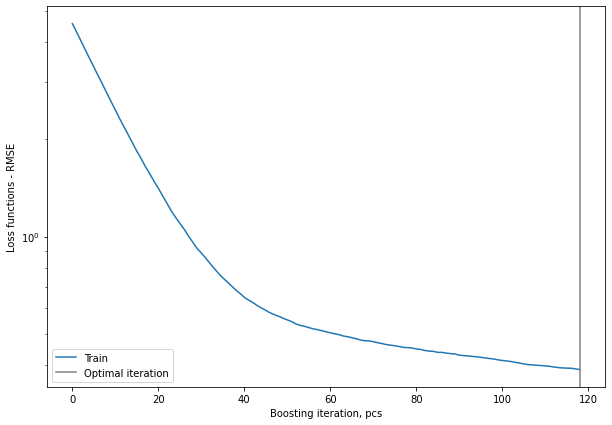

In [37]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [38]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [39]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.03
RMSE: 0.4
Relative RMSE(%):  0.074
MSE: 0.2
R square: 88.1%


In [40]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.978
a1: 0.813
R^2: 0.887
Uncertainty
a0: 0.98+/-0.11
a1: 0.813+/-0.020


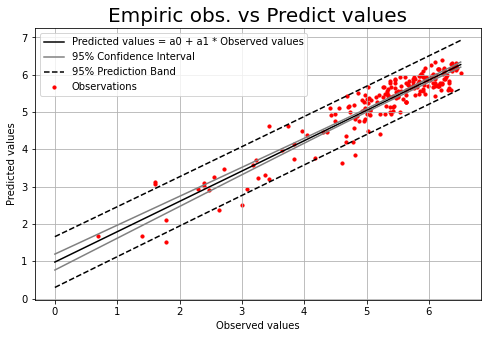

In [42]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

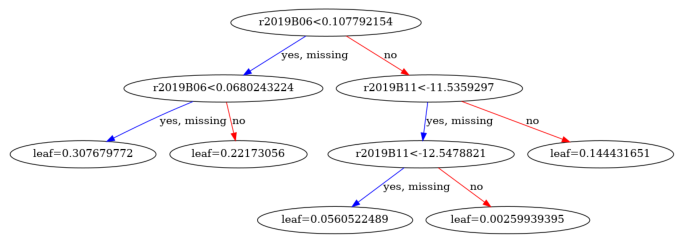

In [44]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

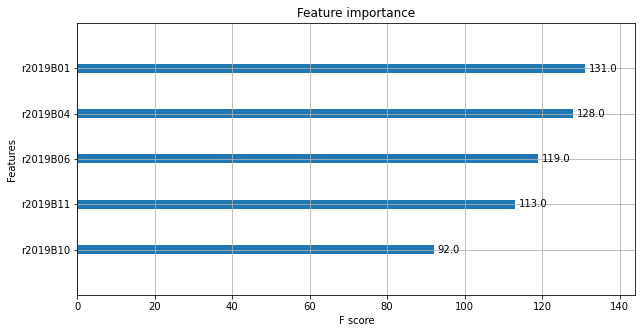

In [46]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

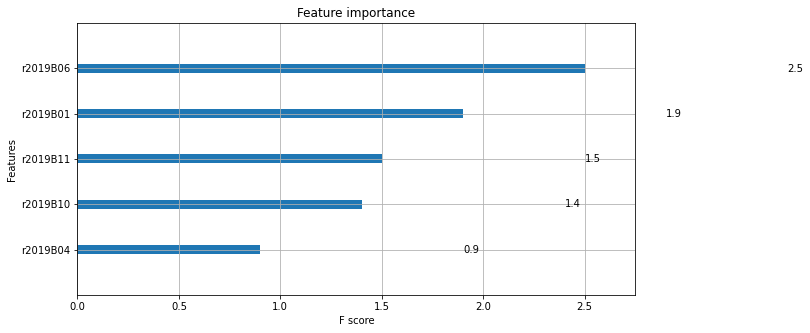

In [47]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

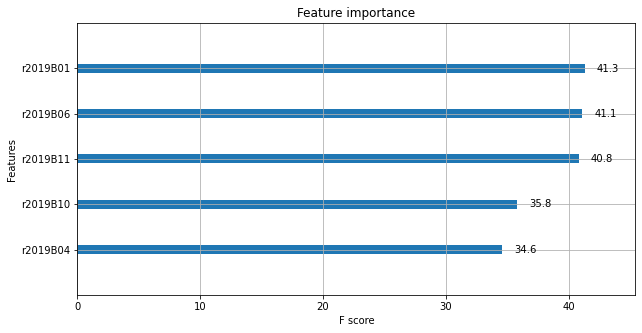

In [48]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [49]:
# Load SHAP`s library
import shap

In [50]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


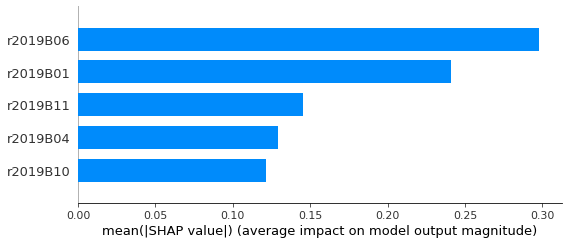

In [51]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

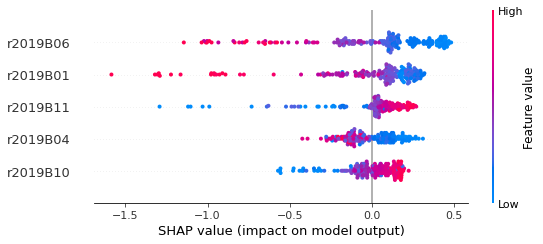

In [52]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

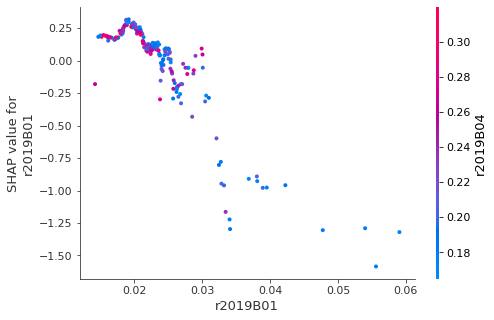

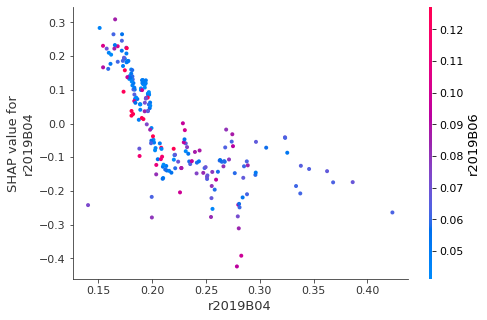

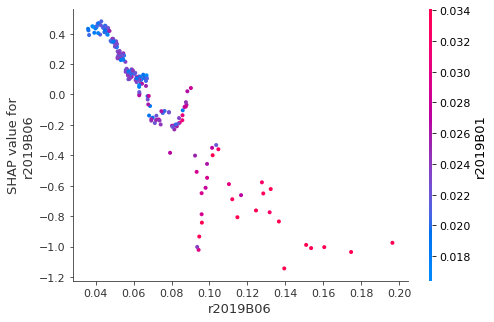

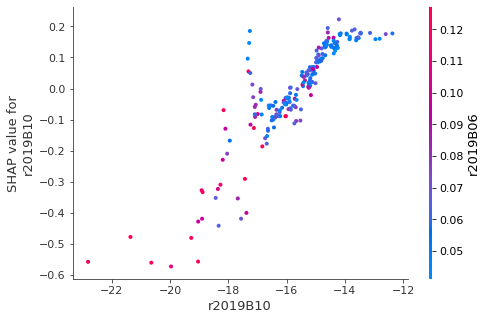

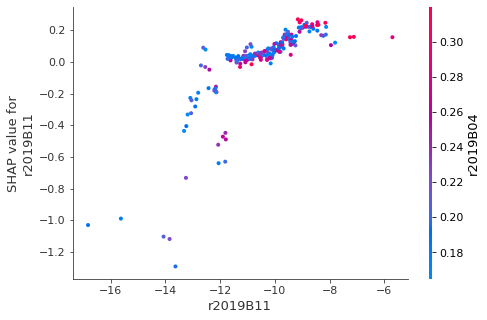

In [53]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [54]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_GS_Sentinel_data_2019.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_GS_Sentinel_data_2019.txt")